In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#conda install -c conda-forge/label/gcc7 missingno

In [3]:
df = pd.read_csv("Hospital_-_Data.csv" ,index_col=0)

In [4]:
df.head()

AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
SL.                                                                 
1    58.0      M        MARRIED         other- heart         49.2   
2    59.0      M        MARRIED              CAD-DVD         41.0   
3    82.0      M        MARRIED              CAD-TVD         46.6   
4    46.0      M        MARRIED              CAD-DVD         80.0   
5    60.0      M        MARRIED              CAD-DVD         58.0   

     BODY HEIGHT  HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  \
SL.                                               ...              
1            160       118     100.0    80.0  32  ...        0.8   
2            155        78      70.0    50.0  28  ...        1.7   
3            164       100     110.0    80.0  20  ...        0.8   
4            173       122     110.0    80.0  24  ...        1.5   
5            175        72     180.0   100.0  18  ...        1.9   

     MODE OF ARRIVAL  STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN  \
SL.                                                                 
1          AMBULANCE                         ALERT      EMERGENCY   
2          AMBULANCE                         ALERT      EMERGENCY   
3          WALKED IN                         ALERT       ELECTIVE   
4          AMBULANCE                         ALERT      EMERGENCY   
5          AMBULANCE                         ALERT      EMERGENCY   

    TOTAL LENGTH OF STAY LENGTH OF STAY - ICU LENGTH OF STAY- WARD  \
SL.                                                                  
1                     25                   12                   13   
2                     41                   20                   21   
3                     18                    9                    9   
4                     14                   13                    1   
5                     24                   12                   12   

     IMPLANT USED (Y/N)  COST OF IMPLANT  TOTAL COST TO HOSPITAL   
SL.                                                                
1                     Y            38000                 660293.0  
2                     Y            39690                 809130.0  
3                     N                0                 362231.0  
4                     Y            89450                 629990.0  
5                     N                0                 444876.0  

[5 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 1 to 248
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           248 non-null    float64
 1   GENDER                        248 non-null    object 
 2   MARITAL STATUS                248 non-null    object 
 3   KEY COMPLAINTS -CODE          212 non-null    object 
 4   BODY WEIGHT                   248 non-null    float64
 5   BODY HEIGHT                   248 non-null    int64  
 6   HR PULSE                      248 non-null    int64  
 7   BP -HIGH                      225 non-null    float64
 8   BP-LOW                        225 non-null    float64
 9   RR                            248 non-null    int64  
 10  PAST MEDICAL HISTORY CODE     75 non-null     object 
 11  HB                            246 non-null    float64
 12  UREA                          235 non-null    float64
 13  CREAT

In [6]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT USED (Y/N)', 'COST OF IMPLANT', 'TOTAL COST TO HOSPITAL '],
      dtype='object')

In [7]:
df2= df.columns.str.replace('[/]', 'or') 

In [8]:
df.columns = df2

In [9]:
df.columns

Index(['AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL LENGTH OF STAY', 'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD',
       'IMPLANT USED (YorN)', 'COST OF IMPLANT', 'TOTAL COST TO HOSPITAL '],
      dtype='object')

In [10]:
# set categorical data
df['GENDER'] = df['GENDER'].astype('category')
df['MARITAL STATUS'] = df['MARITAL STATUS'].astype('category')
df['KEY COMPLAINTS -CODE'] = df['KEY COMPLAINTS -CODE'].astype('category')
df['PAST MEDICAL HISTORY CODE'] = df['PAST MEDICAL HISTORY CODE'].astype('category')
df['MODE OF ARRIVAL'] = df['MODE OF ARRIVAL'].astype('category')
df['STATE AT THE TIME OF ARRIVAL'] = df['STATE AT THE TIME OF ARRIVAL'].astype('category')
df['TYPE OF ADMSN'] = df['TYPE OF ADMSN'].astype('category')
df["IMPLANT USED (YorN)"] = df['IMPLANT USED (YorN)'].astype('category')

In [11]:
df.head()

AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
SL.                                                                 
1    58.0      M        MARRIED         other- heart         49.2   
2    59.0      M        MARRIED              CAD-DVD         41.0   
3    82.0      M        MARRIED              CAD-TVD         46.6   
4    46.0      M        MARRIED              CAD-DVD         80.0   
5    60.0      M        MARRIED              CAD-DVD         58.0   

     BODY HEIGHT  HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  \
SL.                                               ...              
1            160       118     100.0    80.0  32  ...        0.8   
2            155        78      70.0    50.0  28  ...        1.7   
3            164       100     110.0    80.0  20  ...        0.8   
4            173       122     110.0    80.0  24  ...        1.5   
5            175        72     180.0   100.0  18  ...        1.9   

     MODE OF ARRIVAL  STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN  \
SL.                                                                 
1          AMBULANCE                         ALERT      EMERGENCY   
2          AMBULANCE                         ALERT      EMERGENCY   
3          WALKED IN                         ALERT       ELECTIVE   
4          AMBULANCE                         ALERT      EMERGENCY   
5          AMBULANCE                         ALERT      EMERGENCY   

    TOTAL LENGTH OF STAY LENGTH OF STAY - ICU LENGTH OF STAY- WARD  \
SL.                                                                  
1                     25                   12                   13   
2                     41                   20                   21   
3                     18                    9                    9   
4                     14                   13                    1   
5                     24                   12                   12   

     IMPLANT USED (YorN)  COST OF IMPLANT  TOTAL COST TO HOSPITAL   
SL.                                                                 
1                      Y            38000                 660293.0  
2                      Y            39690                 809130.0  
3                      N                0                 362231.0  
4                      Y            89450                 629990.0  
5                      N                0                 444876.0  

[5 rows x 23 columns]

In [12]:
df_reset=df.reset_index()

In [13]:
df_reset

SL.   AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
0      1  58.0      M        MARRIED         other- heart         49.2   
1      2  59.0      M        MARRIED              CAD-DVD         41.0   
2      3  82.0      M        MARRIED              CAD-TVD         46.6   
3      4  46.0      M        MARRIED              CAD-DVD         80.0   
4      5  60.0      M        MARRIED              CAD-DVD         58.0   
..   ...   ...    ...            ...                  ...          ...   
243  244  51.0      M        MARRIED         other- heart         69.0   
244  245  58.0      M        MARRIED              CAD-TVD         57.0   
245  246  44.0      M        MARRIED              CAD-TVD         58.0   
246  247  60.0      M        MARRIED         other- heart         65.0   
247  248  30.0      M        MARRIED                  RHD         71.0   

     BODY HEIGHT  HR PULSE  BP -HIGH  BP-LOW  ...  CREATININE MODE OF ARRIVAL  \
0            160       118     100.0    80.0  ...         0.8       AMBULANCE   
1            155        78      70.0    50.0  ...         1.7       AMBULANCE   
2            164       100     110.0    80.0  ...         0.8       WALKED IN   
3            173       122     110.0    80.0  ...         1.5       AMBULANCE   
4            175        72     180.0   100.0  ...         1.9       AMBULANCE   
..           ...       ...       ...     ...  ...         ...             ...   
243          176        62     130.0    90.0  ...         1.1       WALKED IN   
244          159        58     100.0    70.0  ...         0.8       WALKED IN   
245          159        68     150.0    90.0  ...         0.9       WALKED IN   
246          165        98     100.0    60.0  ...         1.0       AMBULANCE   
247          180        87     130.0    40.0  ...         0.8       WALKED IN   

     STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN  TOTAL LENGTH OF STAY  \
0                           ALERT      EMERGENCY                    25   
1                           ALERT      EMERGENCY                    41   
2                           ALERT       ELECTIVE                    18   
3                           ALERT      EMERGENCY                    14   
4                           ALERT      EMERGENCY                    24   
..                            ...            ...                   ...   
243                         ALERT       ELECTIVE                    10   
244                         ALERT       ELECTIVE                    11   
245                         ALERT       ELECTIVE                    13   
246                         ALERT      EMERGENCY                     9   
247                         ALERT       ELECTIVE                    10   

    LENGTH OF STAY - ICU LENGTH OF STAY- WARD IMPLANT USED (YorN)  \
0                     12                   13                   Y   
1                     20                   21                   Y   
2                      9                    9                   N   
3                     13                    1                   Y   
4                     12                   12                   N   
..                   ...                  ...                 ...   
243                    3                    7                   Y   
244                    2                    9                   Y   
245                    5                    8                   N   
246                    6                    3                   N   
247                    4                    6                   Y   

     COST OF IMPLANT  TOTAL COST TO HOSPITAL   
0              38000                 660293.0  
1              39690                 809130.0  
2                  0                 362231.0  
3              89450                 629990.0  
4                  0                 444876.0  
..               ...                      ...  
243            35000                 295155.0  
244            26000                 2003

In [14]:
del df_reset['SL.']

In [15]:
df_reset

AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
0    58.0      M        MARRIED         other- heart         49.2   
1    59.0      M        MARRIED              CAD-DVD         41.0   
2    82.0      M        MARRIED              CAD-TVD         46.6   
3    46.0      M        MARRIED              CAD-DVD         80.0   
4    60.0      M        MARRIED              CAD-DVD         58.0   
..    ...    ...            ...                  ...          ...   
243  51.0      M        MARRIED         other- heart         69.0   
244  58.0      M        MARRIED              CAD-TVD         57.0   
245  44.0      M        MARRIED              CAD-TVD         58.0   
246  60.0      M        MARRIED         other- heart         65.0   
247  30.0      M        MARRIED                  RHD         71.0   

     BODY HEIGHT  HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  \
0            160       118     100.0    80.0  32  ...        0.8   
1            155        78      70.0    50.0  28  ...        1.7   
2            164       100     110.0    80.0  20  ...        0.8   
3            173       122     110.0    80.0  24  ...        1.5   
4            175        72     180.0   100.0  18  ...        1.9   
..           ...       ...       ...     ...  ..  ...        ...   
243          176        62     130.0    90.0  24  ...        1.1   
244          159        58     100.0    70.0  24  ...        0.8   
245          159        68     150.0    90.0  24  ...        0.9   
246          165        98     100.0    60.0  17  ...        1.0   
247          180        87     130.0    40.0  20  ...        0.8   

     MODE OF ARRIVAL  STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN  \
0          AMBULANCE                         ALERT      EMERGENCY   
1          AMBULANCE                         ALERT      EMERGENCY   
2          WALKED IN                         ALERT       ELECTIVE   
3          AMBULANCE                         ALERT      EMERGENCY   
4          AMBULANCE                         ALERT      EMERGENCY   
..               ...                           ...            ...   
243        WALKED IN                         ALERT       ELECTIVE   
244        WALKED IN                         ALERT       ELECTIVE   
245        WALKED IN                         ALERT       ELECTIVE   
246        AMBULANCE                         ALERT      EMERGENCY   
247        WALKED IN                         ALERT       ELECTIVE   

    TOTAL LENGTH OF STAY LENGTH OF STAY - ICU LENGTH OF STAY- WARD  \
0                     25                   12                   13   
1                     41                   20                   21   
2                     18                    9                    9   
3                     14                   13                    1   
4                     24                   12                   12   
..                   ...                  ...                  ...   
243                   10                    3                    7   
244                   11                    2                    9   
245                   13                    5                    8   
246                    9                    6                    3   
247                   10                    4                    6   

     IMPLANT USED (YorN)  COST OF IMPLANT  TOTAL COST TO HOSPITAL   
0                      Y            38000                 660293.0  
1                      Y            39690                 809130.0  
2                      N                0                 362231.0  
3                      Y            89450                 629990.0  
4                      N                0                 444876.0  
..                   ...              ...                      ...  
243                    Y            35000                 295155.0  
244                    Y            26000                 200321.0  
245                    N                0                 191188.0  


In [16]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AGE                           248 non-null    float64 
 1   GENDER                        248 non-null    category
 2   MARITAL STATUS                248 non-null    category
 3   KEY COMPLAINTS -CODE          212 non-null    category
 4   BODY WEIGHT                   248 non-null    float64 
 5   BODY HEIGHT                   248 non-null    int64   
 6   HR PULSE                      248 non-null    int64   
 7   BP -HIGH                      225 non-null    float64 
 8   BP-LOW                        225 non-null    float64 
 9   RR                            248 non-null    int64   
 10  PAST MEDICAL HISTORY CODE     75 non-null     category
 11  HB                            246 non-null    float64 
 12  UREA                          235 non-null    floa

In [17]:
      
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  BODY HEIGHT  \
0  58.0      M        MARRIED         other- heart         49.2          160   
1  59.0      M        MARRIED              CAD-DVD         41.0          155   
2  82.0      M        MARRIED              CAD-TVD         46.6          164   

   HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  MODE OF ARRIVAL  \
0       118     100.0    80.0  32  ...        0.8        AMBULANCE   
1        78      70.0    50.0  28  ...        1.7        AMBULANCE   
2       100     110.0    80.0  20  ...        0.8        WALKED IN   

   STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN TOTAL LENGTH OF STAY  \
0                         ALERT      EMERGENCY                   25   
1                         ALERT      EMERGENCY                   41   
2                         ALERT       ELECTIVE                   18   

  LENGTH OF STAY - ICU LENGTH OF STAY- WARD  IMPLANT USED (YorN)  \
0                   12                   13                    Y   
1                   20                   21                    Y   
2                    9                    9                    N   

   COST OF IMPLANT  TOTAL COST TO HOSPITAL   
0            38000                 660293.0  
1            39690                 809130.0  
2                0                 362231.0  

[3 rows x 23 columns]


To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AGE                           248 non-null    float64 
 1   GENDER                        248 non-null    category
 2   MARITAL STATUS                248 non-null    category
 3   KEY COMPLAINTS -CODE          212 non-null    category
 4   BODY WEIGHT                   248 non-null    float64 
 5   BODY HEIGHT                   248 non-null    int64   
 6   HR PULSE                      248 non-null    int64   
 7   BP -HIGH                      225 non-null    float64 
 8   BP-LOW                        225 non-null    float64 
 9   RR                            248 non-null    int64   
 10  PAST MEDICAL HISTORY CODE     75 non-null     category
 11  HB                         

AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  BODY HEIGHT  \
0  58.0      M        MARRIED         other- heart         49.2          160   
1  59.0      M        MARRIED              CAD-DVD         41.0          155   
5  75.0      M        MARRIED              CAD-DVD         45.0          140   

   HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  MODE OF ARRIVAL  \
0       118     100.0    80.0  32  ...        0.8        AMBULANCE   
1        78      70.0    50.0  28  ...        1.7        AMBULANCE   
5       130     215.0   140.0  42  ...        1.0        AMBULANCE   

   STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN TOTAL LENGTH OF STAY  \
0                         ALERT      EMERGENCY                   25   
1                         ALERT      EMERGENCY                   41   
5                         ALERT      EMERGENCY                   31   

  LENGTH OF STAY - ICU LENGTH OF STAY- WARD  IMPLANT USED (YorN)  \
0                   12                   13                    Y   
1                   20                   21                    Y   
5                    9                   22                    N   

   COST OF IMPLANT  TOTAL COST TO HOSPITAL   
0            38000                 660293.0  
1            39690                 809130.0  
5                0                 372357.0  

[3 rows x 23 columns]

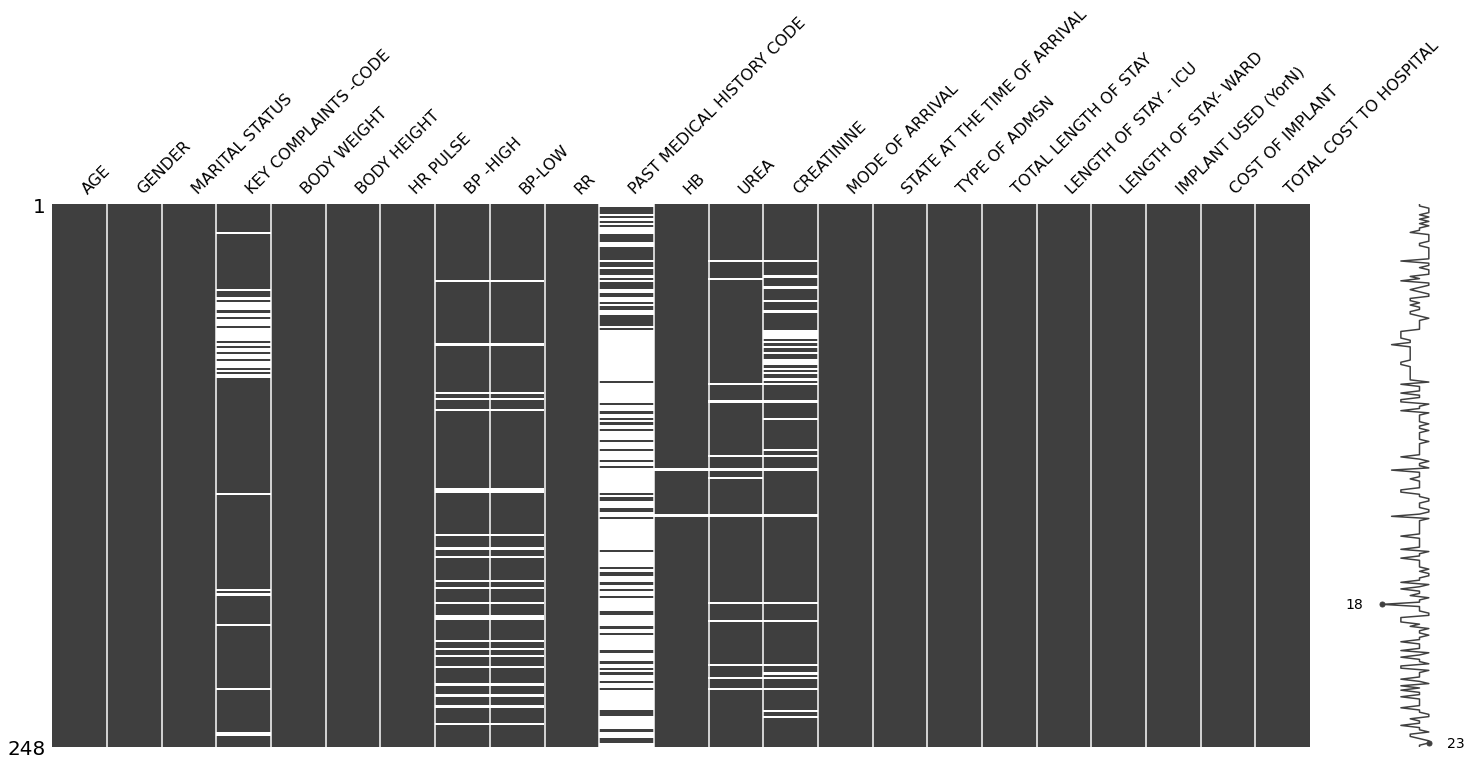


***Number of duplicated entries:  8


AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  BODY HEIGHT  \
71  5.0      F      UNMARRIED   other- respiratory         15.0          117   
80  5.0      F      UNMARRIED   other- respiratory         15.0          117   
65  5.0      M      UNMARRIED   other- respiratory         15.0          105   
75  5.0      M      UNMARRIED   other- respiratory         15.0          105   
61  7.0      M      UNMARRIED                  NaN         19.0          107   

    HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  MODE OF ARRIVAL  \
71        80     110.0    80.0  24  ...        NaN        WALKED IN   
80        80     110.0    80.0  24  ...        NaN        WALKED IN   
65       115     113.0    70.0  26  ...        NaN        WALKED IN   
75       115     113.0    70.0  26  ...        NaN        WALKED IN   
61       100     103.0    76.0  26  ...        NaN        WALKED IN   

    STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN TOTAL LENGTH OF STAY  \
71                         ALERT       ELECTIVE                    7   
80                         ALERT       ELECTIVE                    7   
65                         ALERT       ELECTIVE                    7   
75                         ALERT       ELECTIVE                    7   
61                         ALERT       ELECTIVE                   10   

   LENGTH OF STAY - ICU LENGTH OF STAY- WARD  IMPLANT USED (YorN)  \
71                    1                    6                    N   
80                    1                    6                    N   
65                    1                    6                    N   
75                    1                    6                    N   
61                    2                    8                    N   

    COST OF IMPLANT  TOTAL COST TO HOSPITAL   
71                0                119935.36  
80                0                119935.36  
65                0                128196.00  
75                0                128196.00  
61                0                152184.00  

[5 rows x 23 columns]


To check: 
Unique count of non-numeric data

GENDER                           2
MARITAL STATUS                   2
KEY COMPLAINTS -CODE            13
PAST MEDICAL HISTORY CODE        7
MODE OF ARRIVAL                  3
STATE AT THE TIME OF ARRIVAL     2
TYPE OF ADMSN                    2
IMPLANT USED (YorN)              2
dtype: int64
Top 5 unique values of GENDER
  GENDER  Count
0      M    166
1      F     82
 
Top 5 unique values of MARITAL STATUS
  MARITAL STATUS  Count
0      UNMARRIED    140
1        MARRIED    108
 
Top 5 unique values of KEY COMPLAINTS -CODE
  KEY COMPLAINTS -CODE  Count
0         other- heart     55
1              CAD-DVD     27
2                  RHD     26
3              CAD-TVD     24
4                 ACHD     19
 
Top 5 unique values of PAST MEDICAL HISTORY CODE
  PAST MEDICAL HISTORY CODE  Count
0             hypertension1     20
1                     other     15
2             hypertension2     13
3                 Diabetes1     10
4                 D

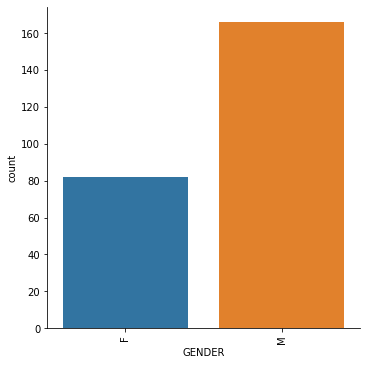

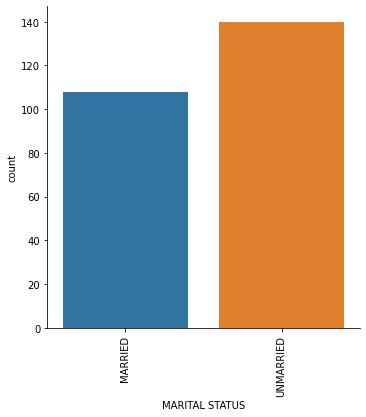

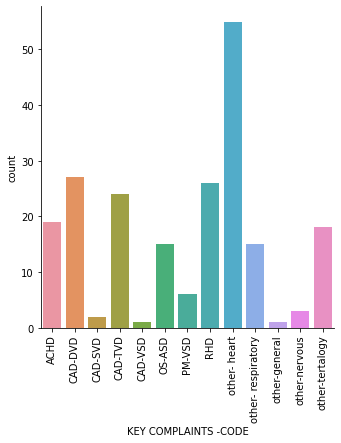

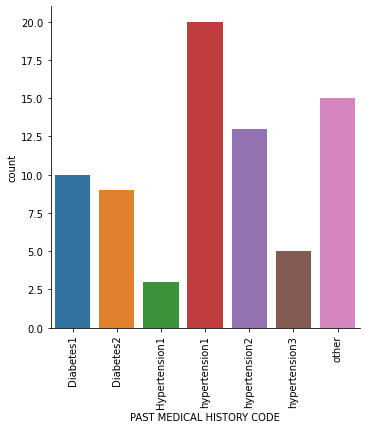

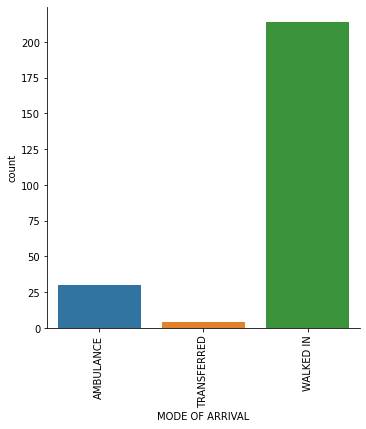

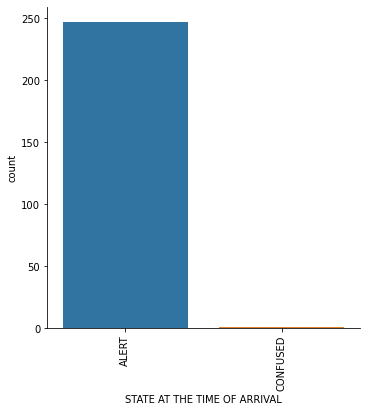

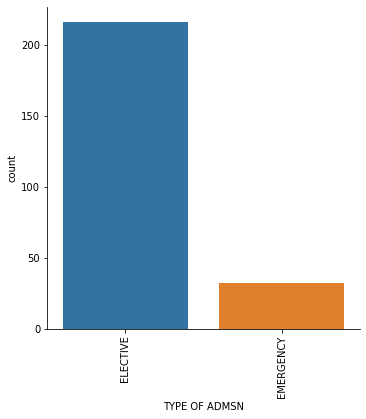

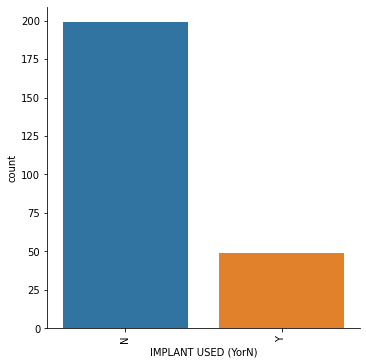


To check: 
Distribution of numeric data


count           mean            std           min  \
AGE                      248.0      28.879837      25.899359      0.032877   
BODY WEIGHT              248.0      37.524677      23.118822      2.020000   
BODY HEIGHT              248.0     130.221774      39.170901     19.000000   
HR PULSE                 248.0      92.229839      20.308740     41.000000   
BP -HIGH                 225.0     115.022222      22.536368     70.000000   
BP-LOW                   225.0      71.875556      15.313176     39.000000   
RR                       248.0      23.540323       3.840756     12.000000   
HB                       246.0      12.894553       3.083237      5.000000   
UREA                     235.0      26.581702      15.998367      2.000000   
CREATININE               215.0       0.746977       0.548641      0.100000   
TOTAL LENGTH OF STAY     248.0      11.612903       5.392617      3.000000   
LENGTH OF STAY - ICU     248.0       3.475806       3.853520      0.000000   
LENGTH OF STAY- WARD     248.0       8.153226       3.755793      0.000000   
COST OF IMPLANT          248.0    8544.201613   21521.877503      0.000000   
TOTAL COST TO HOSPITAL   248.0  198723.330282  122587.492984  46093.000000   

                               25%        50%        75%       max  
AGE                           6.00      15.50      55.00      88.0  
BODY WEIGHT                  15.00      40.90      58.25      85.0  
BODY HEIGHT                 105.00     147.50     160.00     185.0  
HR PULSE                     78.00      90.00     104.00     155.0  
BP -HIGH                    100.00     110.00     130.00     215.0  
BP-LOW                       60.00      70.00      80.00     140.0  
RR                           22.00      24.00      24.00      42.0  
HB                           11.30      12.35      14.00      25.7  
UREA                         18.00      22.00      30.00     143.0  
CREATININE                    0.30       0.70       1.00       5.2  
TOTAL LENGTH OF STAY          8.00      10.00      13.00      41.0  
LENGTH OF STAY - ICU          1.00       2.00       4.00      30.0  
LENGTH OF STAY- WARD          6.00       7.00      10.00      22.0  
COST OF IMPLANT               0.00       0.00       0.00  196848.0  
TOTAL COST TO HOSPITAL   131652.75  162660.50  220614.00  887350.0

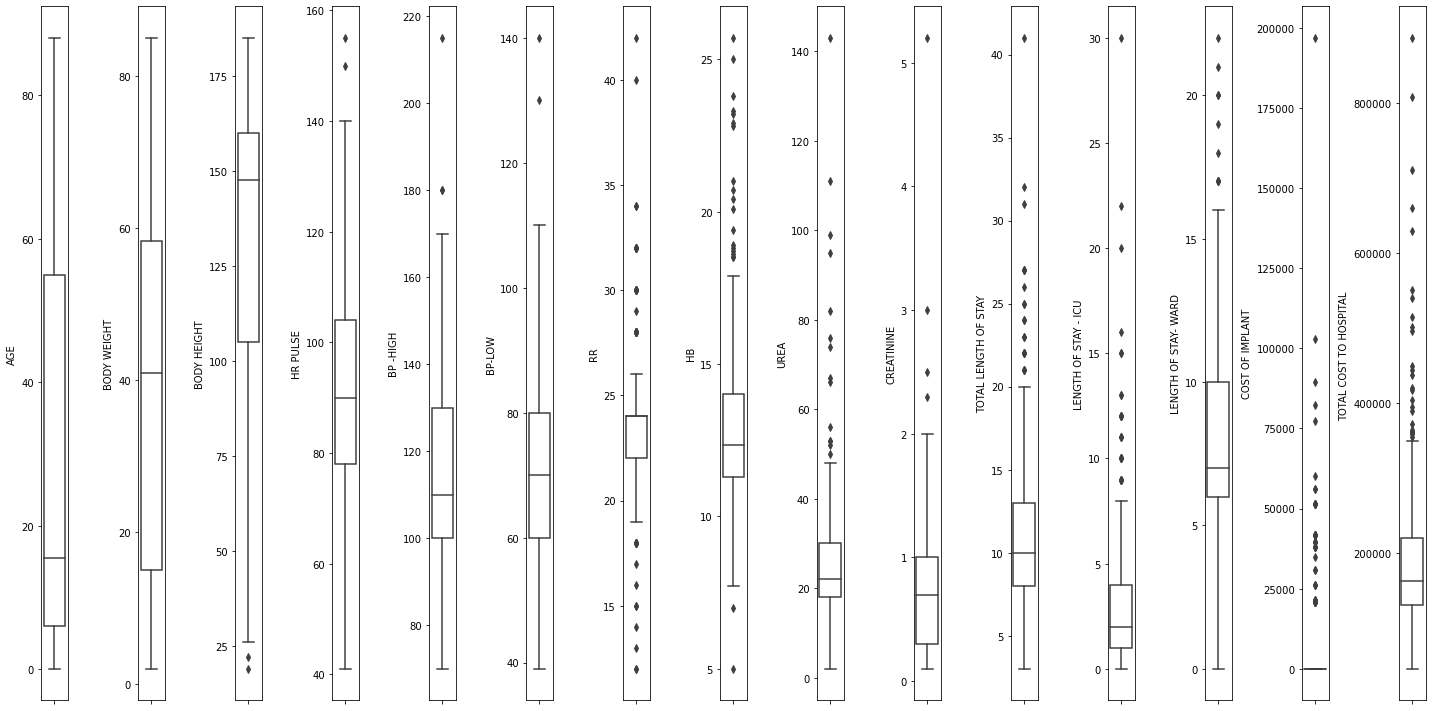

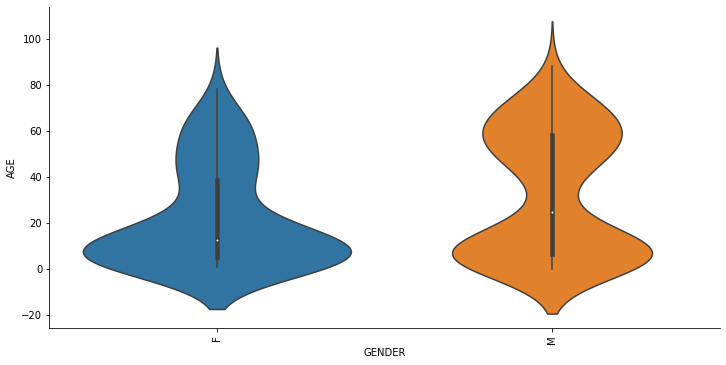

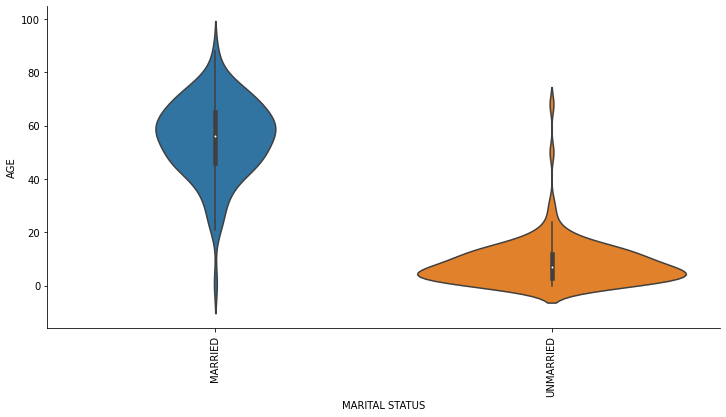

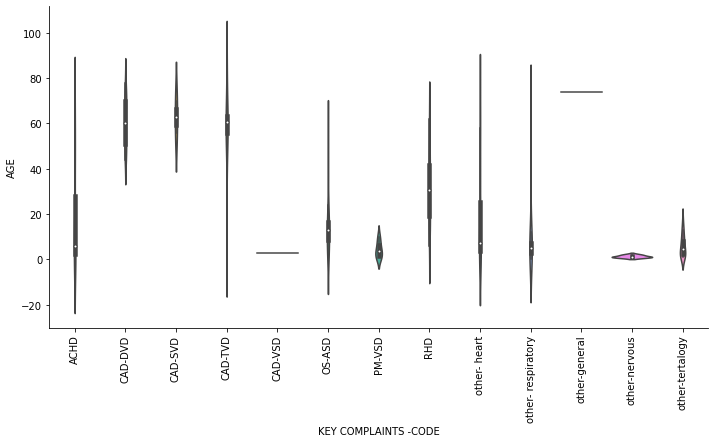

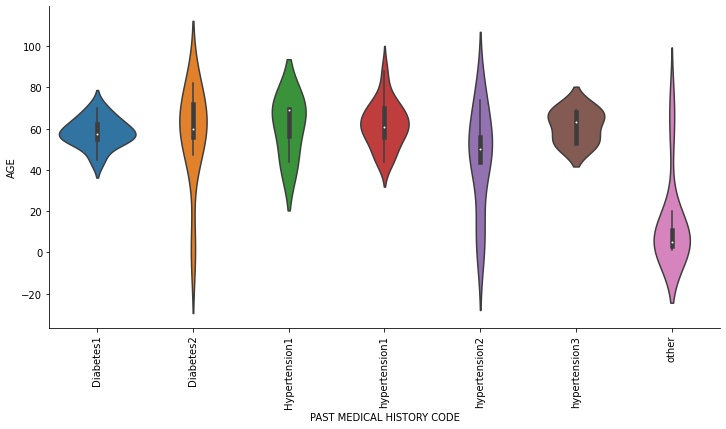

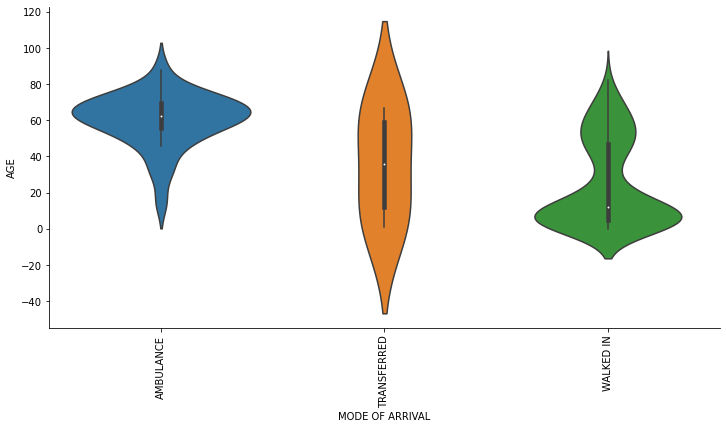

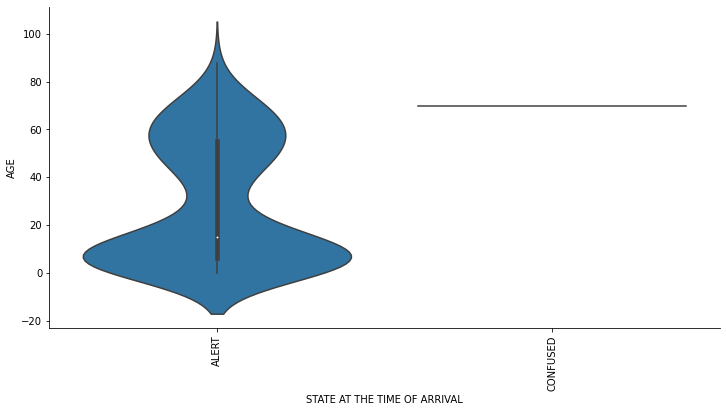

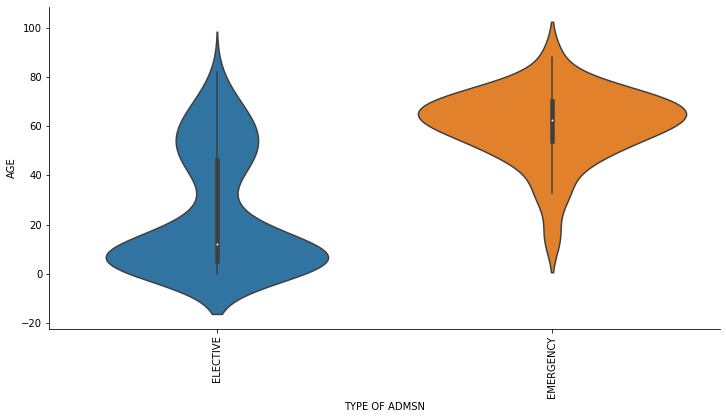

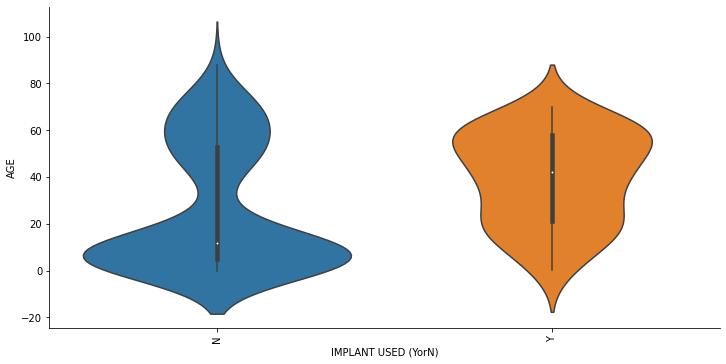

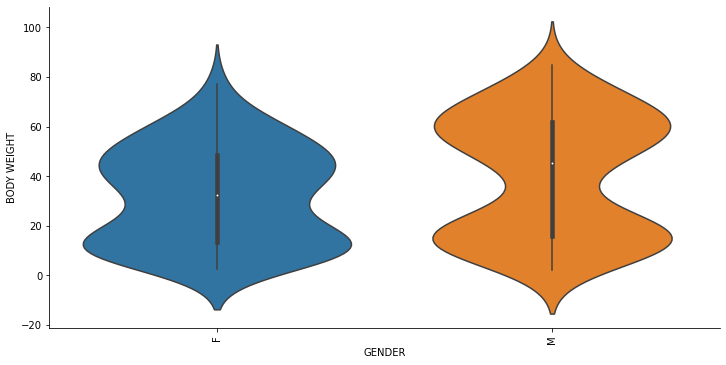

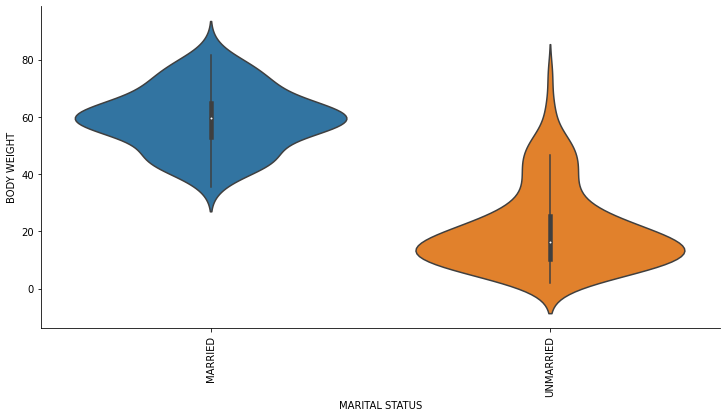

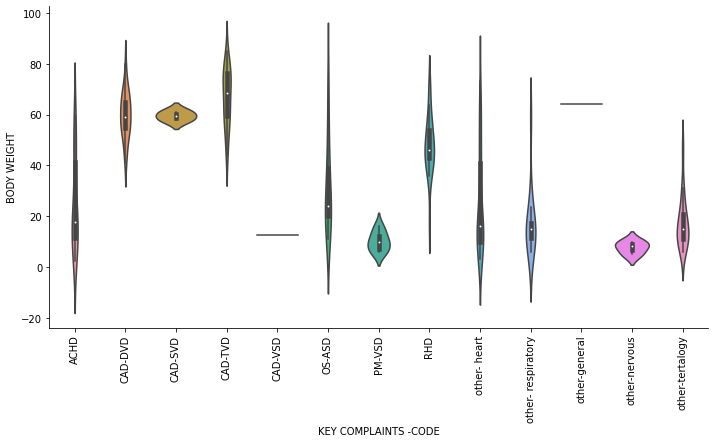

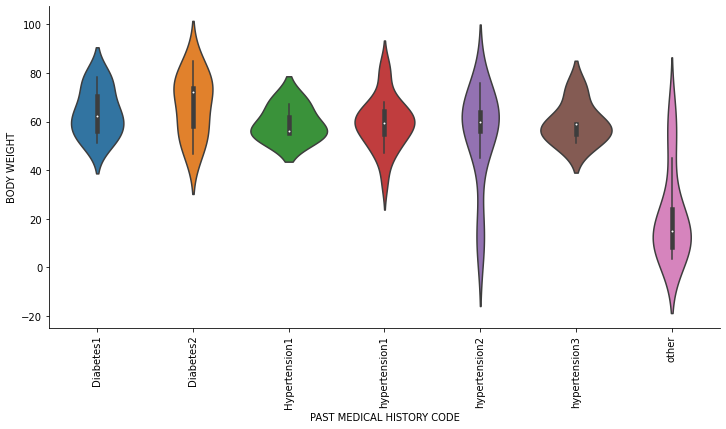

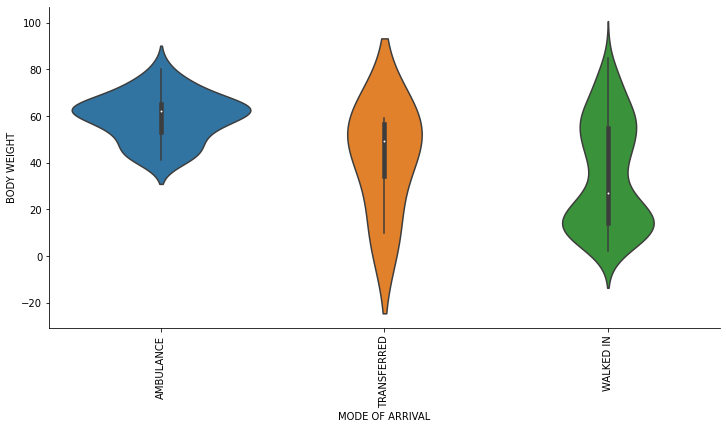

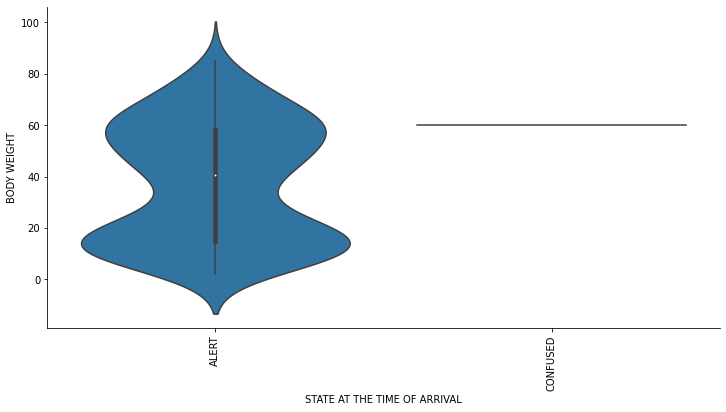

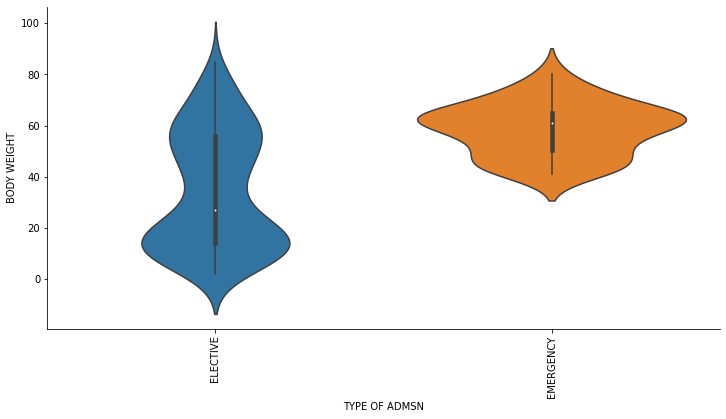

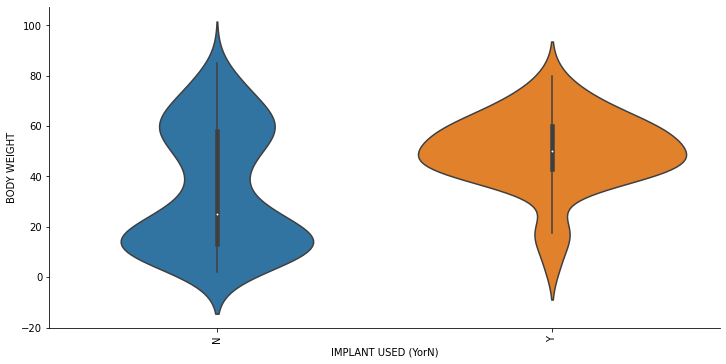

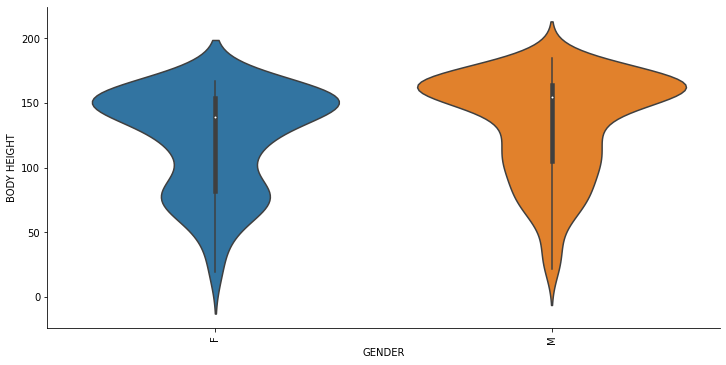

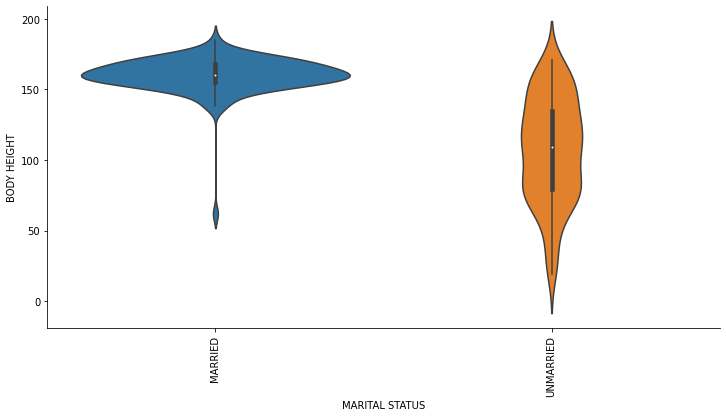

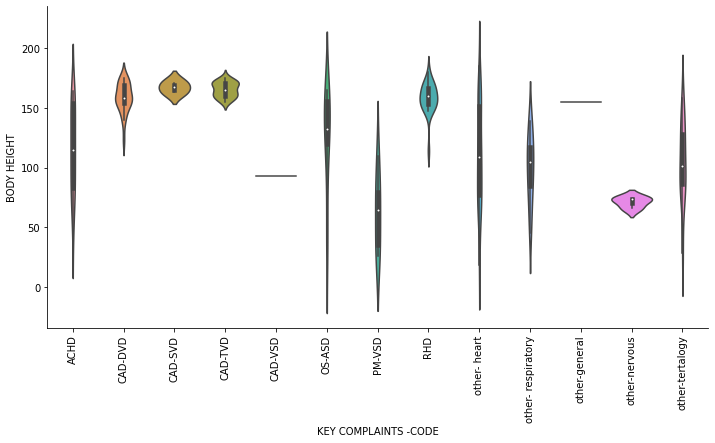

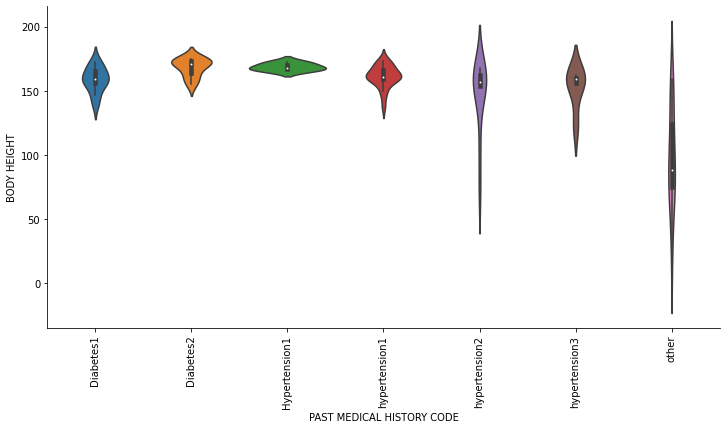

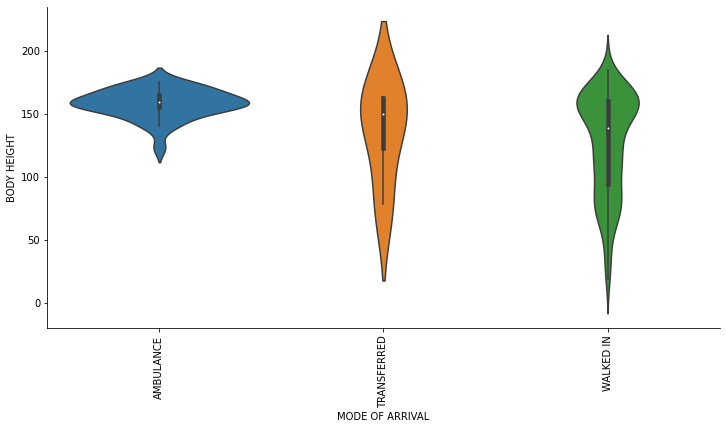

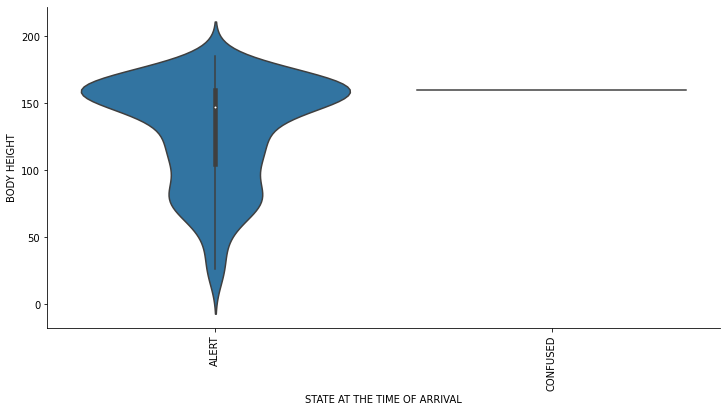

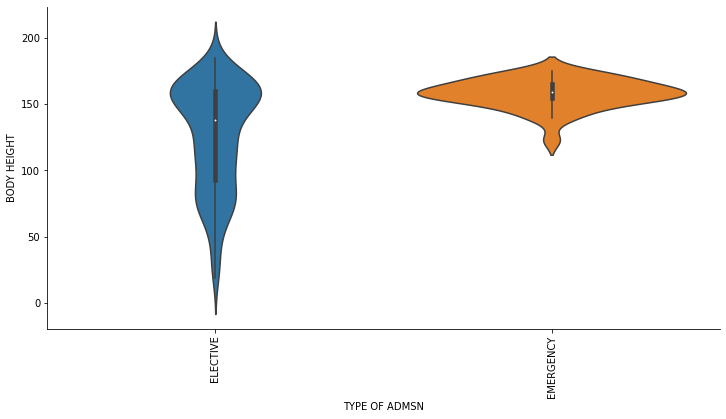

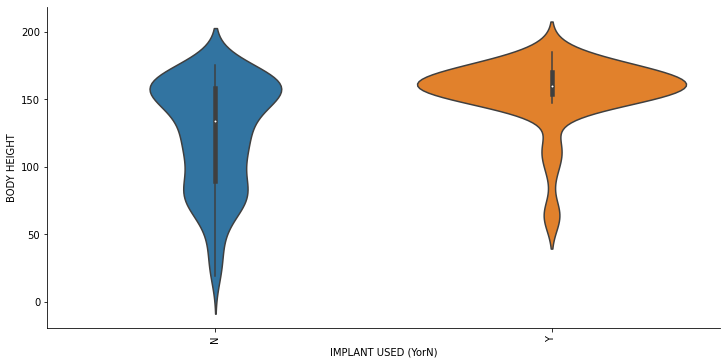

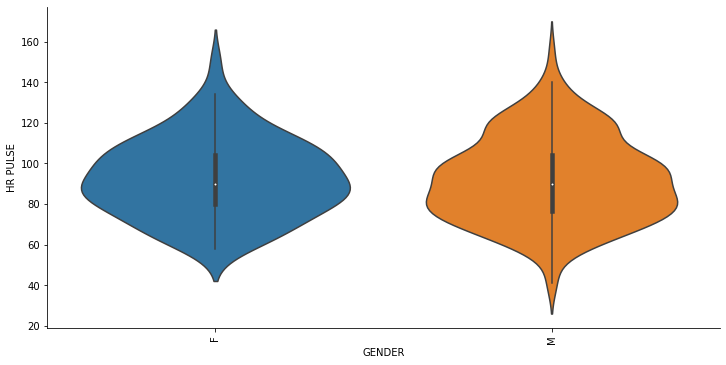

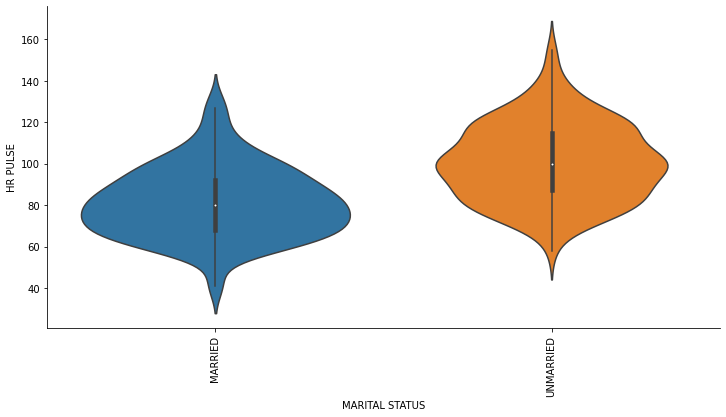

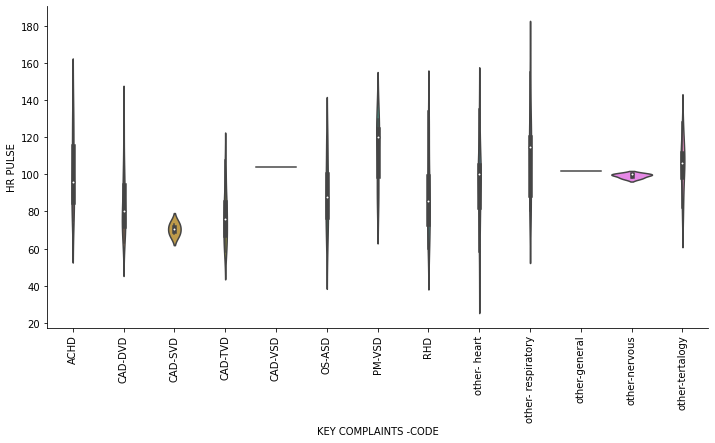

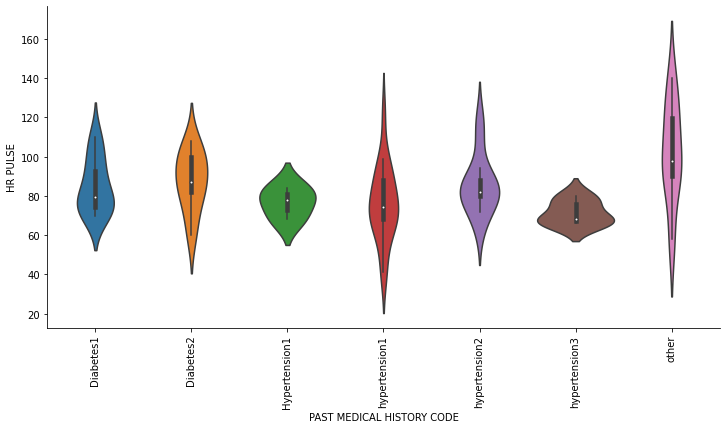

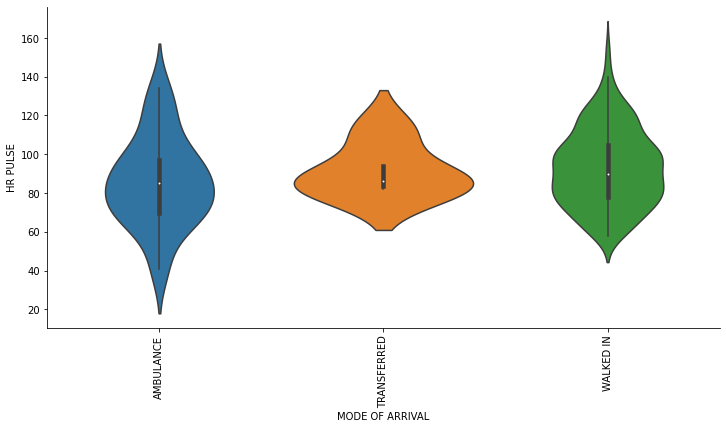

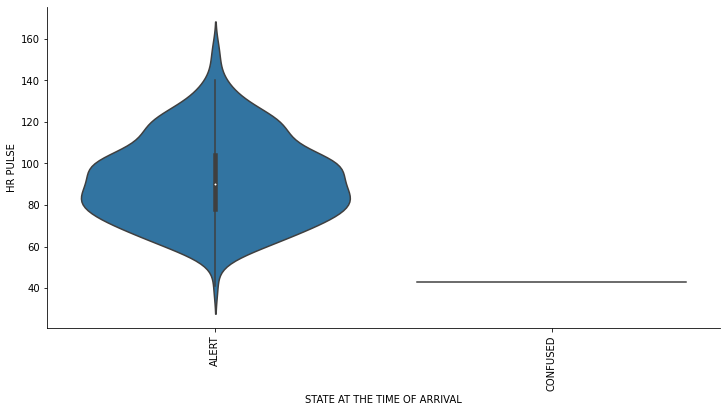

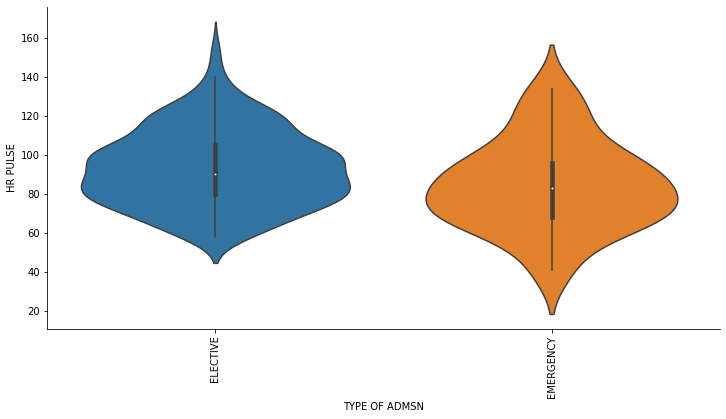

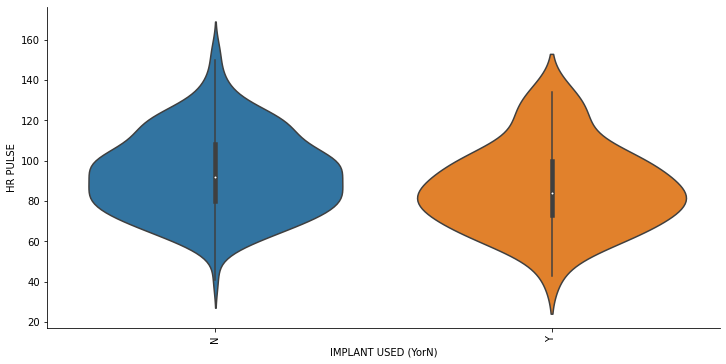

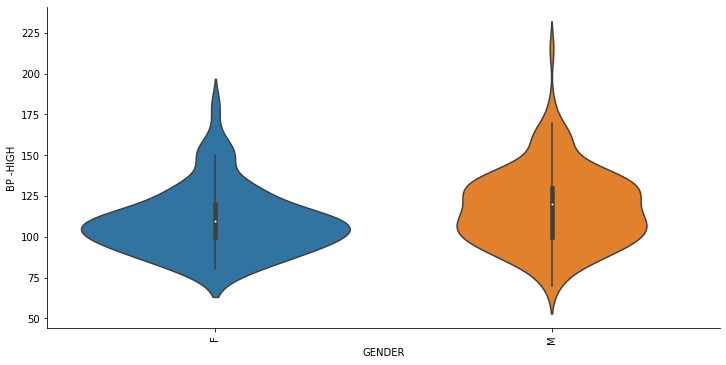

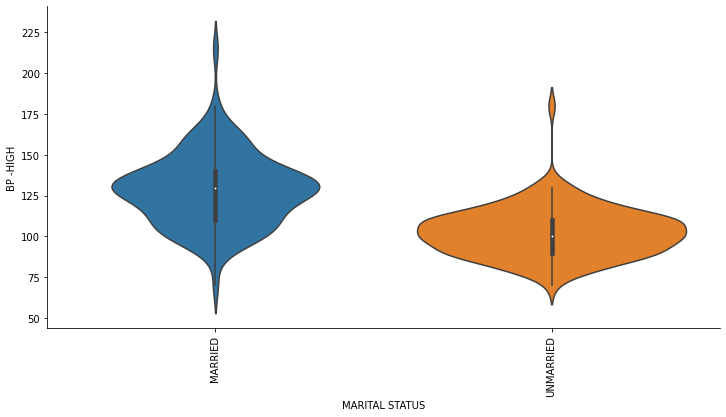

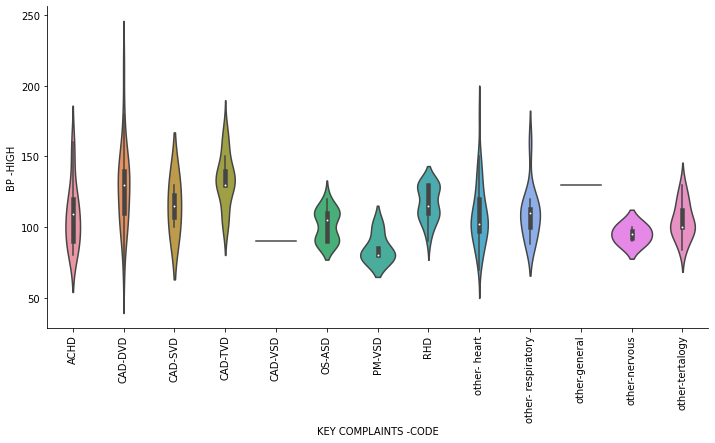

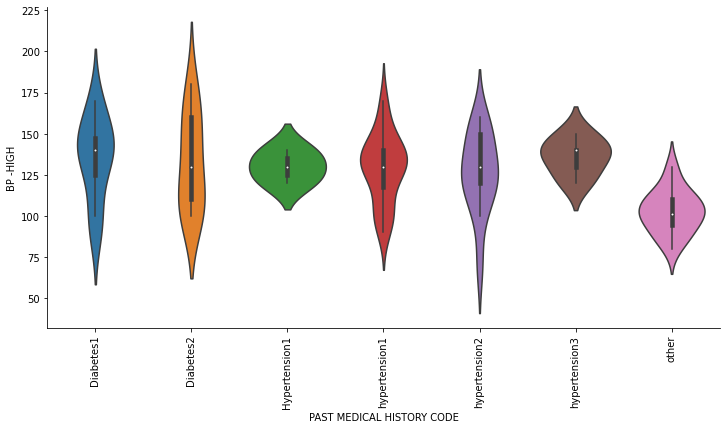

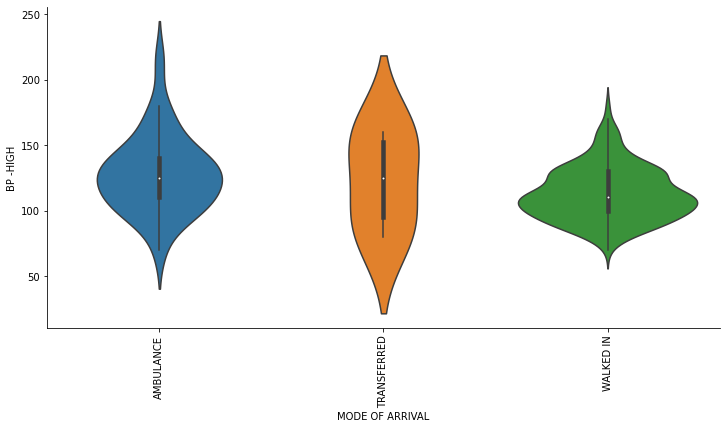

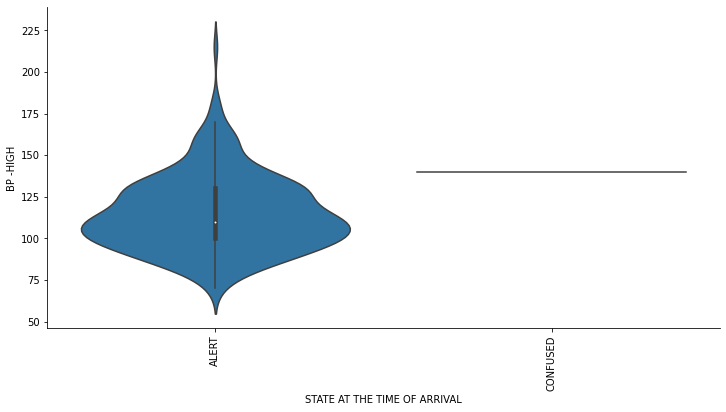

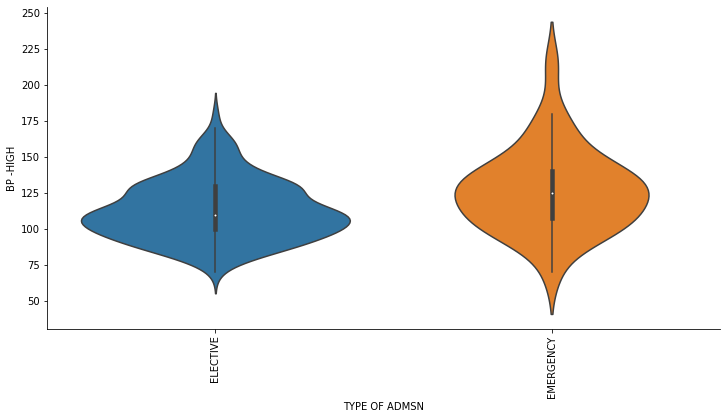

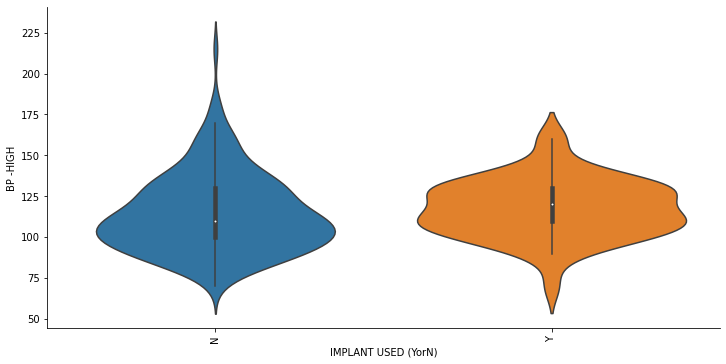

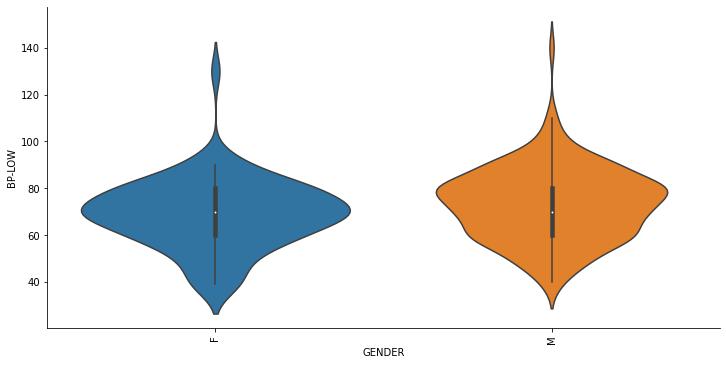

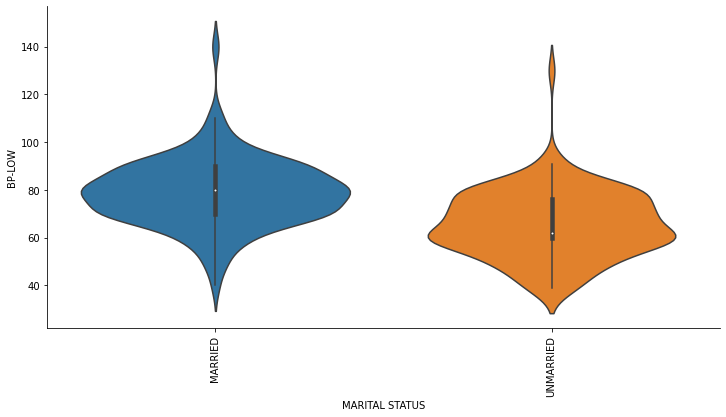

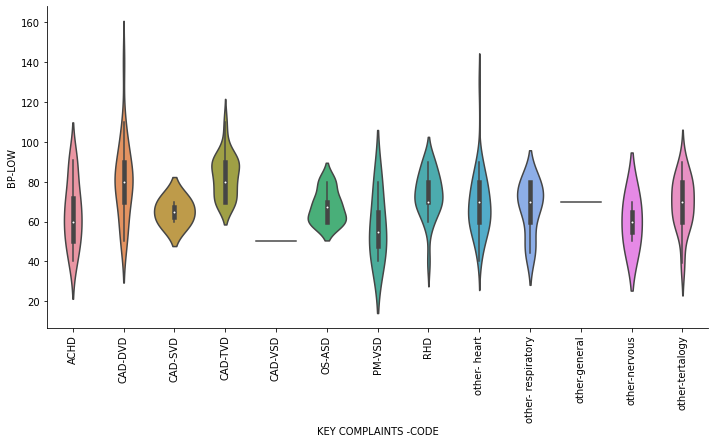

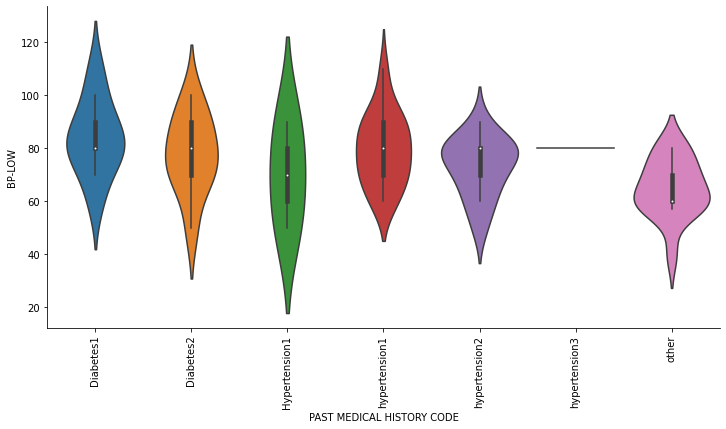

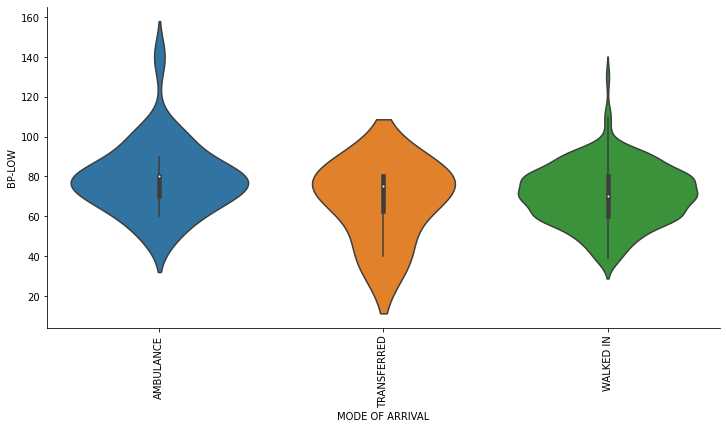

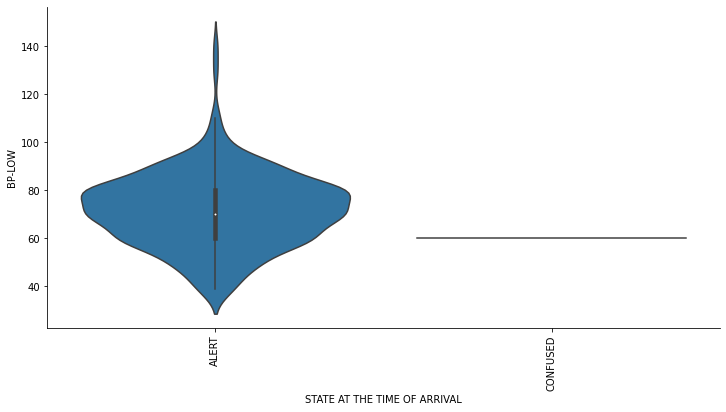

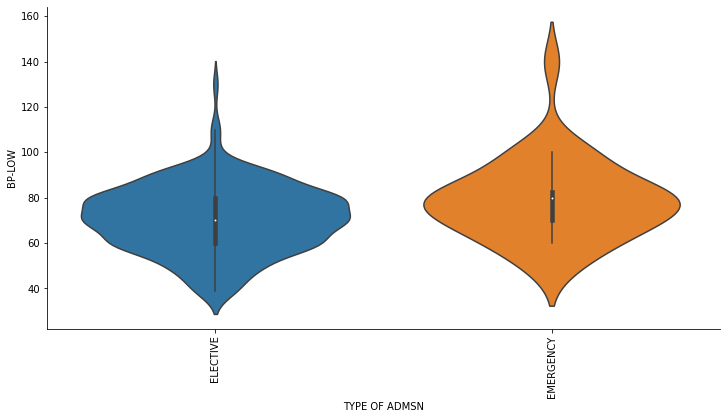

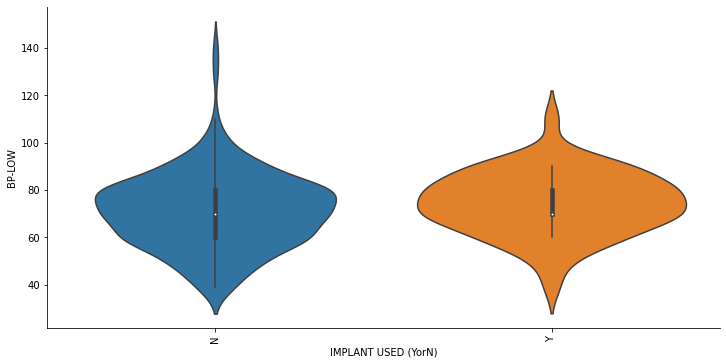

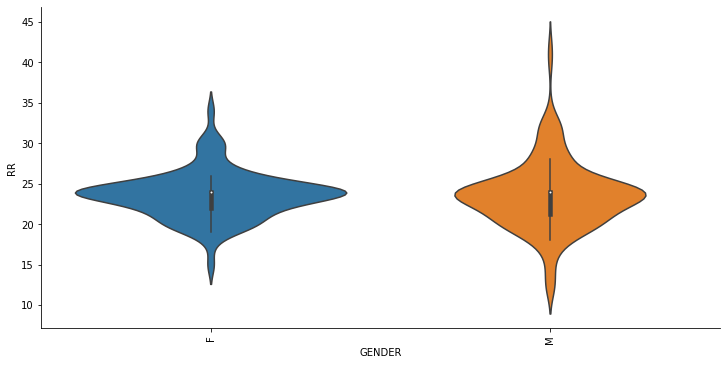

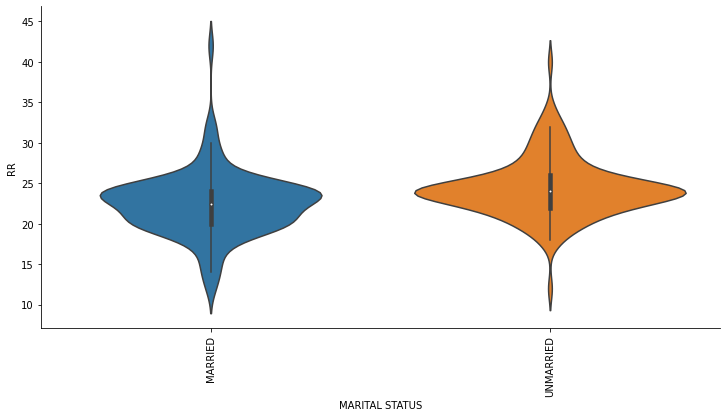

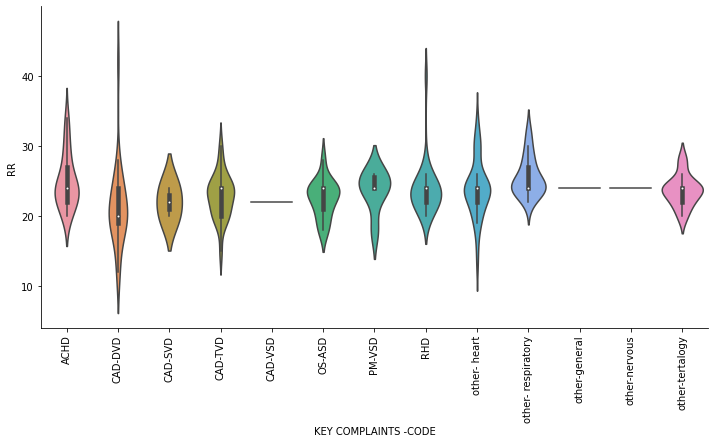

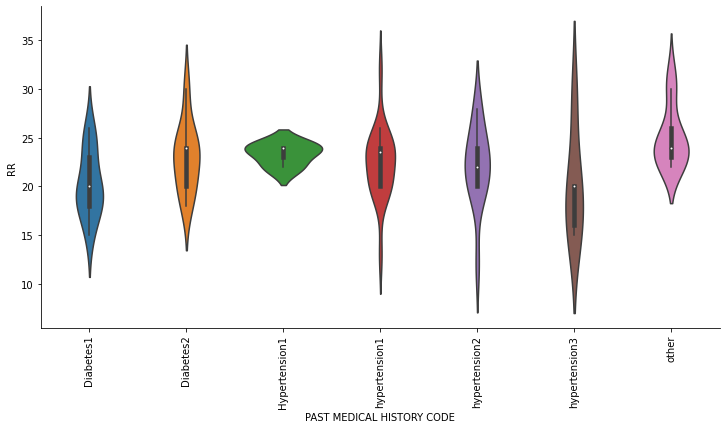

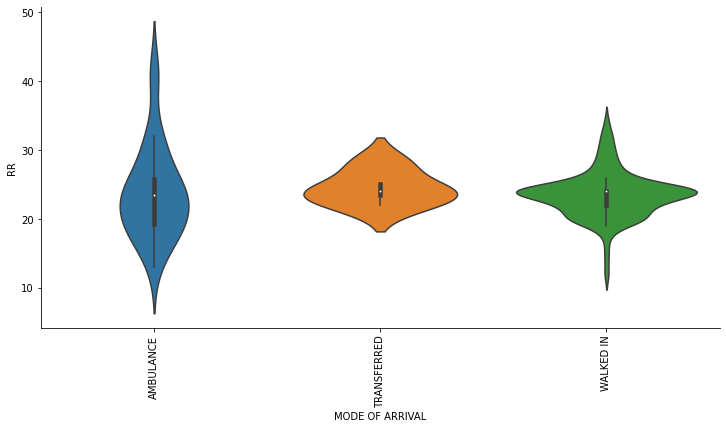

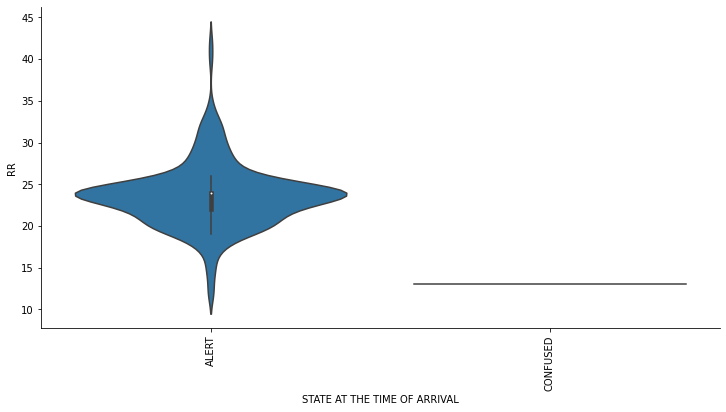

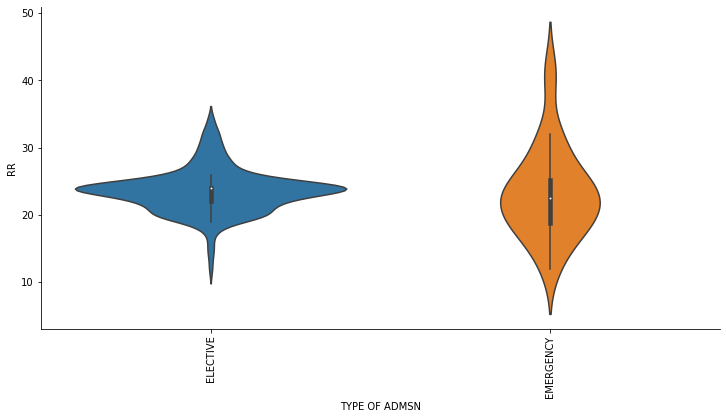

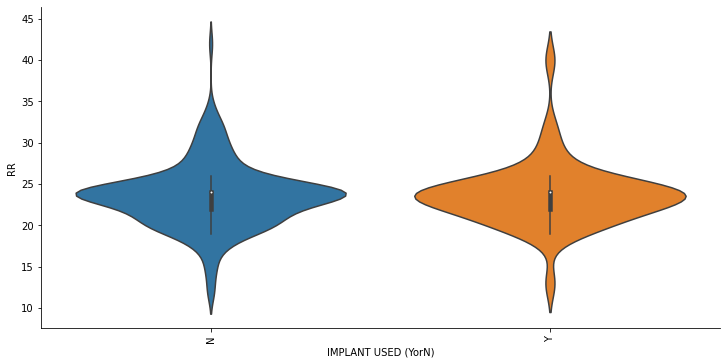

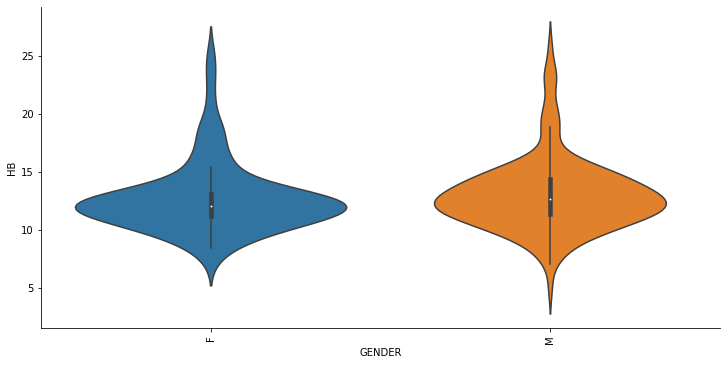

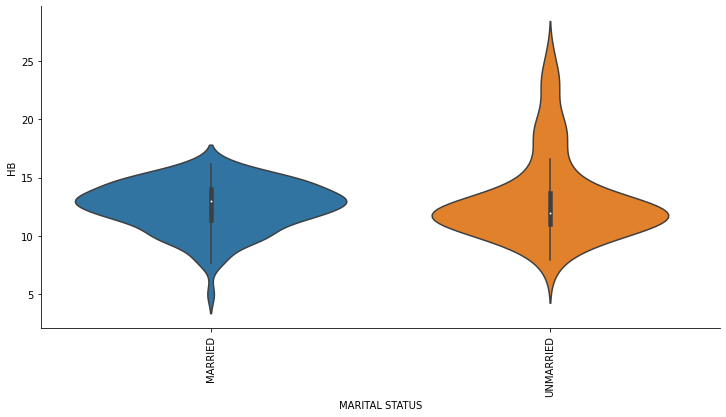

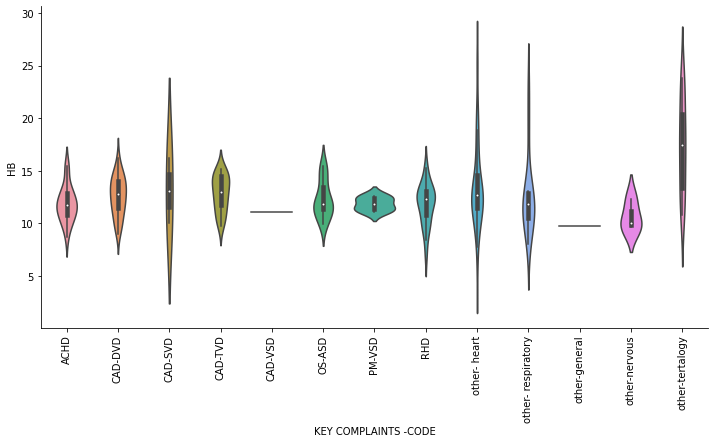

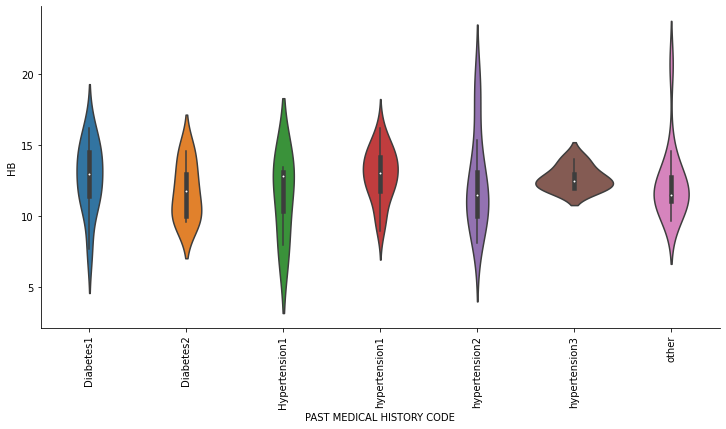

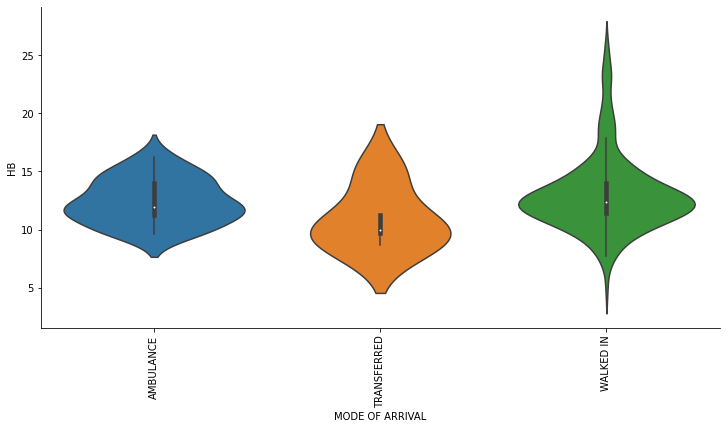

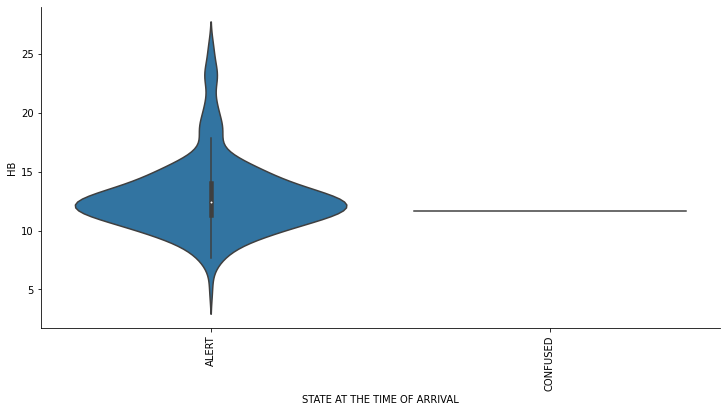

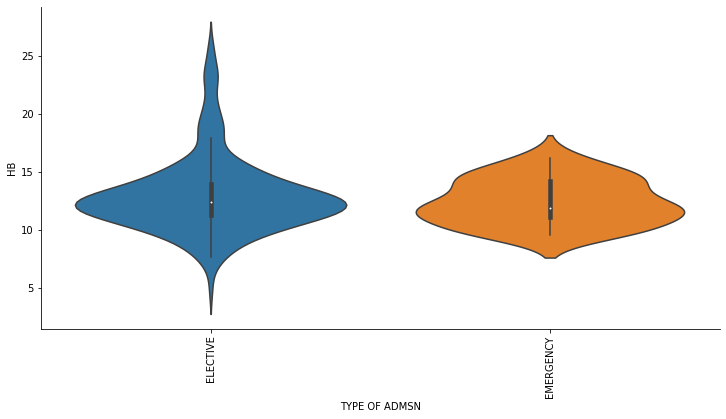

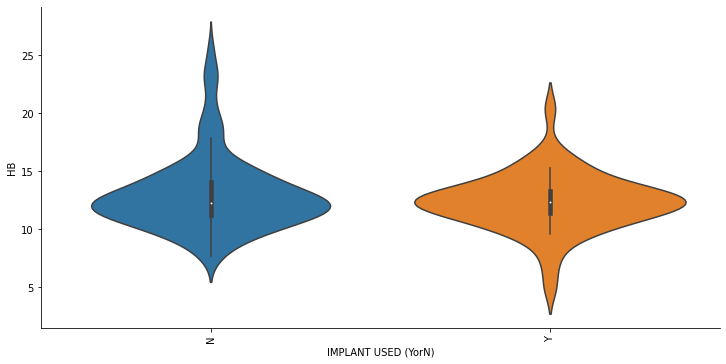

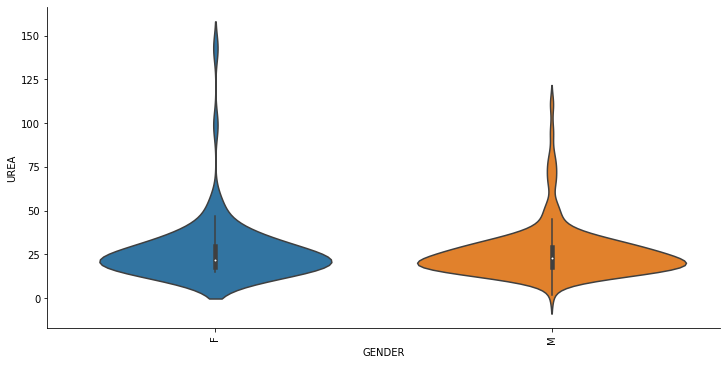

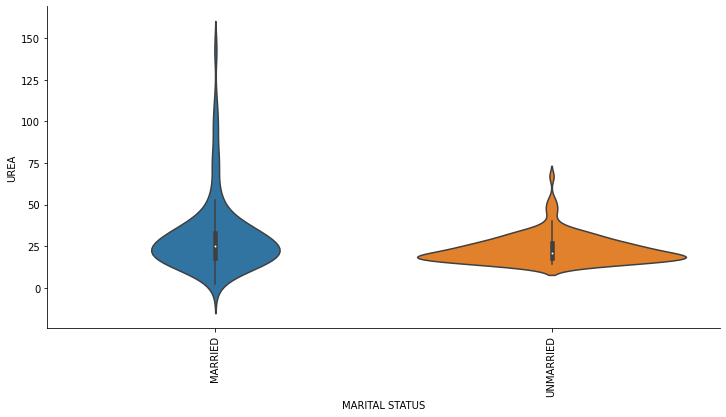

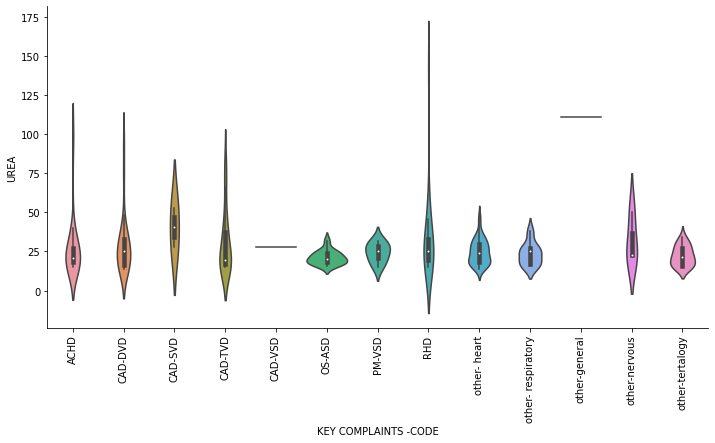

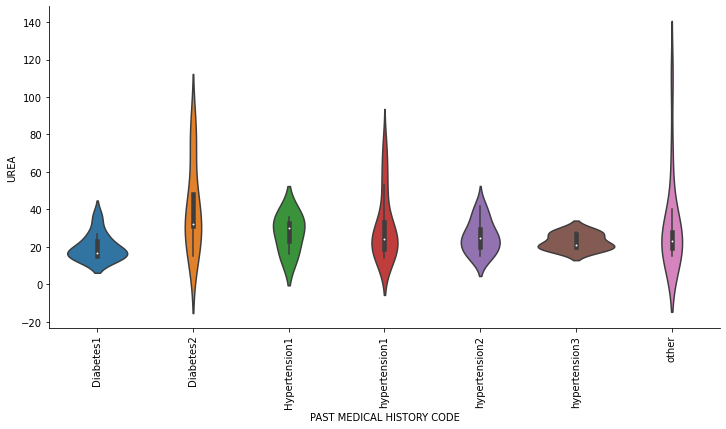

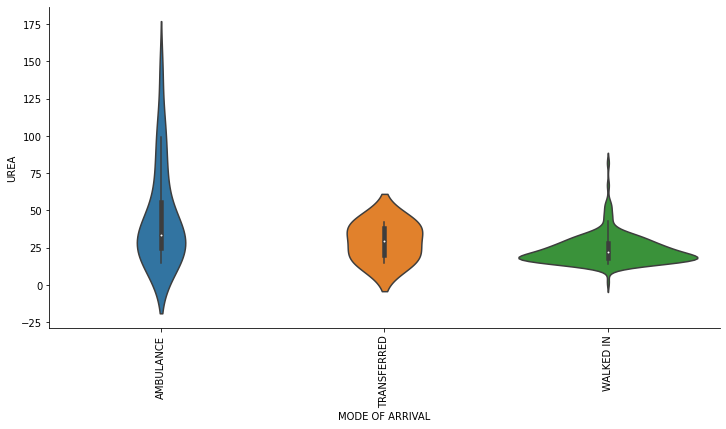

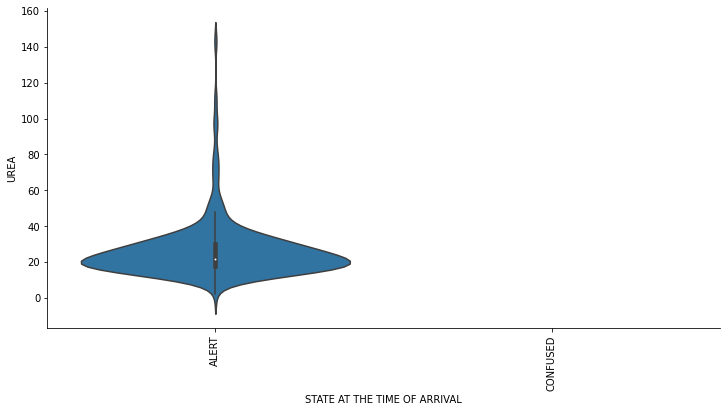

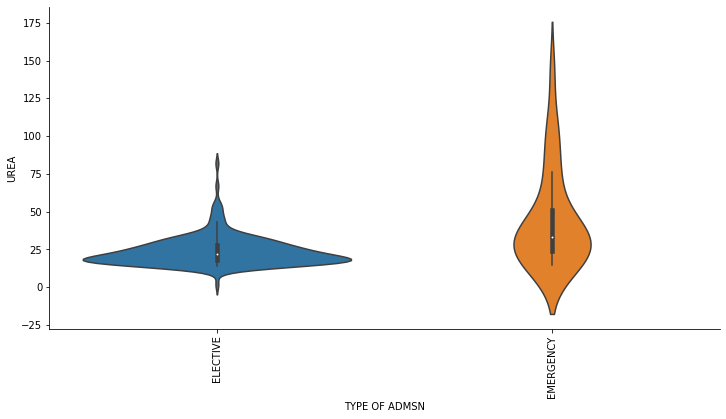

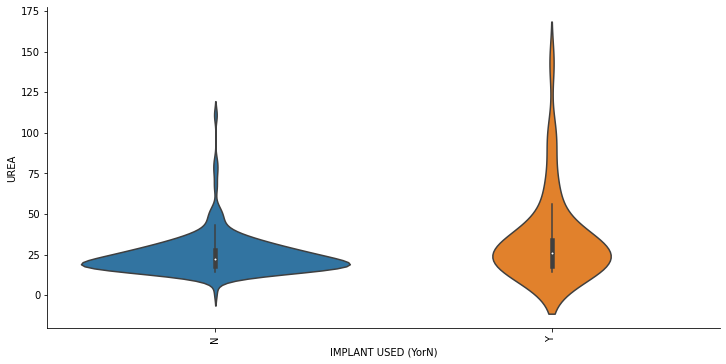

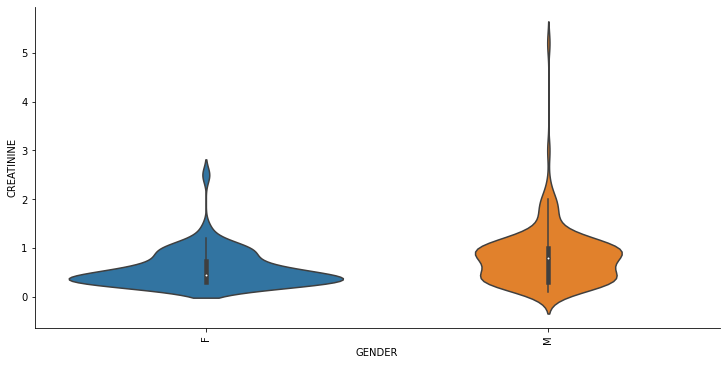

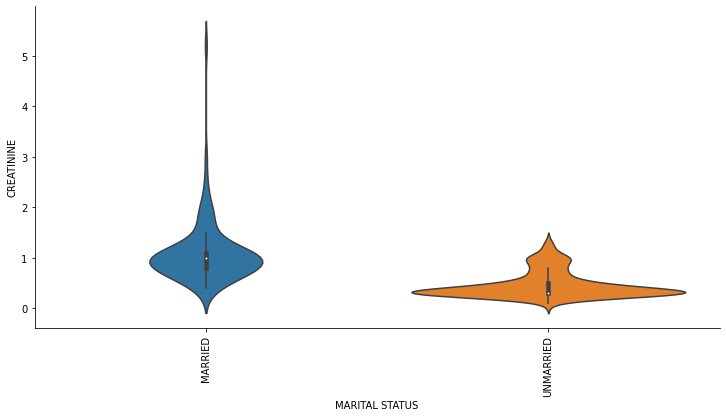

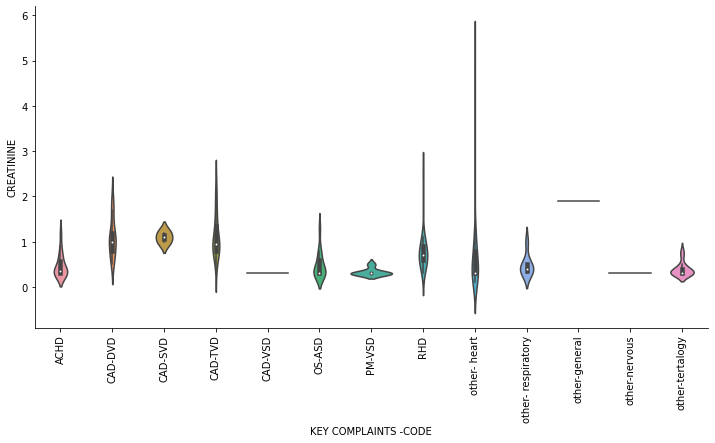

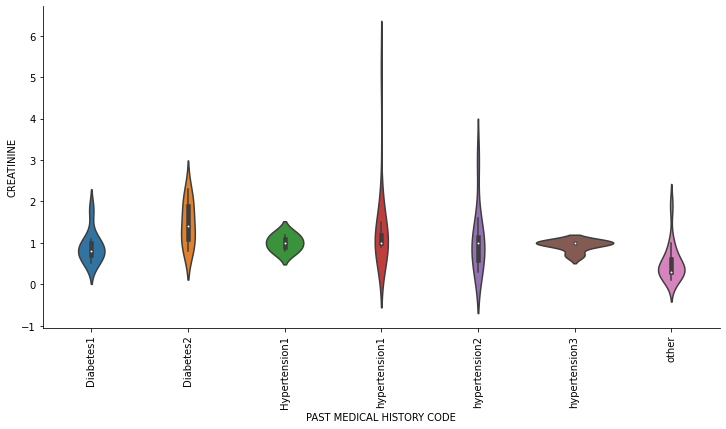

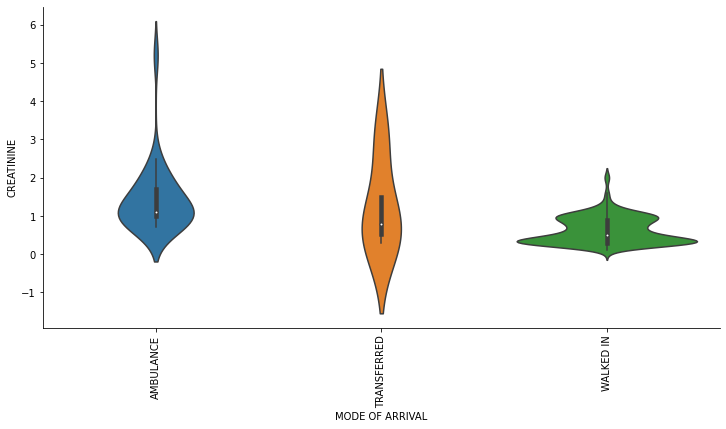

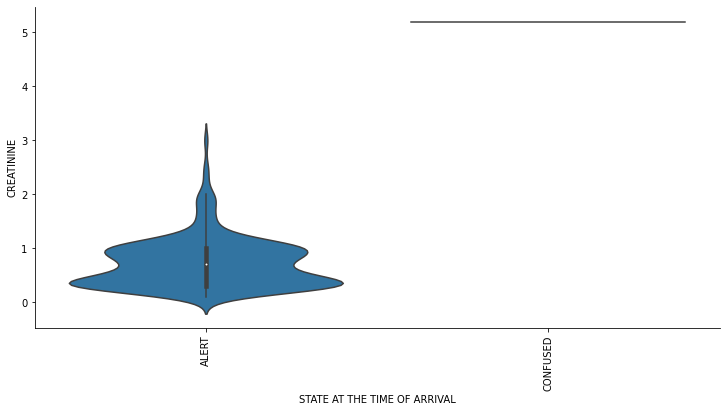

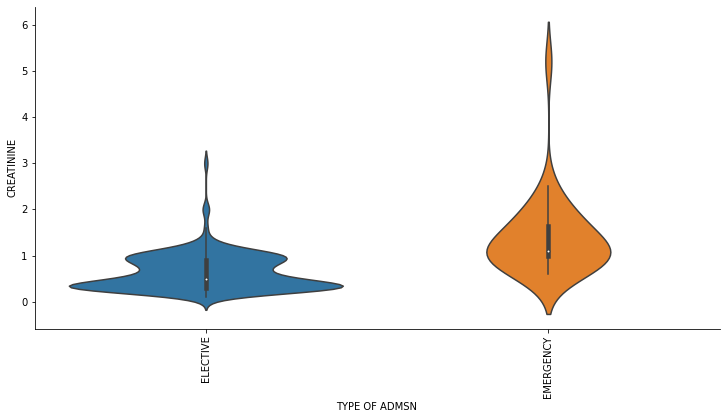

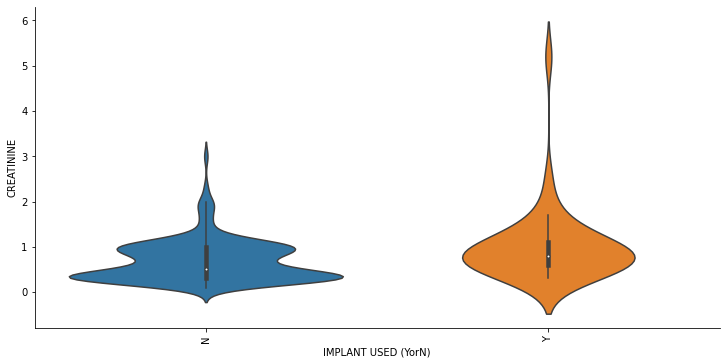

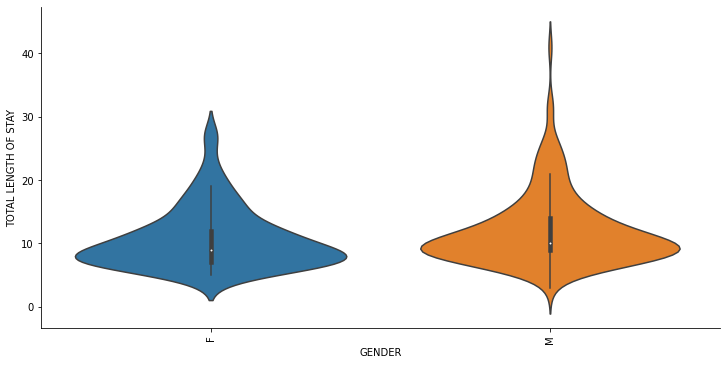

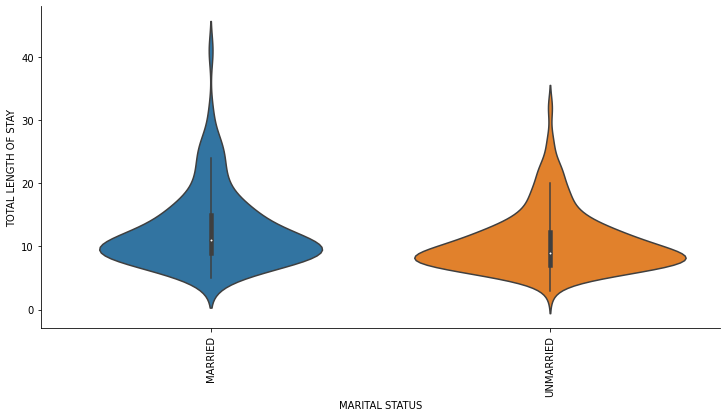

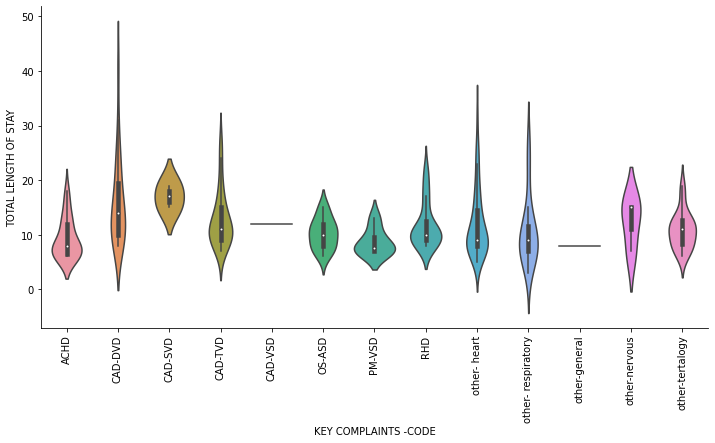

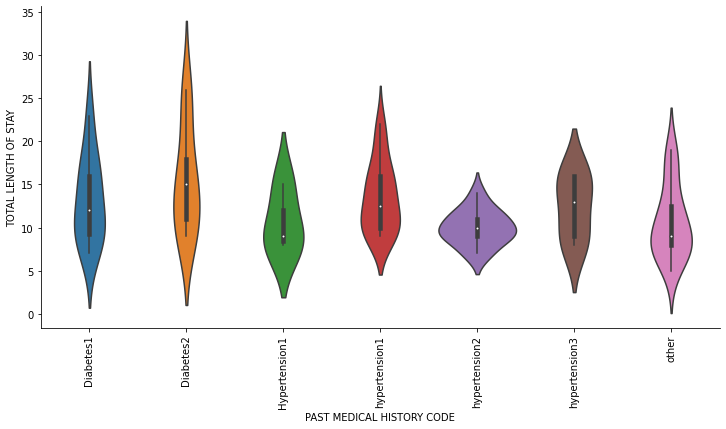

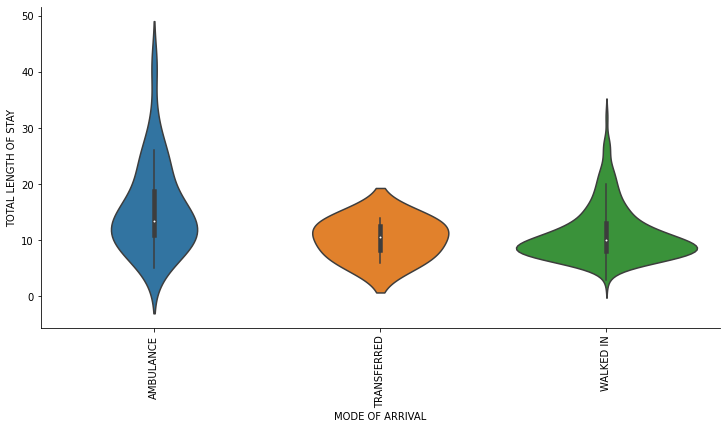

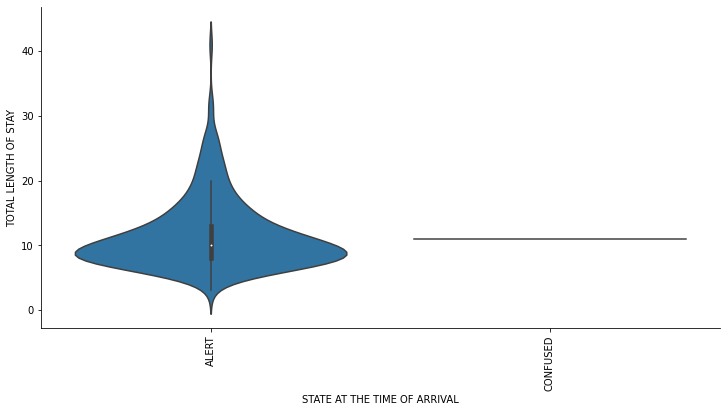

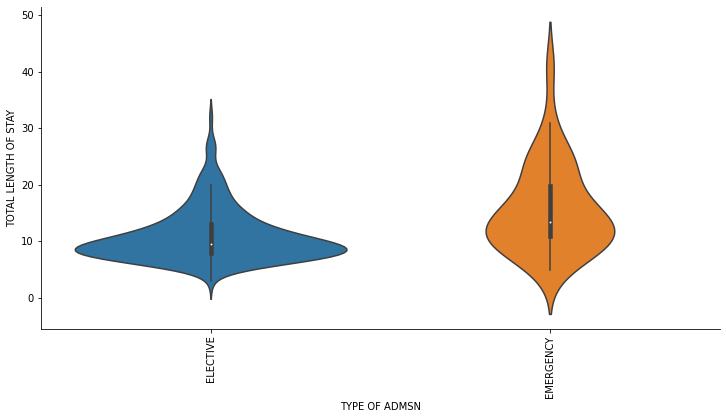

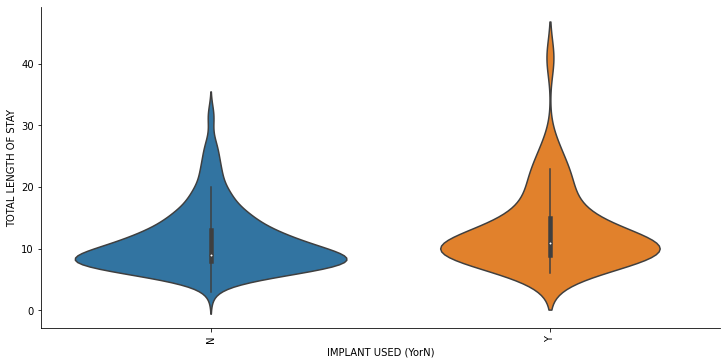

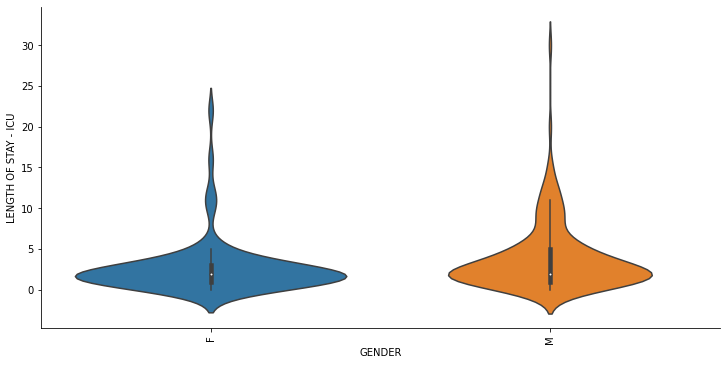

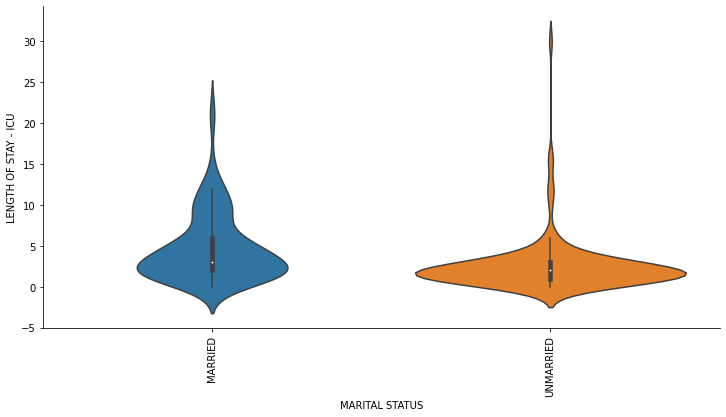

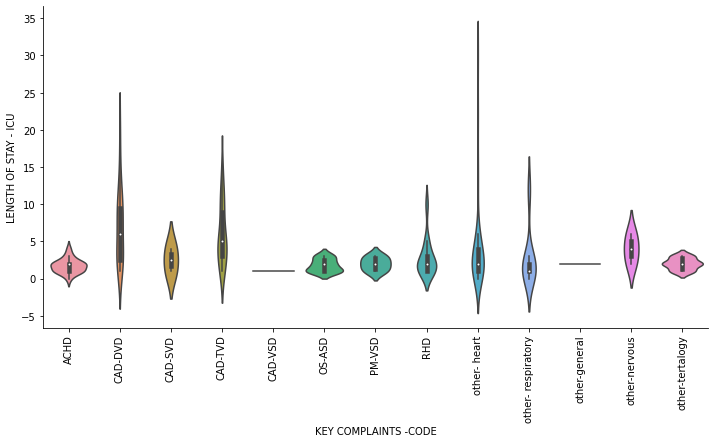

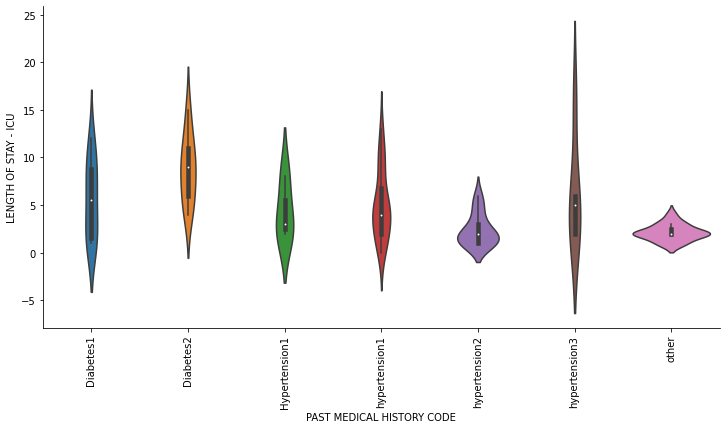

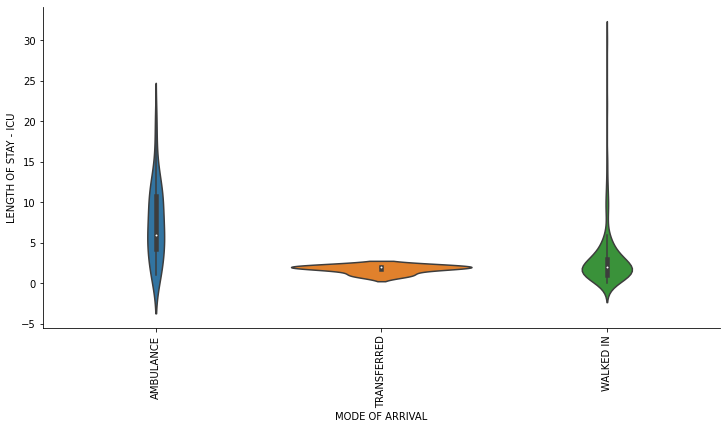

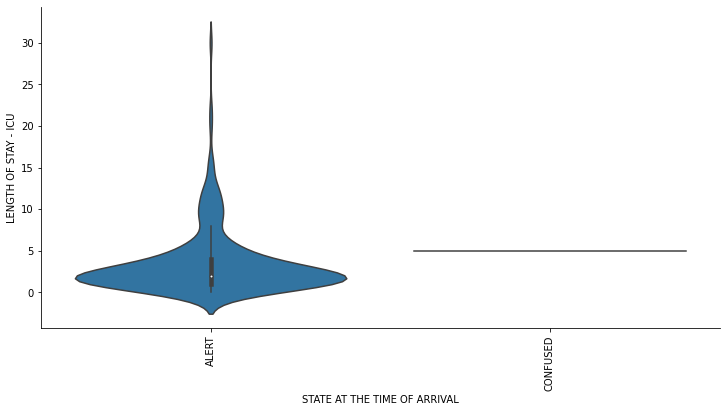

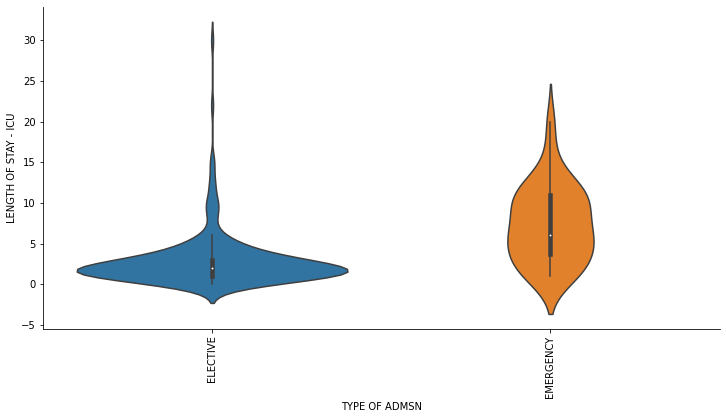

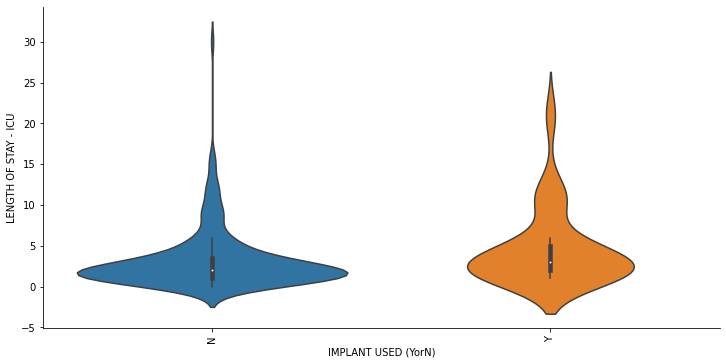

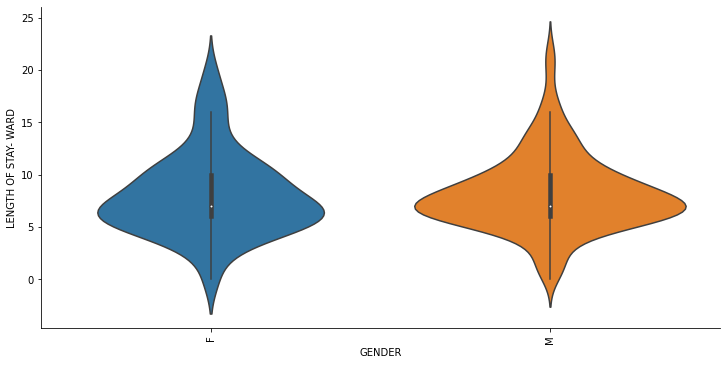

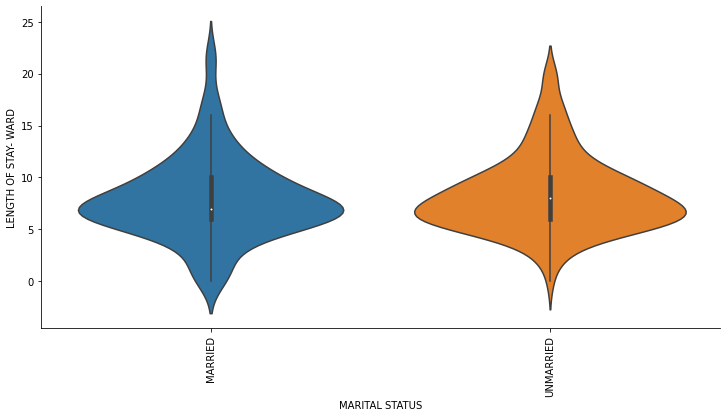

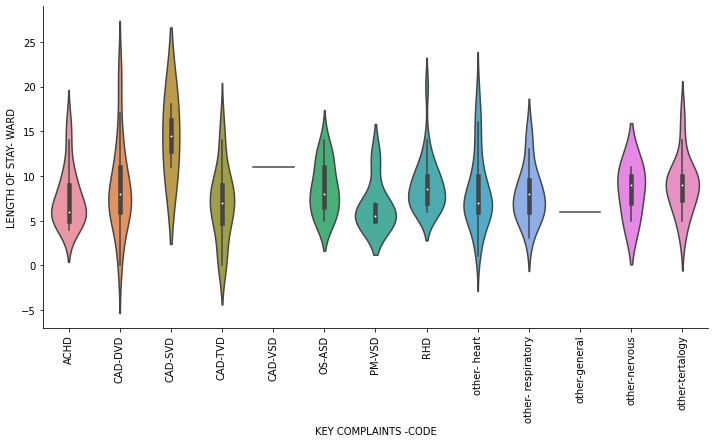

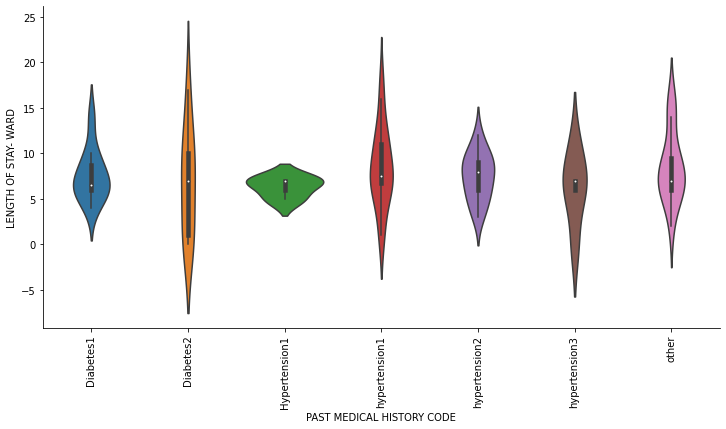

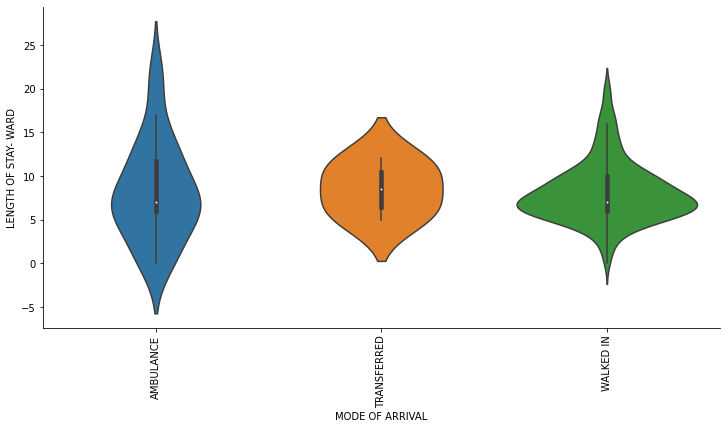

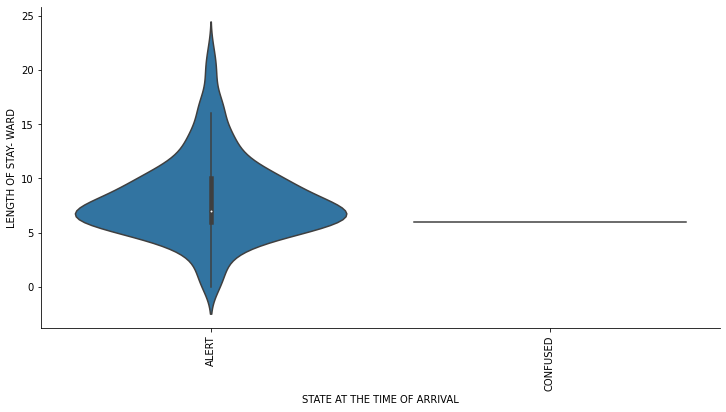

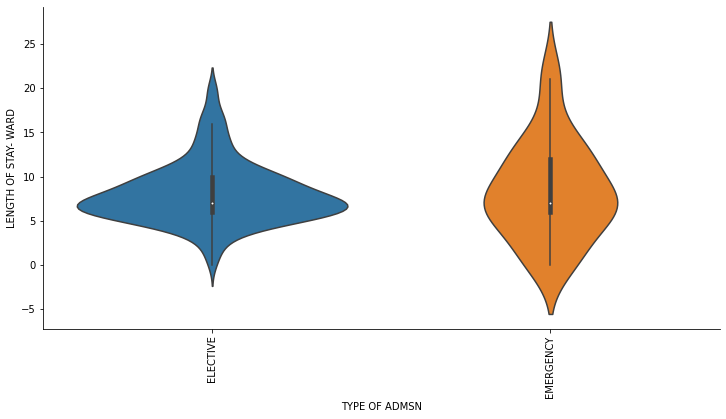

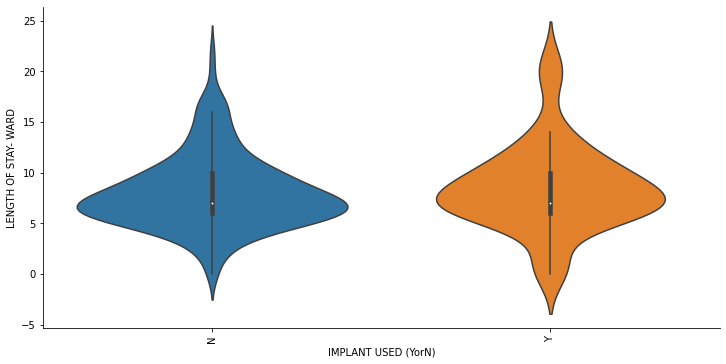

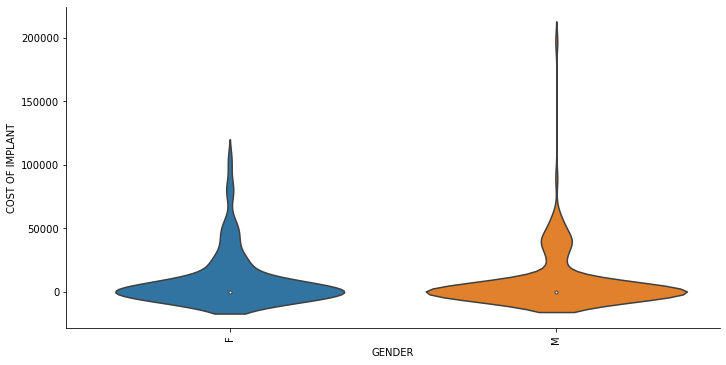

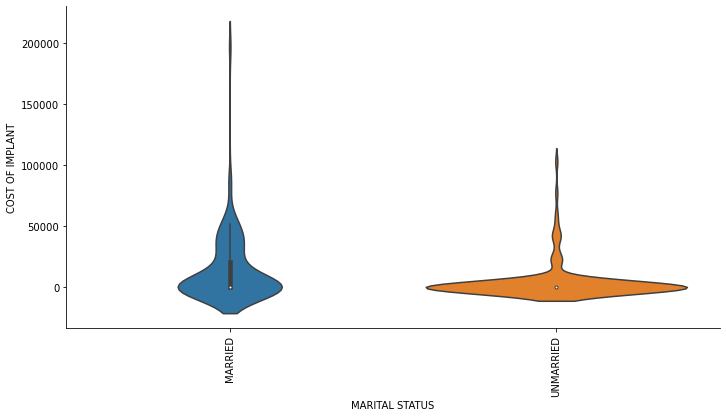

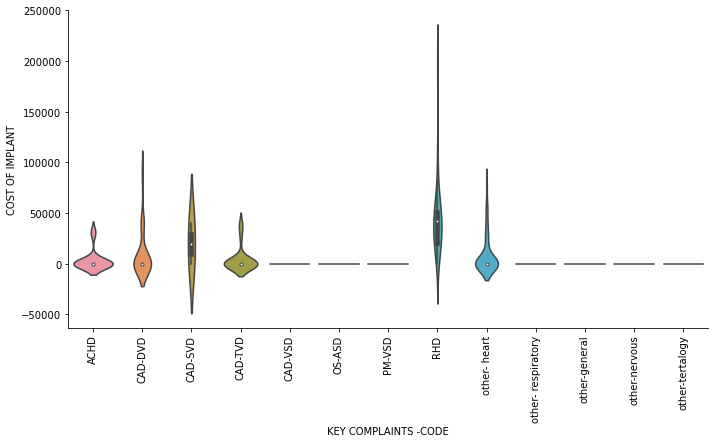

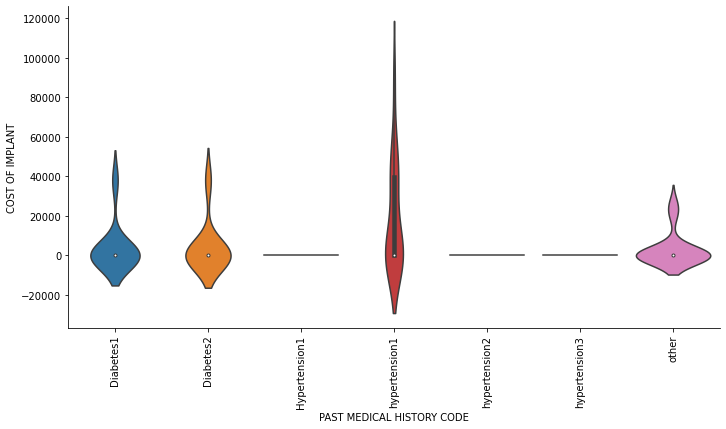

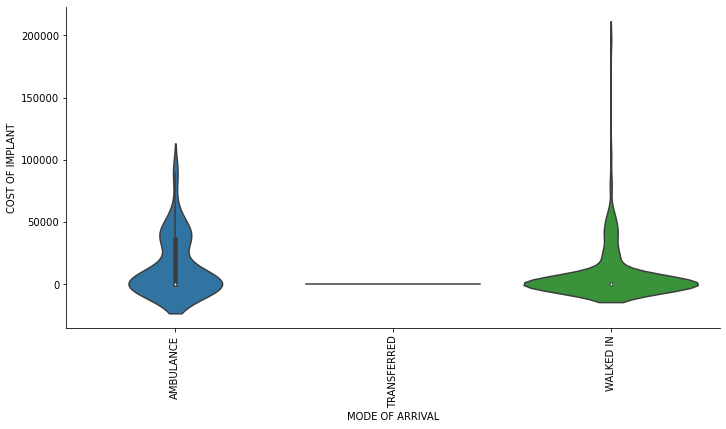

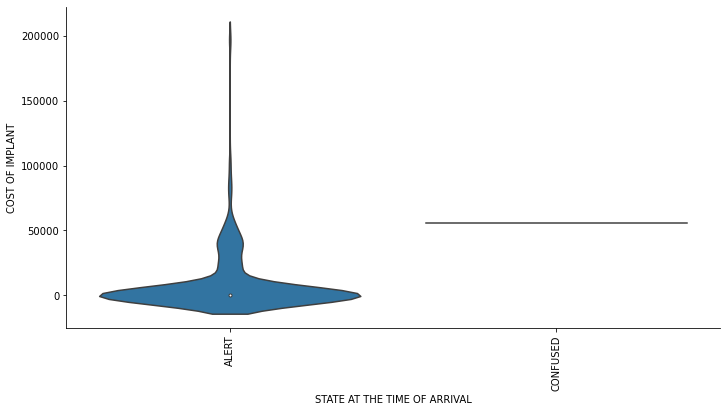

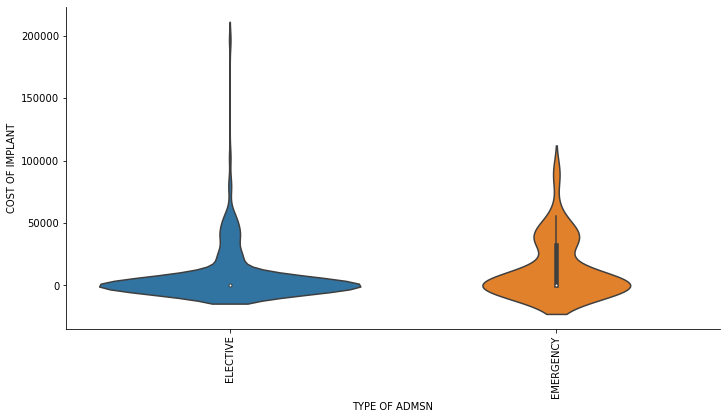

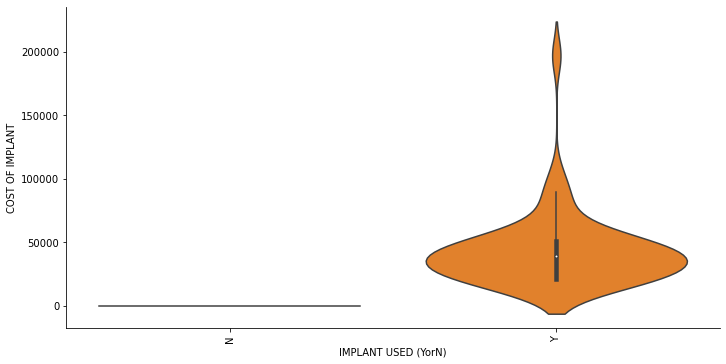

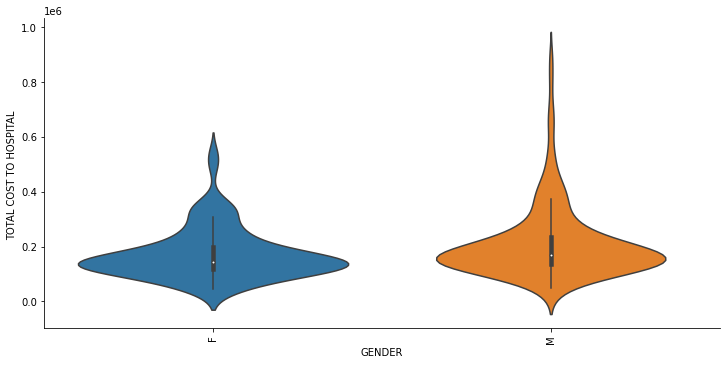

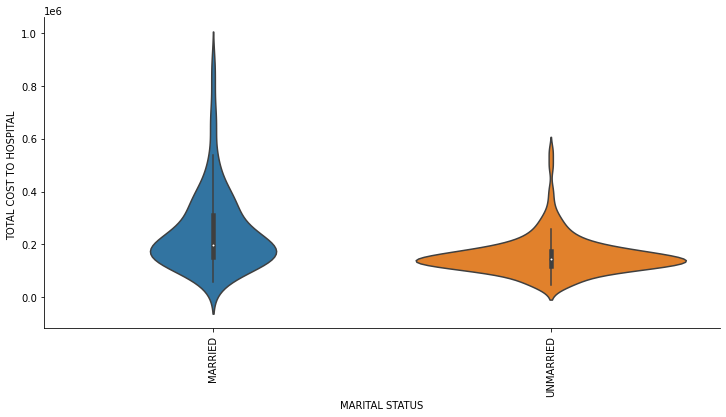

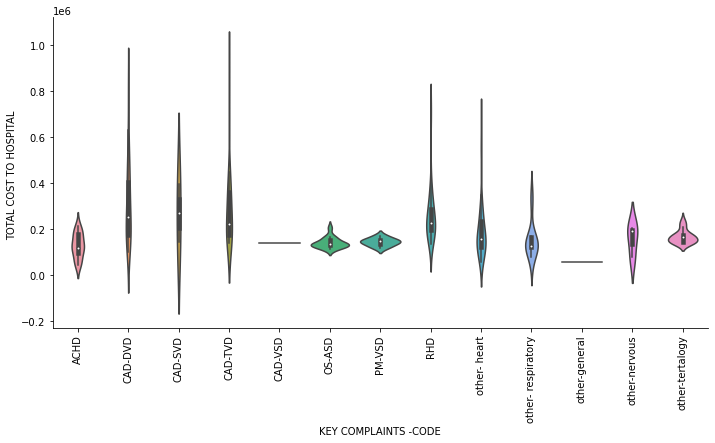

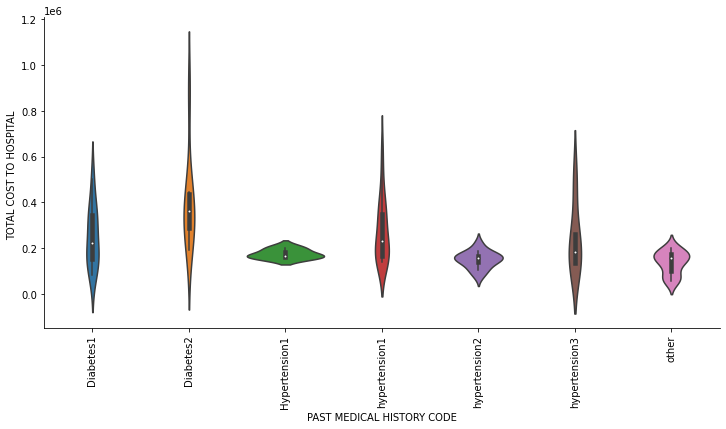

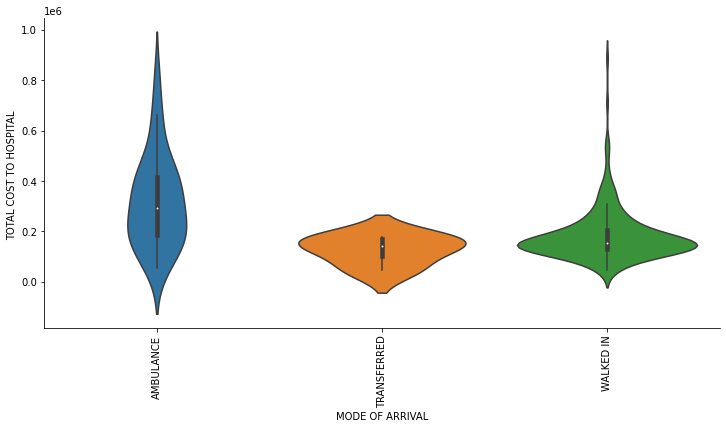

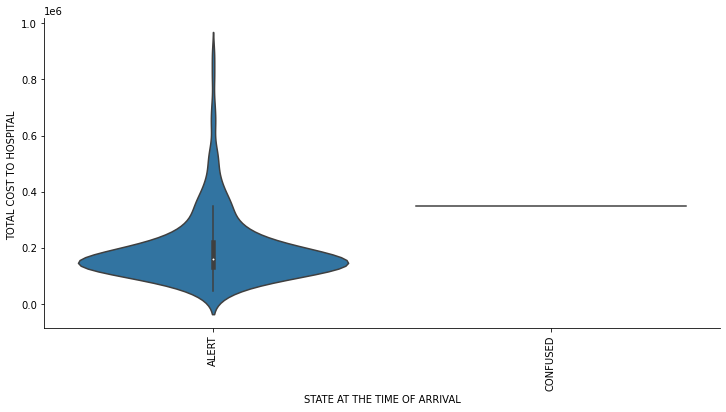

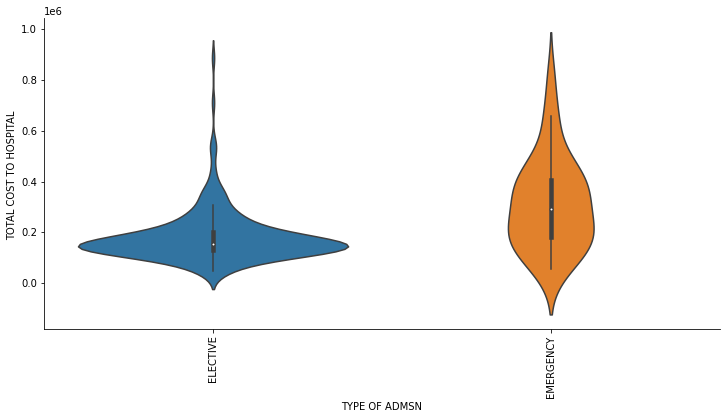

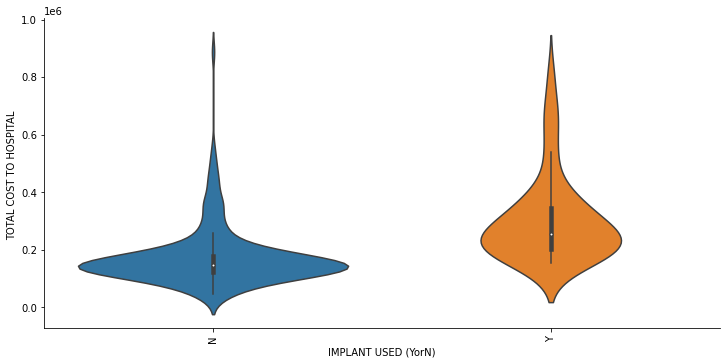


To check pairwise joint distribution of numeric data


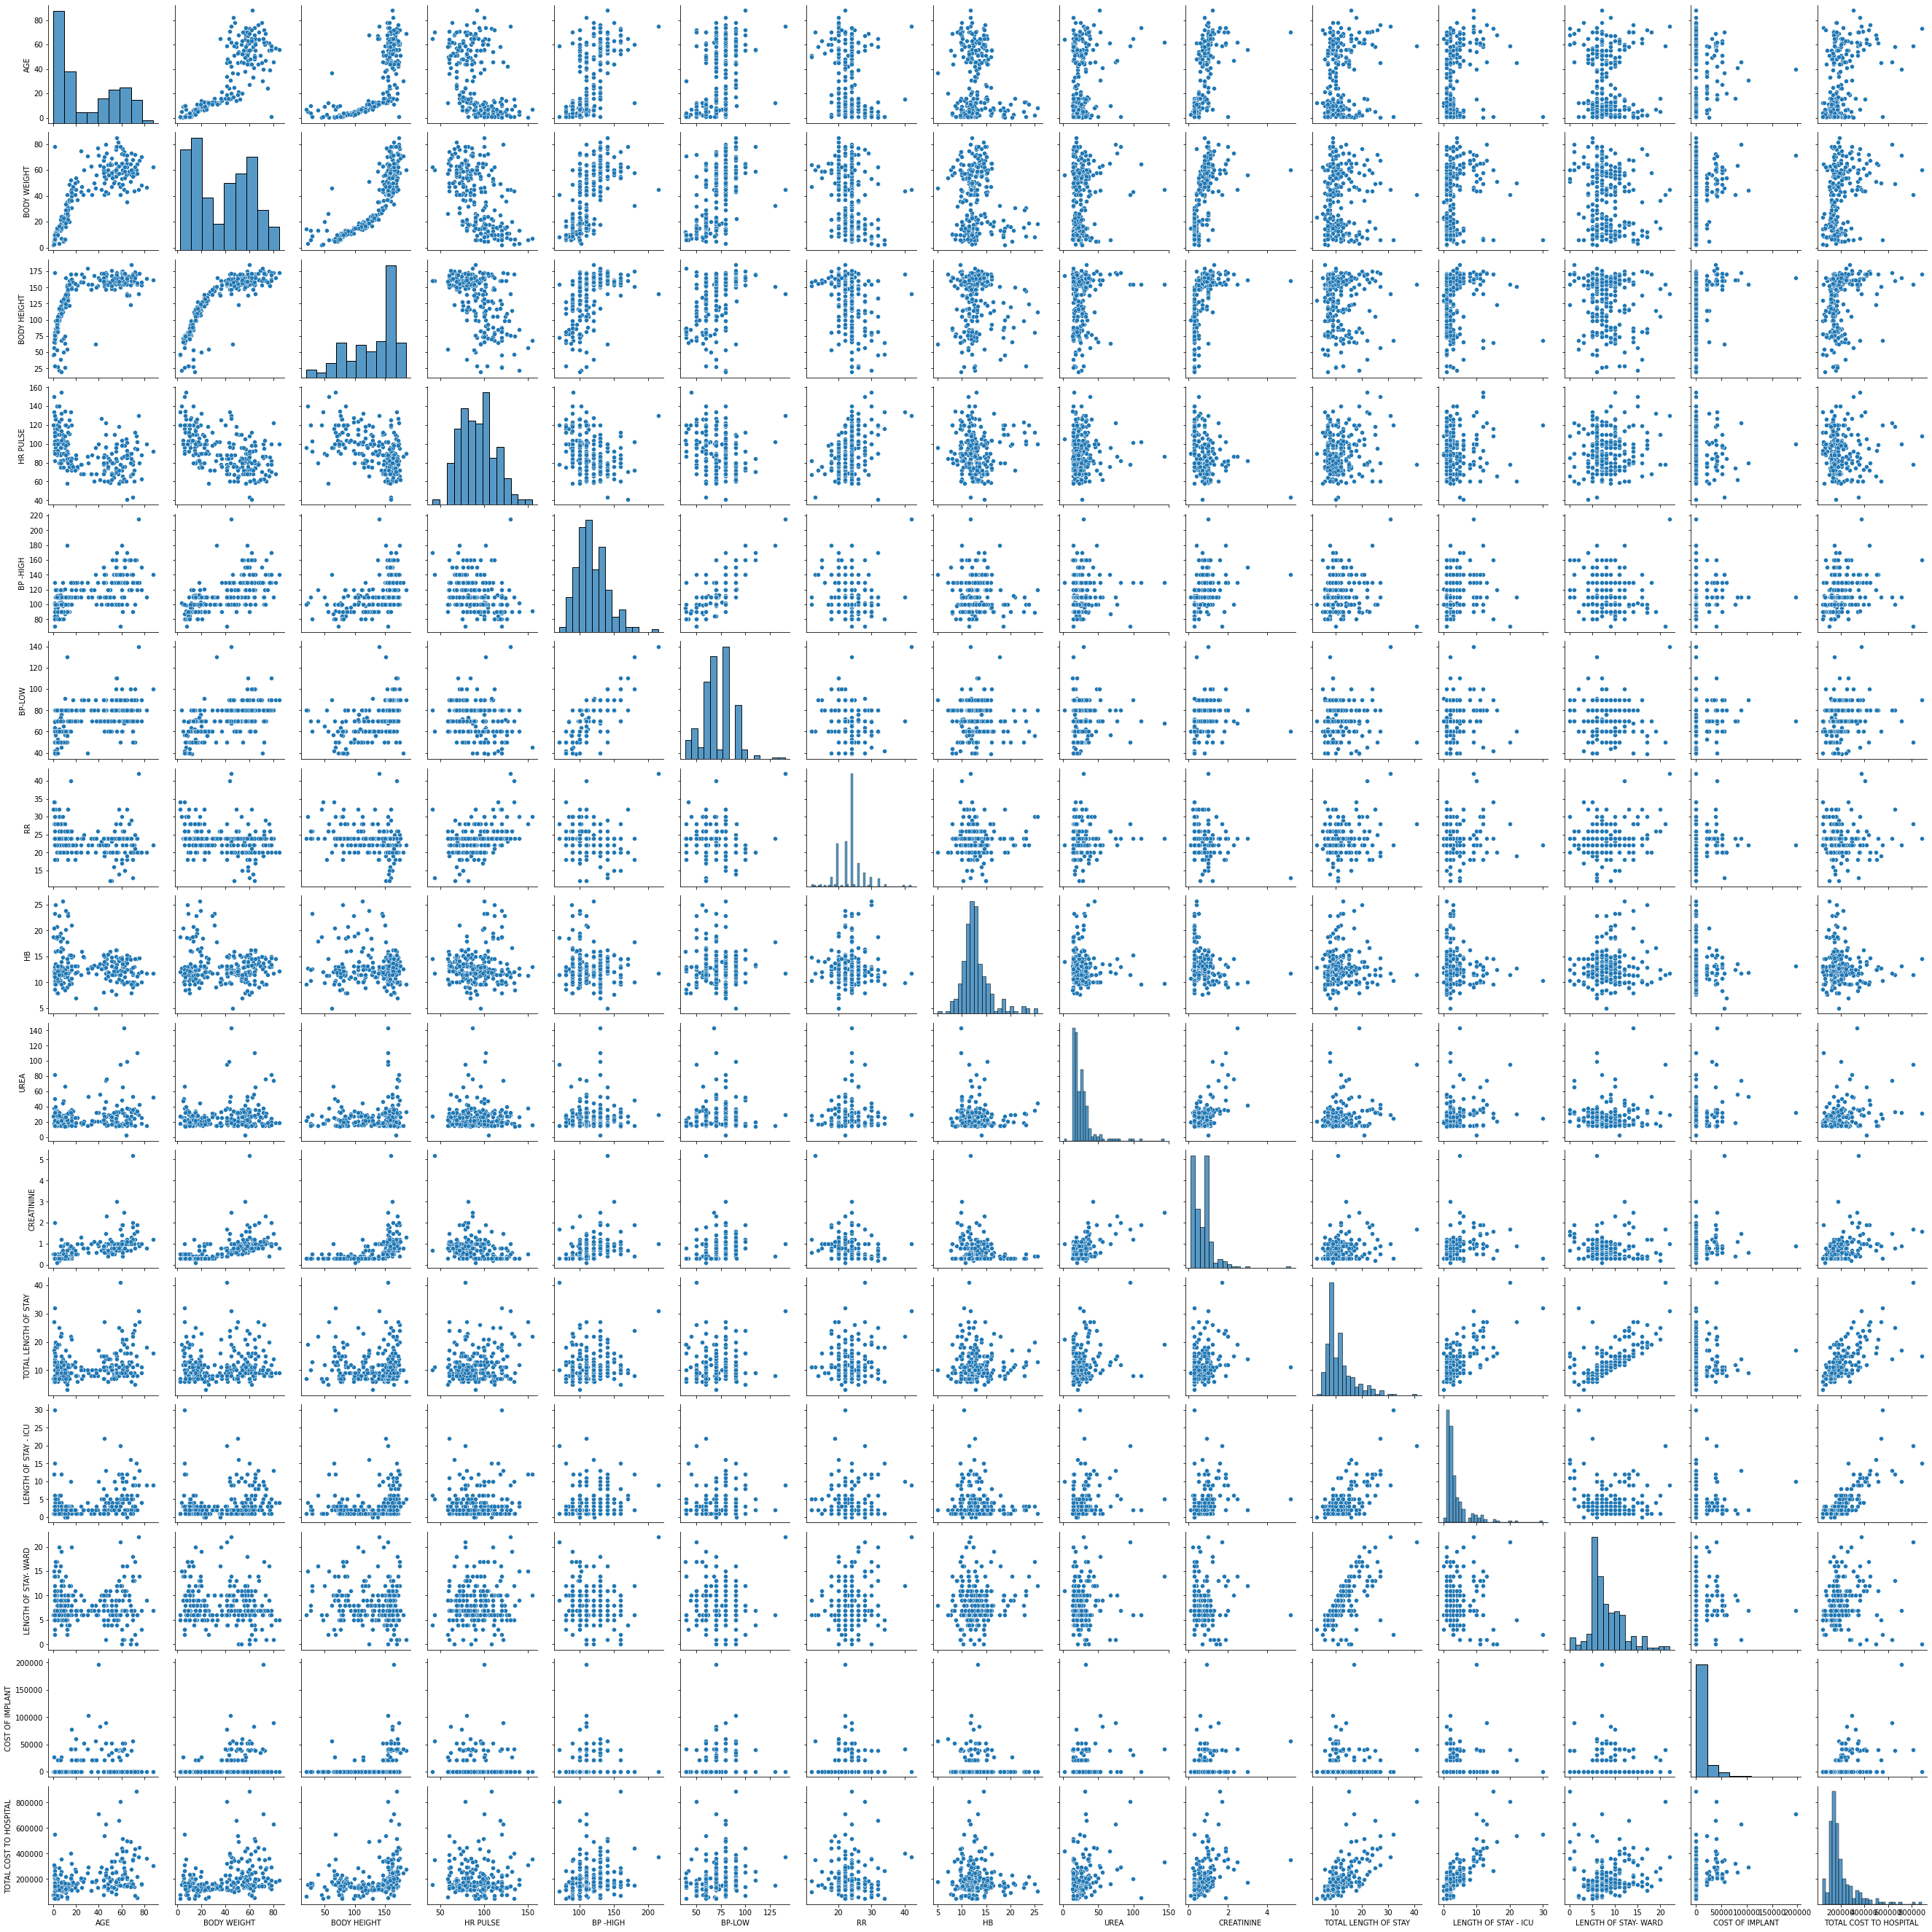


To check time series of numeric data  by daily, monthly and yearly frequency


In [18]:
eda(df_reset)


Preview of data with null values:
xxxxxxxxxxxxx
    AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  BODY HEIGHT  \
0  58.0      M        MARRIED         other- heart         49.2          160   
1  59.0      M        MARRIED              CAD-DVD         41.0          155   
5  75.0      M        MARRIED              CAD-DVD         45.0          140   

   HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  MODE OF ARRIVAL  \
0       118     100.0    80.0  32  ...        0.8        AMBULANCE   
1        78      70.0    50.0  28  ...        1.7        AMBULANCE   
5       130     215.0   140.0  42  ...        1.0        AMBULANCE   

   STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN TOTAL LENGTH OF STAY  \
0                         ALERT      EMERGENCY                   25   
1                         ALERT      EMERGENCY                   41   
5                         ALERT      EMERGENCY                   31   

  LENGTH OF STAY - ICU LENGTH OF STAY- WARD  IMPLANT USED (YorN)

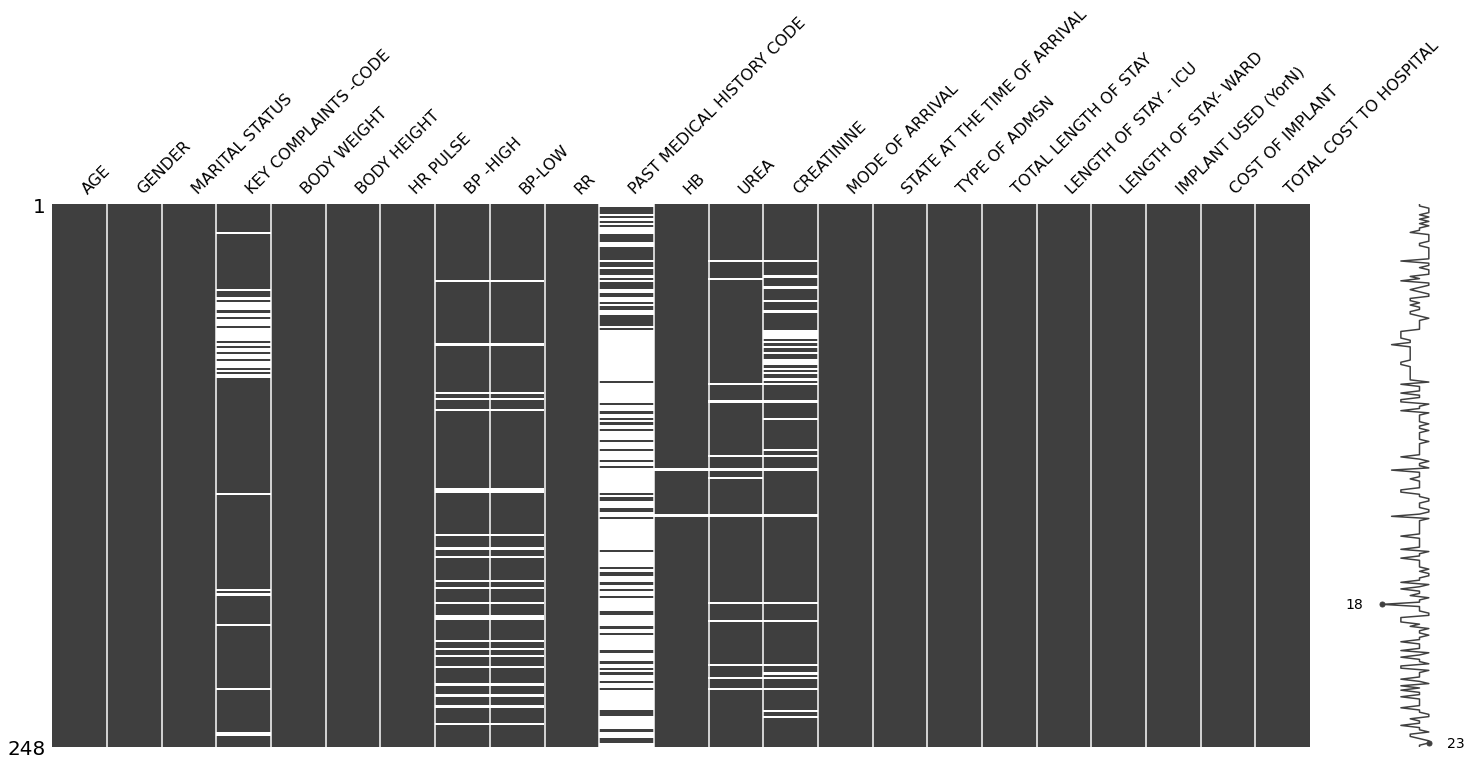

In [20]:
# generate preview of entries with null values
if df_reset.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df_reset[df_reset.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [21]:
# generate count statistics of duplicate entries
if len(df_reset[df_reset.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_reset[df_reset.duplicated()]))
    print(df_reset[df_reset.duplicated(keep=False)].sort_values(by=list(df_reset.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  8
    AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  BODY HEIGHT  \
71  5.0      F      UNMARRIED   other- respiratory         15.0          117   
80  5.0      F      UNMARRIED   other- respiratory         15.0          117   
65  5.0      M      UNMARRIED   other- respiratory         15.0          105   
75  5.0      M      UNMARRIED   other- respiratory         15.0          105   
61  7.0      M      UNMARRIED                  NaN         19.0          107   

    HR PULSE  BP -HIGH  BP-LOW  RR  ... CREATININE  MODE OF ARRIVAL  \
71        80     110.0    80.0  24  ...        NaN        WALKED IN   
80        80     110.0    80.0  24  ...        NaN        WALKED IN   
65       115     113.0    70.0  26  ...        NaN        WALKED IN   
75       115     113.0    70.0  26  ...        NaN        WALKED IN   
61       100     103.0    76.0  26  ...        NaN        WALKED IN   

    STATE AT THE TIME OF ARRIVAL  TYPE OF ADMSN TOTAL LENGTH O

In [31]:
df_reset.drop_duplicates(inplace=True)

In [32]:
df_reset.shape

(240, 23)

In [33]:
def categorical_eda(df_reset):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df_reset.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df_reset.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df_reset)
        fig.set_xticklabels(rotation=90)
        plt.show()

To check: Unique count of non-numeric data
GENDER                           2
MARITAL STATUS                   2
KEY COMPLAINTS -CODE            13
PAST MEDICAL HISTORY CODE        7
MODE OF ARRIVAL                  3
STATE AT THE TIME OF ARRIVAL     2
TYPE OF ADMSN                    2
IMPLANT USED (YorN)              2
dtype: int64
Top 5 unique values of GENDER
  GENDER  Count
0      M    161
1      F     79
 
Top 5 unique values of MARITAL STATUS
  MARITAL STATUS  Count
0      UNMARRIED    133
1        MARRIED    107
 
Top 5 unique values of KEY COMPLAINTS -CODE
  KEY COMPLAINTS -CODE  Count
0         other- heart     55
1              CAD-DVD     27
2                  RHD     26
3              CAD-TVD     24
4                 ACHD     19
 
Top 5 unique values of PAST MEDICAL HISTORY CODE
  PAST MEDICAL HISTORY CODE  Count
0             hypertension1     20
1                     other     15
2             hypertension2     13
3                 Diabetes1     10
4                 Diab

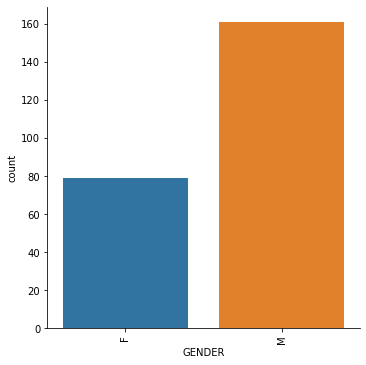

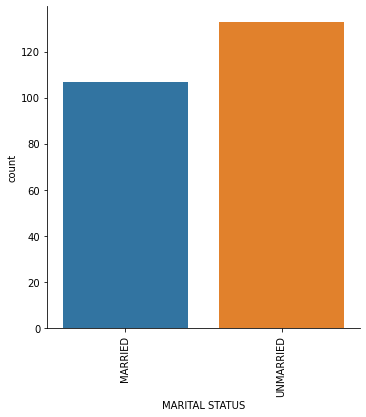

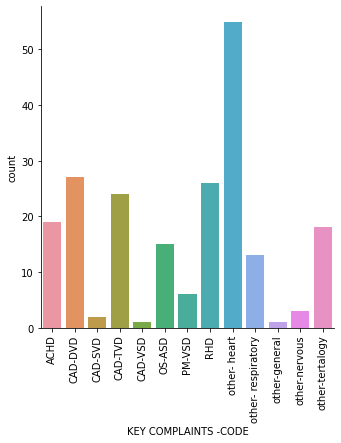

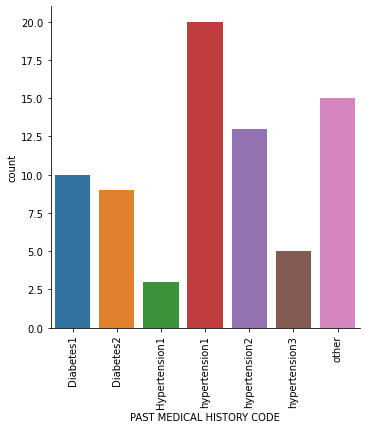

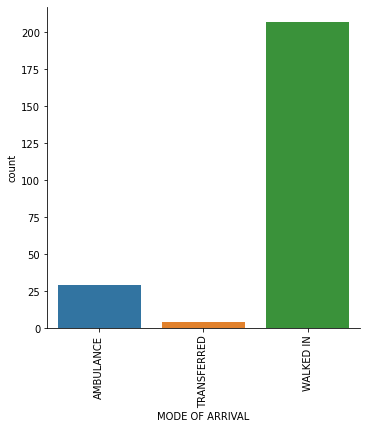

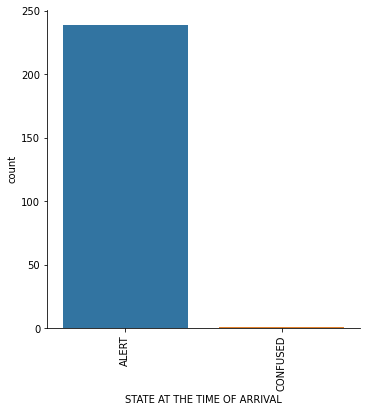

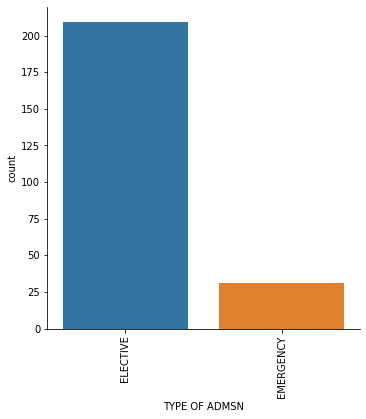

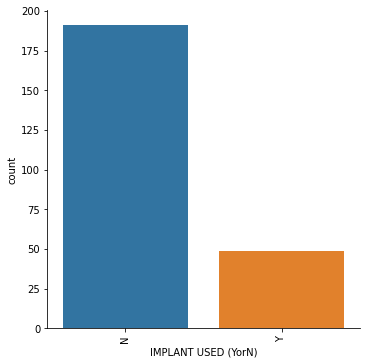

In [34]:
categorical_eda(df_reset)

In [37]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='bar', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()


To check: 
Distribution of numeric data


count           mean            std           min  \
AGE                      240.0      29.421665      26.109825      0.032877   
BODY WEIGHT              240.0      37.796333      23.264139      2.020000   
BODY HEIGHT              240.0     130.245833      39.705532     19.000000   
HR PULSE                 240.0      92.270833      20.433728     41.000000   
BP -HIGH                 217.0     115.271889      22.877791     70.000000   
BP-LOW                   217.0      71.935484      15.481933     39.000000   
RR                       240.0      23.475000       3.853950     12.000000   
HB                       238.0      12.933025       3.119777      5.000000   
UREA                     227.0      26.809251      16.198660      2.000000   
CREATININE               211.0       0.742180       0.552719      0.100000   
TOTAL LENGTH OF STAY     240.0      11.745833       5.427150      3.000000   
LENGTH OF STAY - ICU     240.0       3.545833       3.895870      0.000000   
LENGTH OF STAY- WARD     240.0       8.216667       3.794255      0.000000   
COST OF IMPLANT          240.0    8829.008333   21821.329874      0.000000   
TOTAL COST TO HOSPITAL   240.0  201195.725292  123836.469681  46093.000000   

                                25%       50%        75%       max  
AGE                           6.000      16.0      55.00      88.0  
BODY WEIGHT                  15.000      41.0      59.00      85.0  
BODY HEIGHT                  99.750     149.0     160.00     185.0  
HR PULSE                     78.000      90.0     104.00     155.0  
BP -HIGH                    100.000     110.0     130.00     215.0  
BP-LOW                       60.000      70.0      80.00     140.0  
RR                           22.000      24.0      24.00      42.0  
HB                           11.325      12.4      14.00      25.7  
UREA                         18.000      23.0      30.00     143.0  
CREATININE                    0.300       0.6       1.00       5.2  
TOTAL LENGTH OF STAY          8.000      10.0      14.00      41.0  
LENGTH OF STAY - ICU          1.000       2.0       4.00      30.0  
LENGTH OF STAY- WARD          6.000       7.0      10.00      22.0  
COST OF IMPLANT               0.000       0.0       0.00  196848.0  
TOTAL COST TO HOSPITAL   132894.000  163624.0  230135.75  887350.0

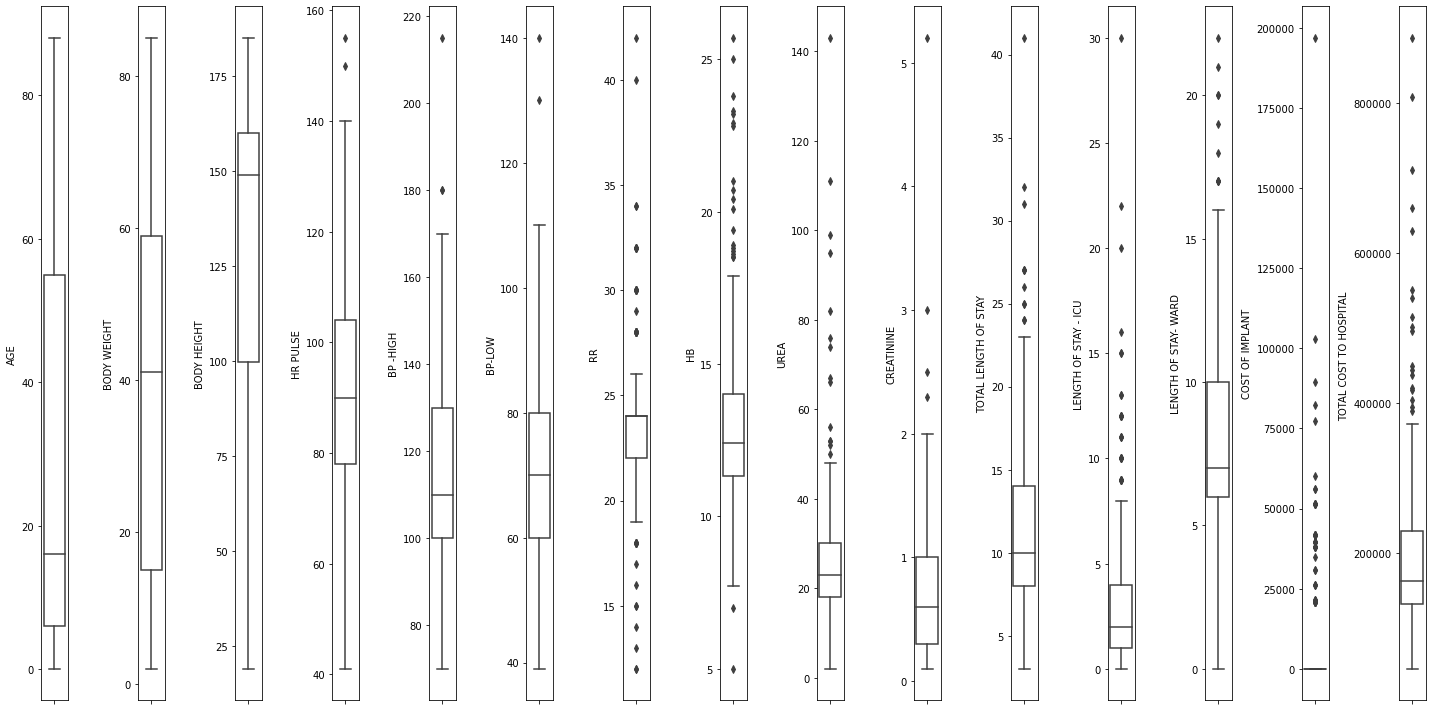

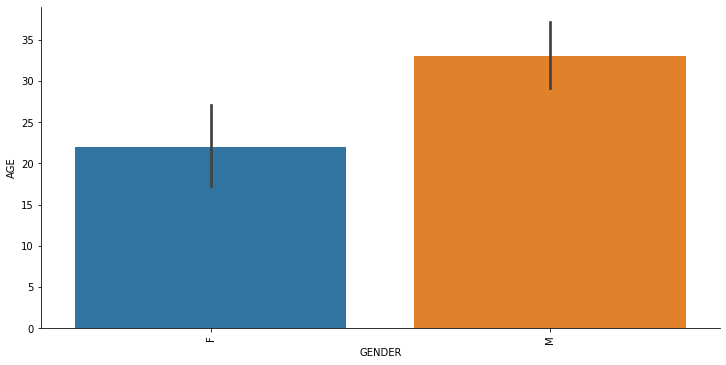

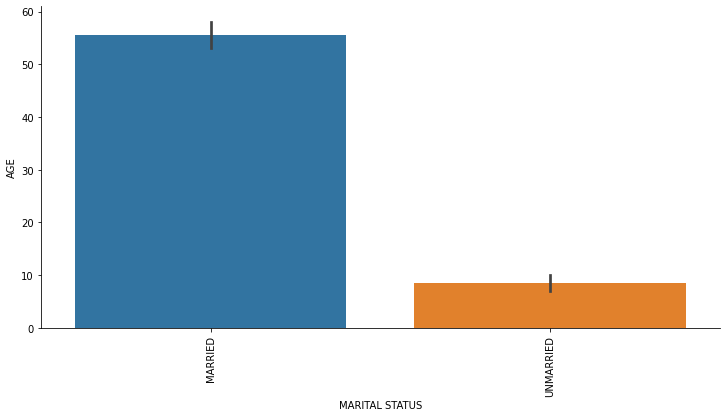

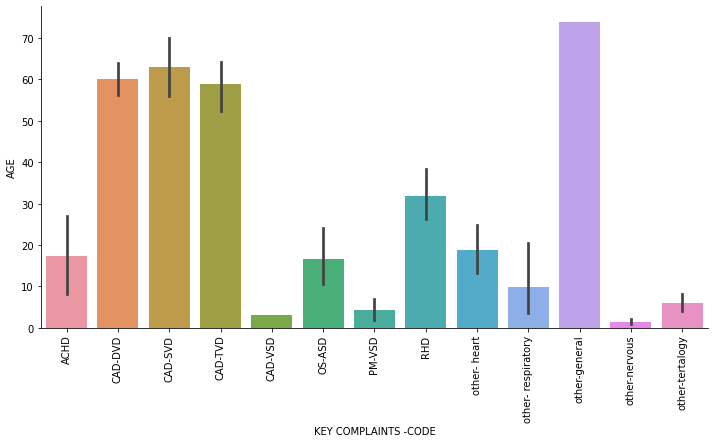

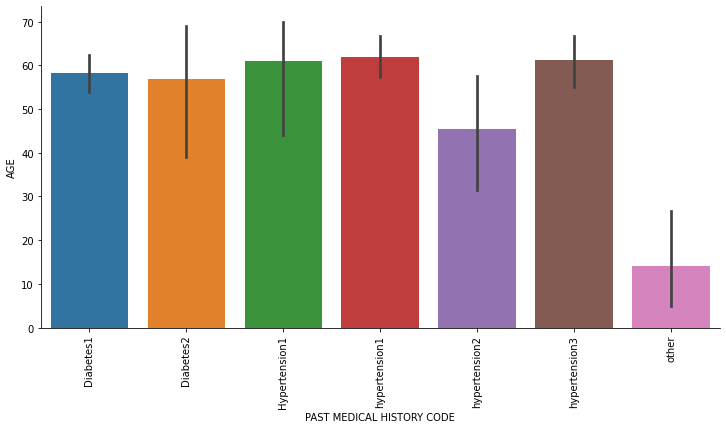

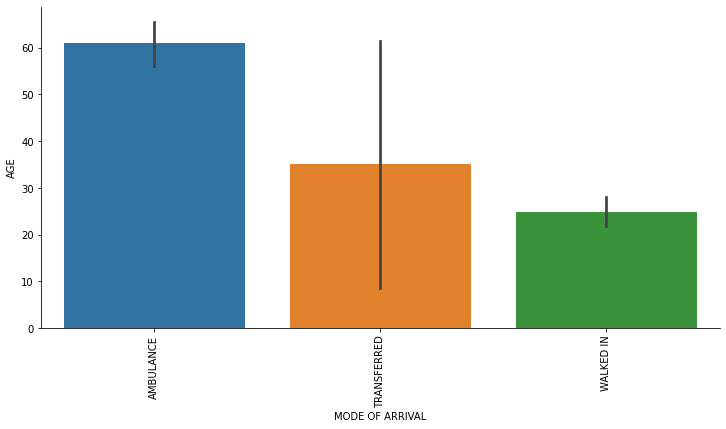

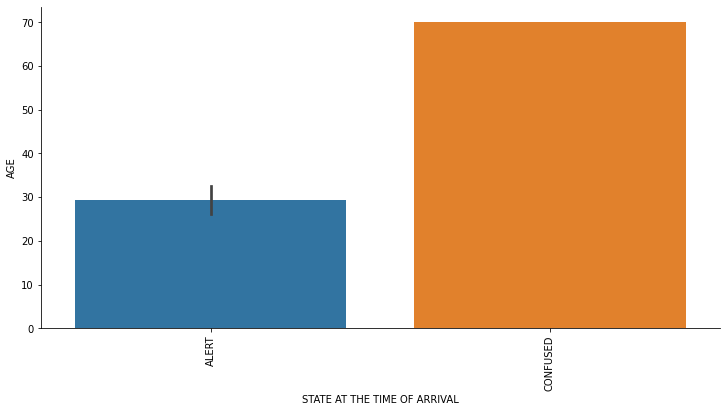

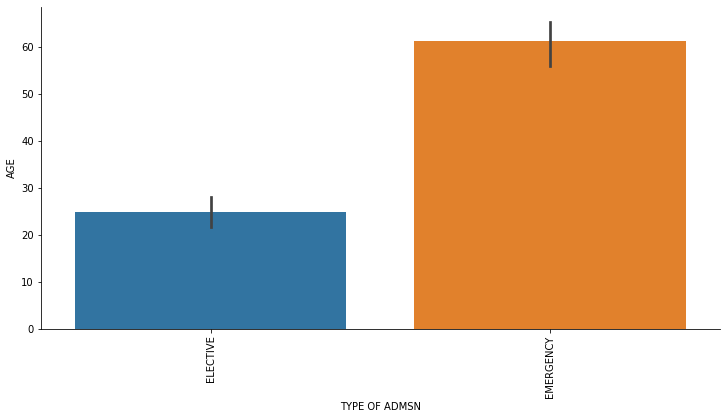

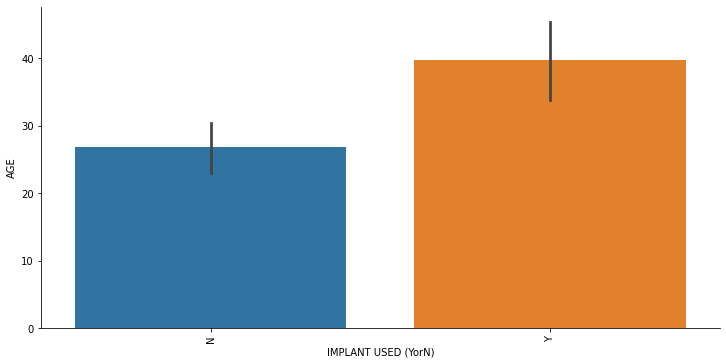

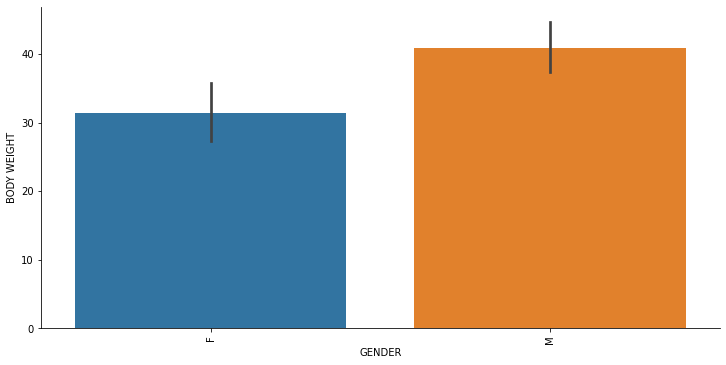

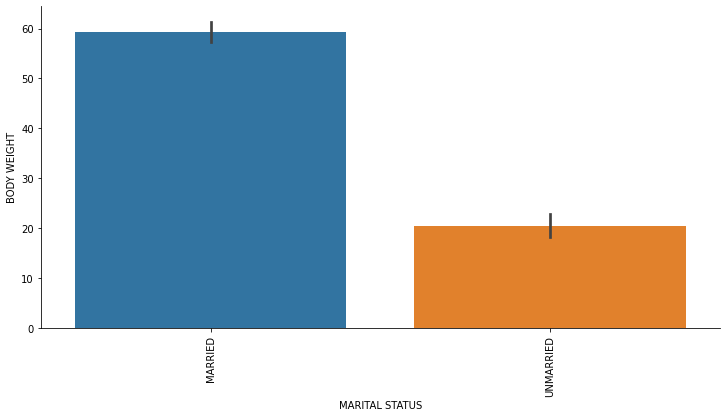

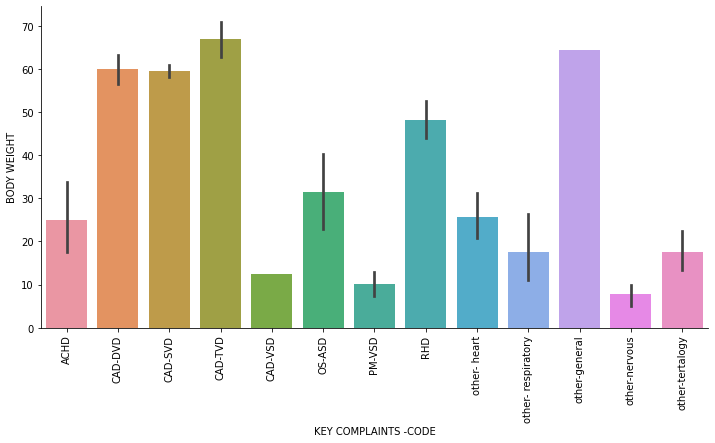

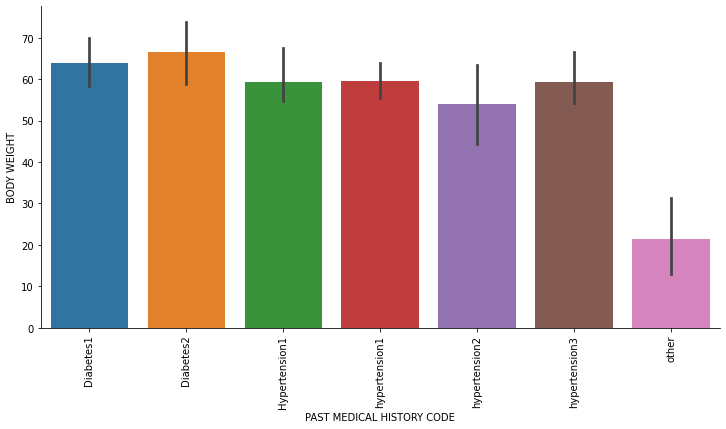

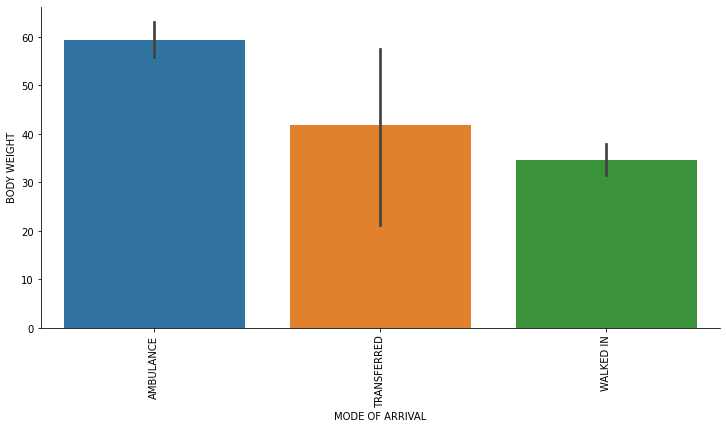

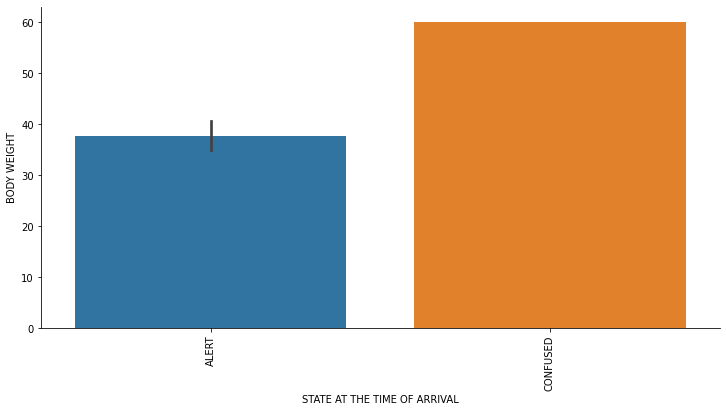

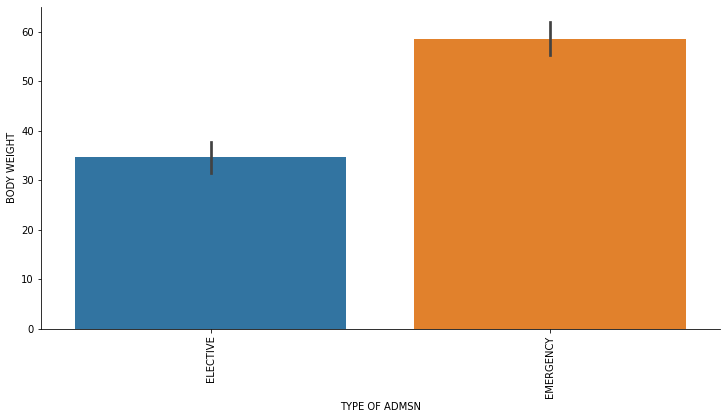

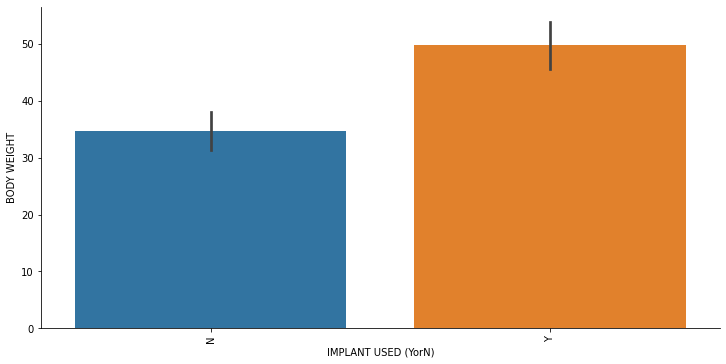

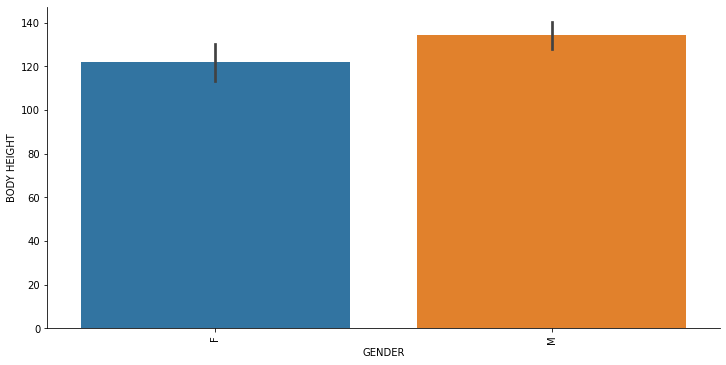

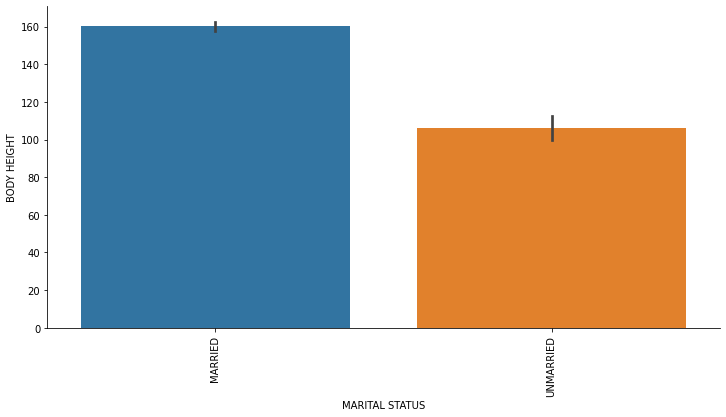

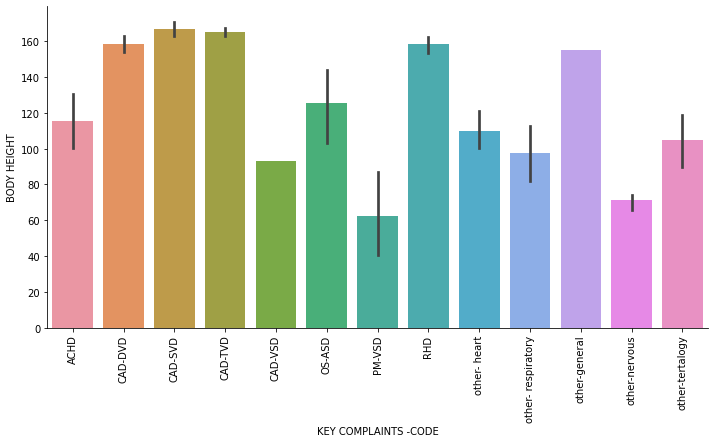

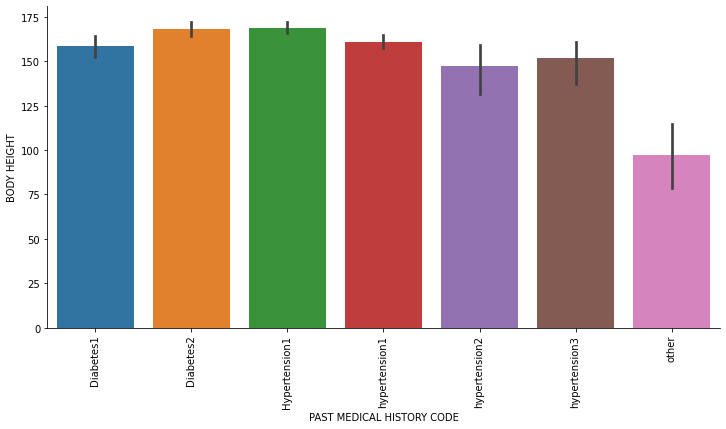

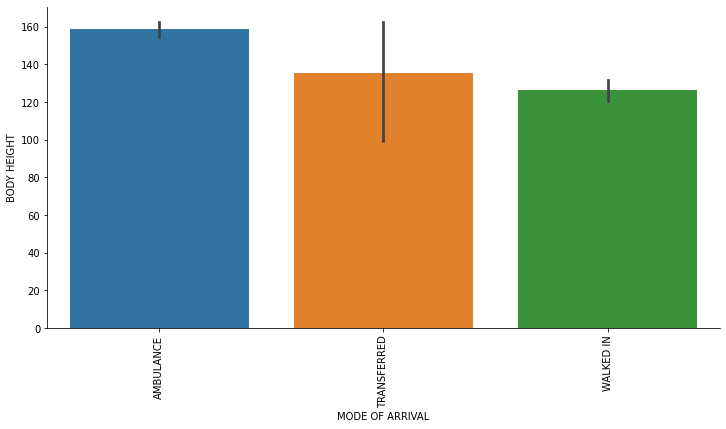

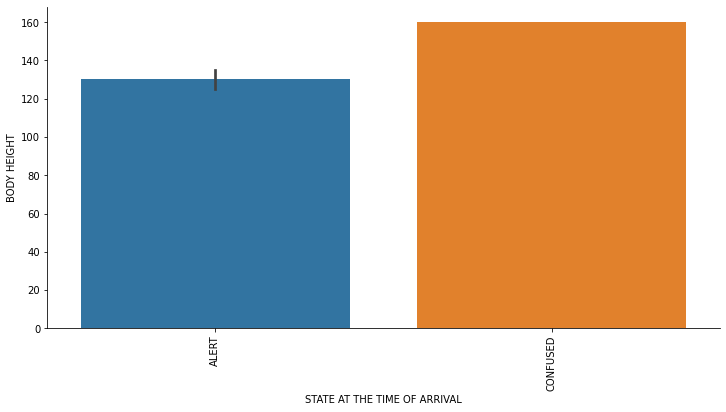

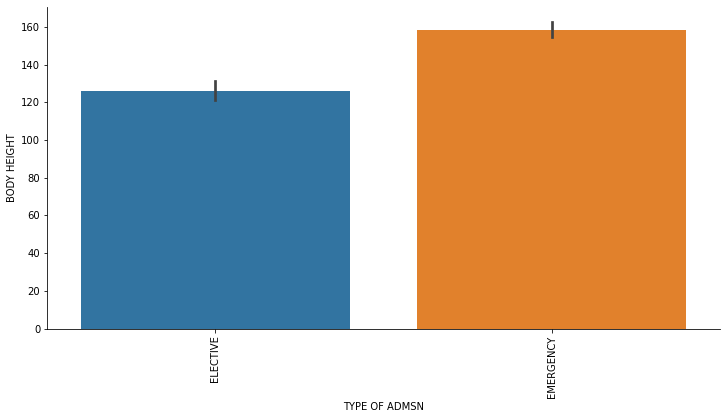

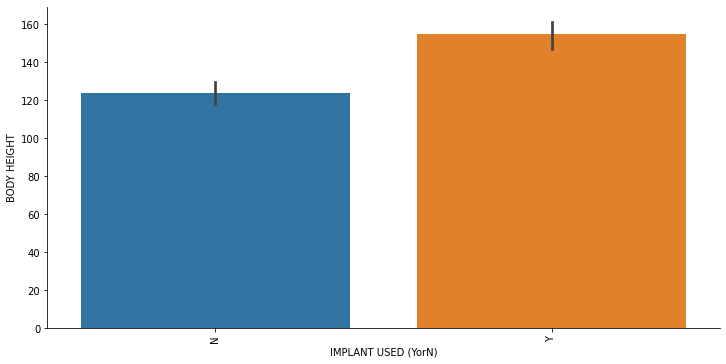

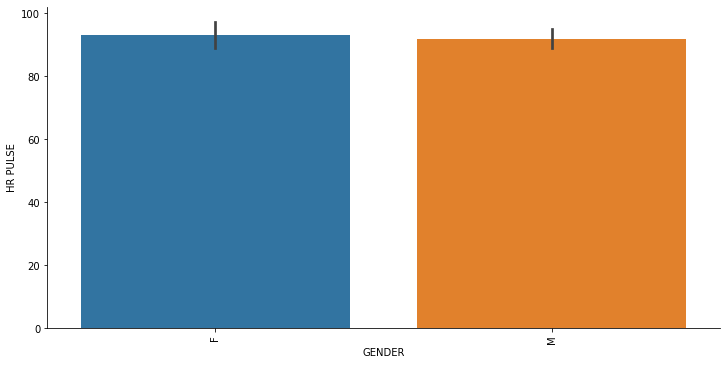

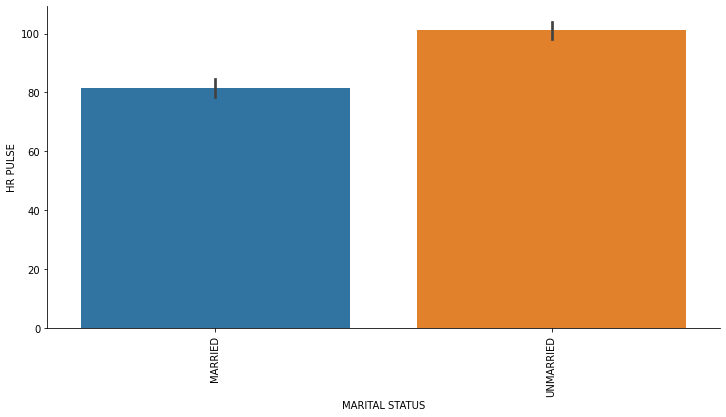

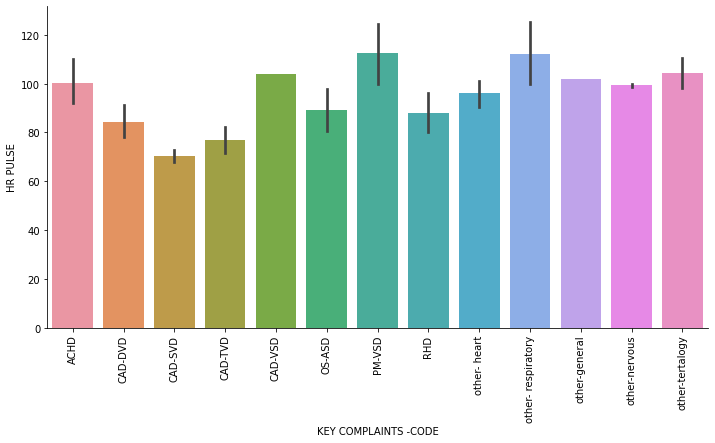

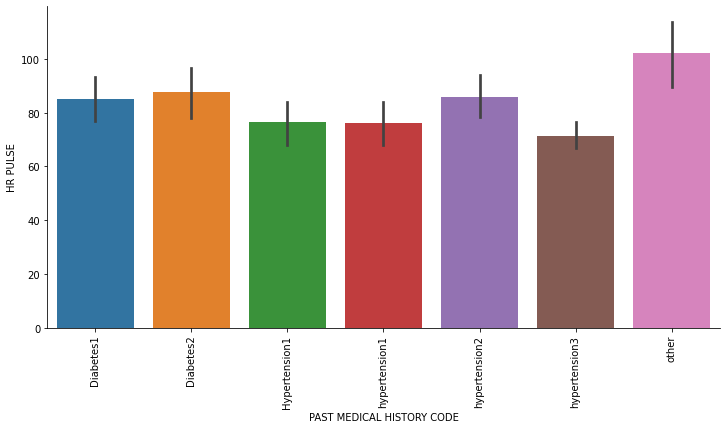

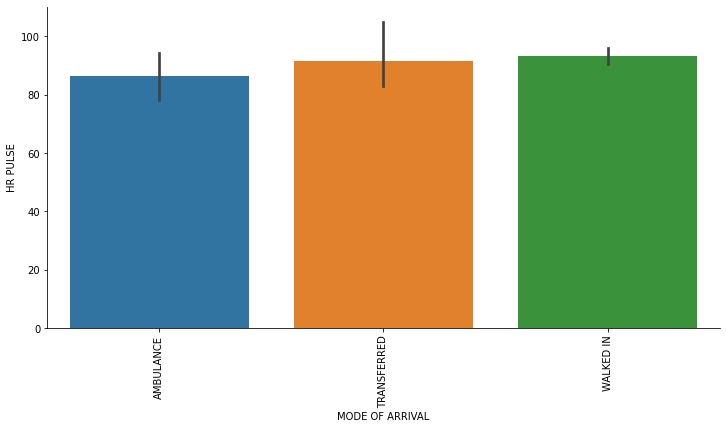

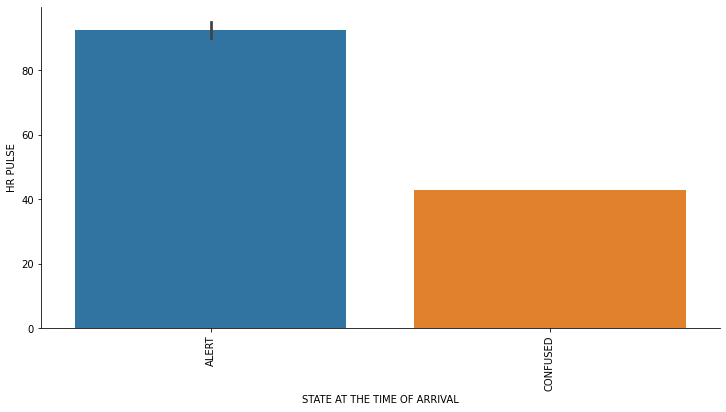

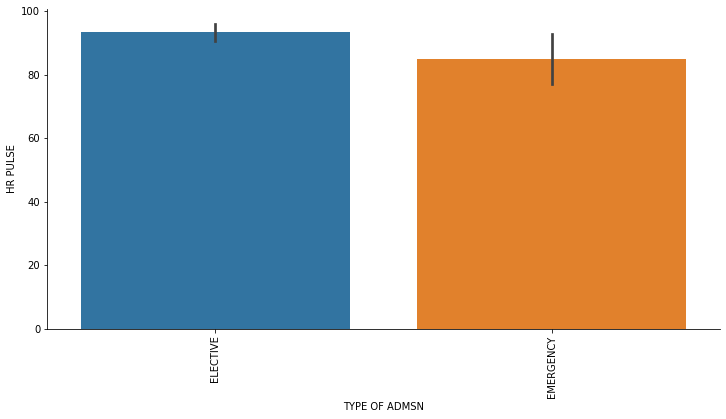

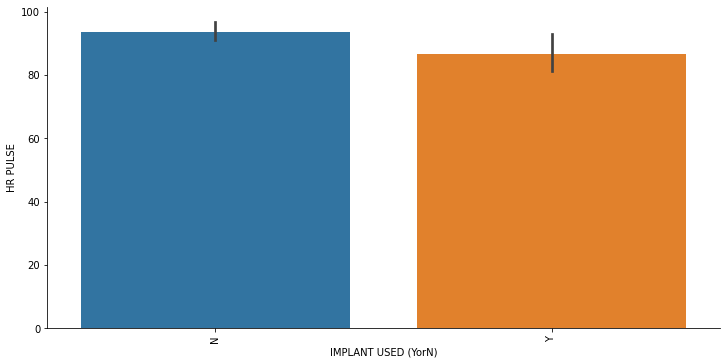

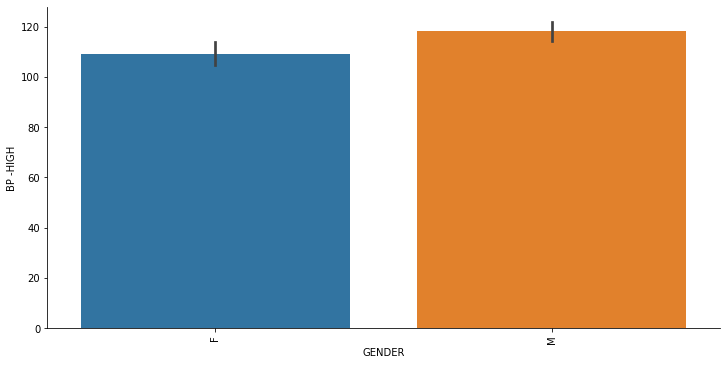

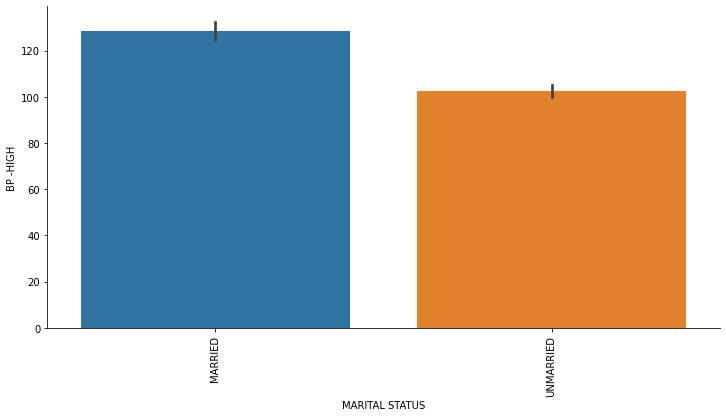

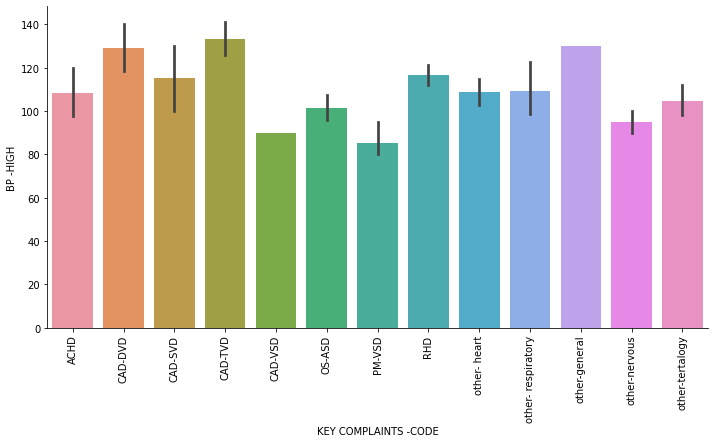

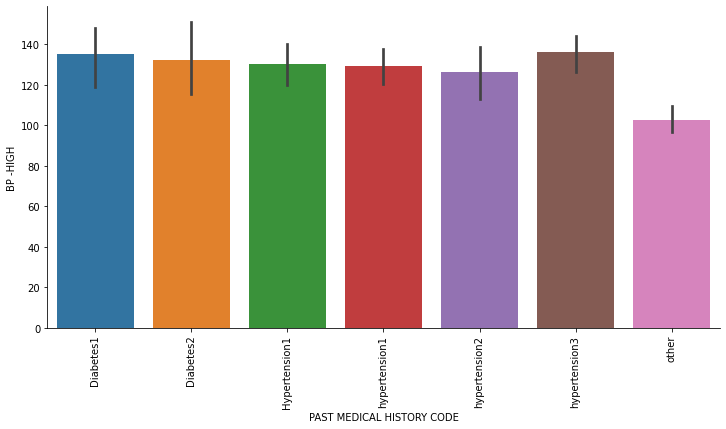

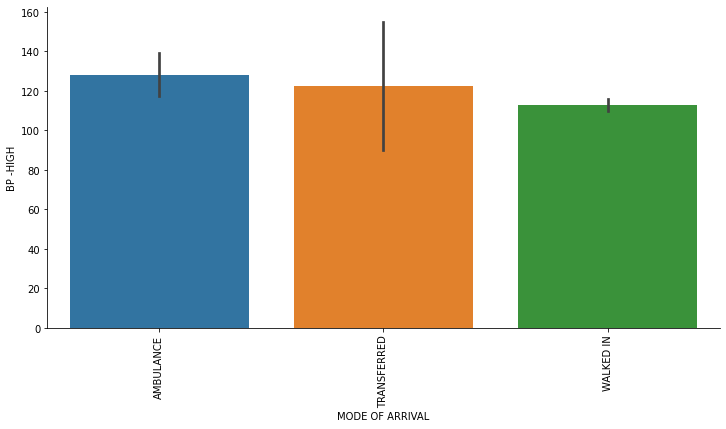

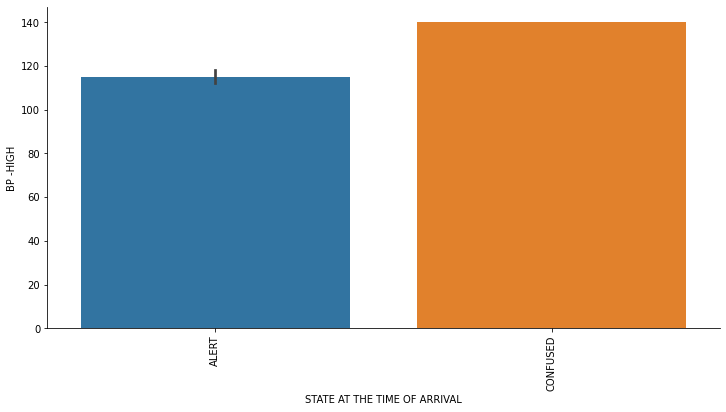

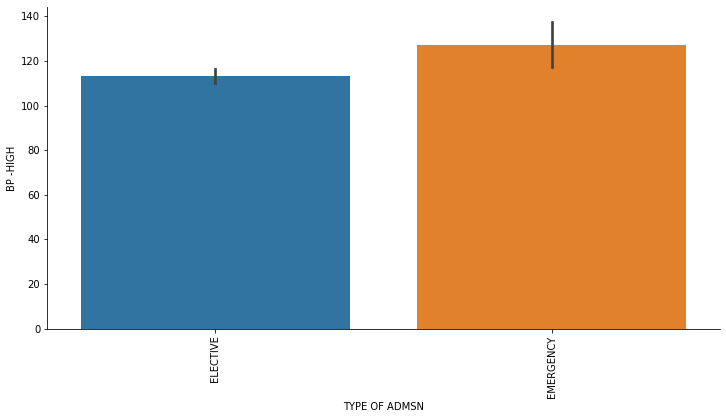

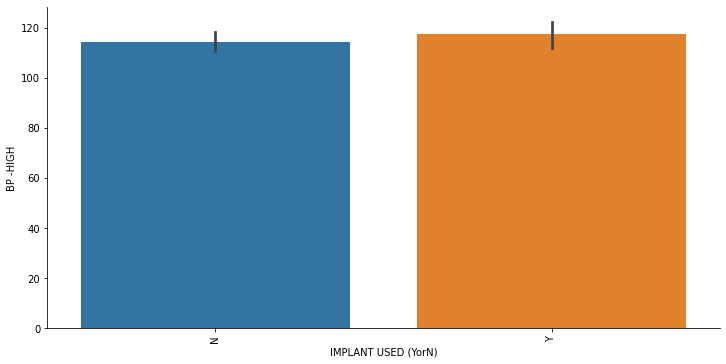

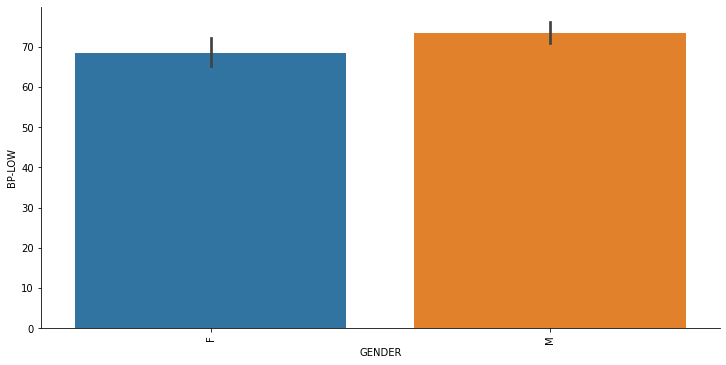

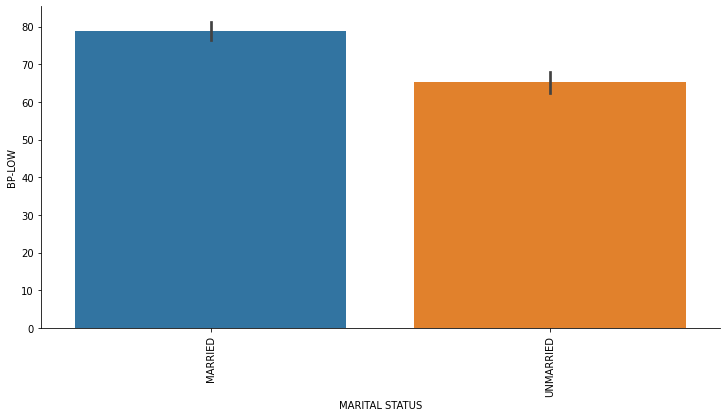

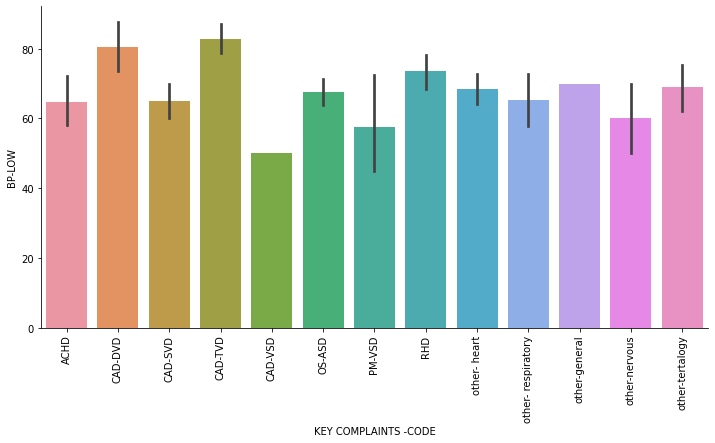

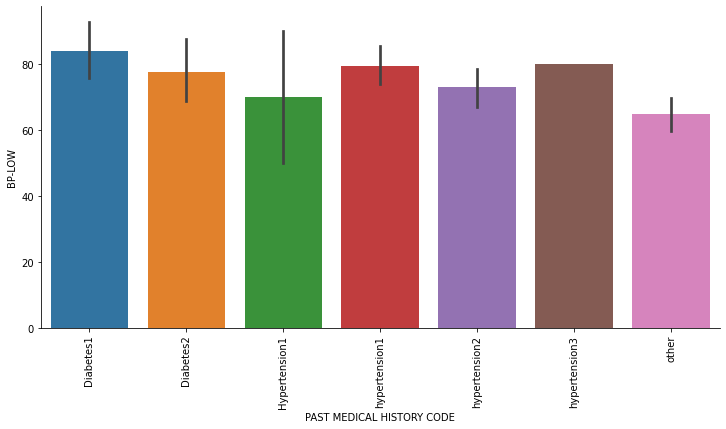

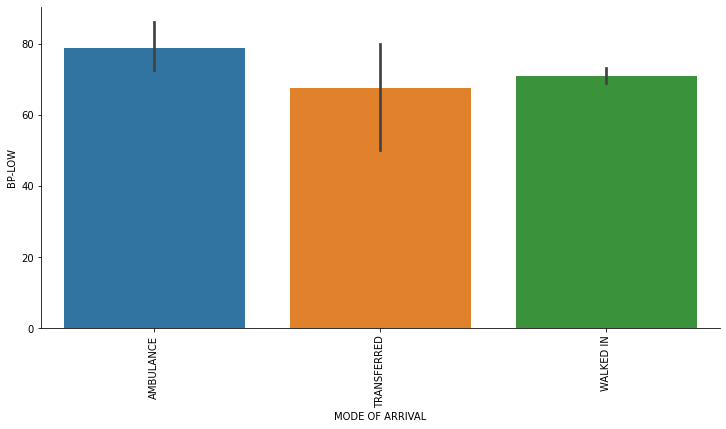

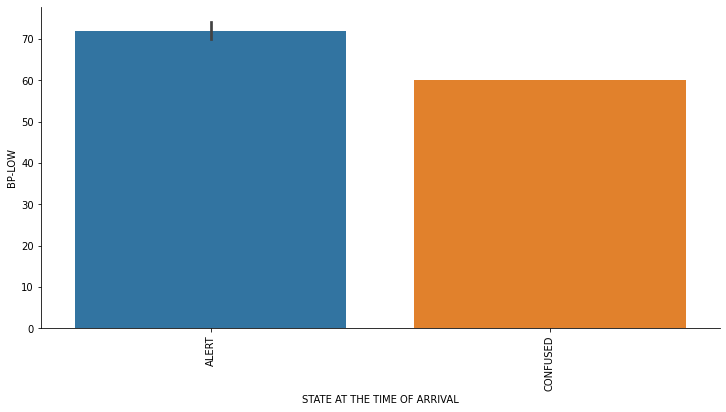

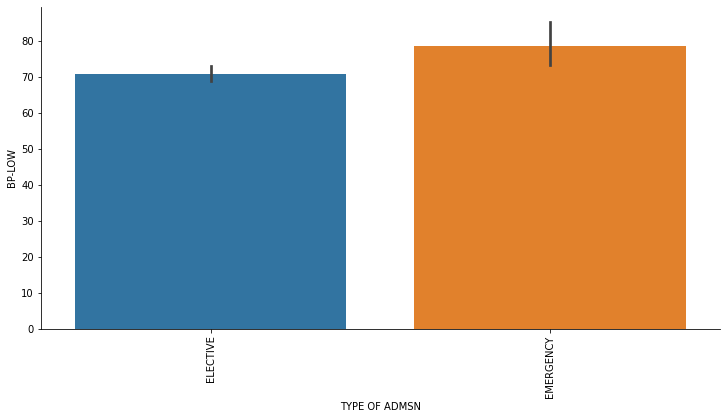

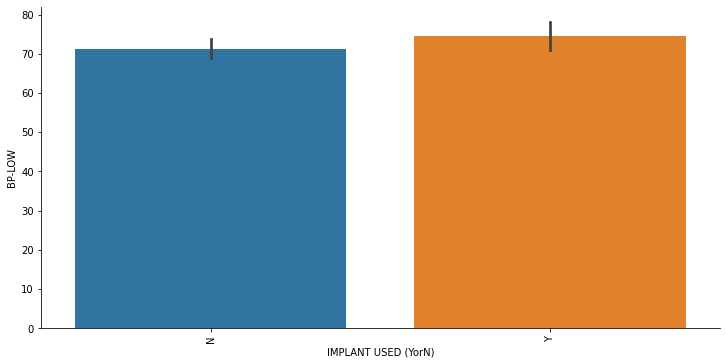

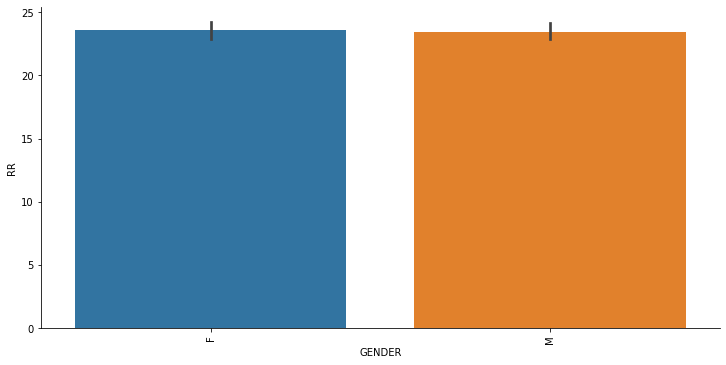

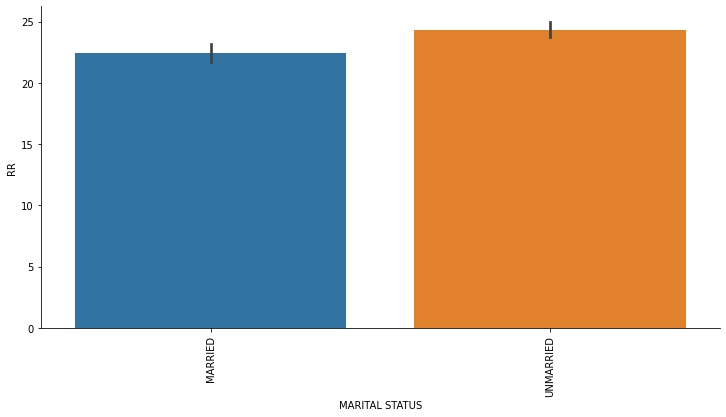

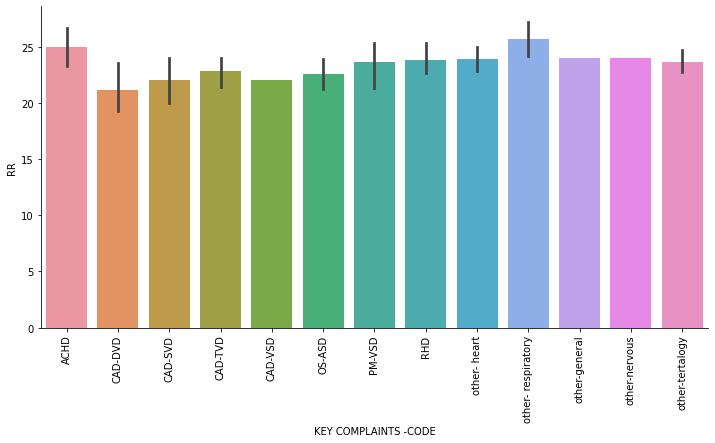

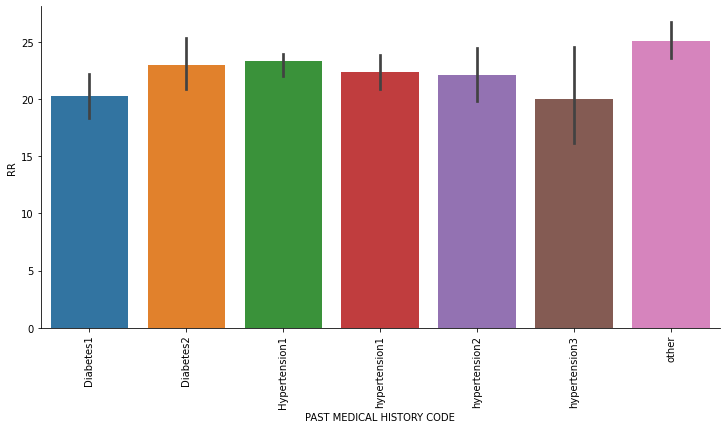

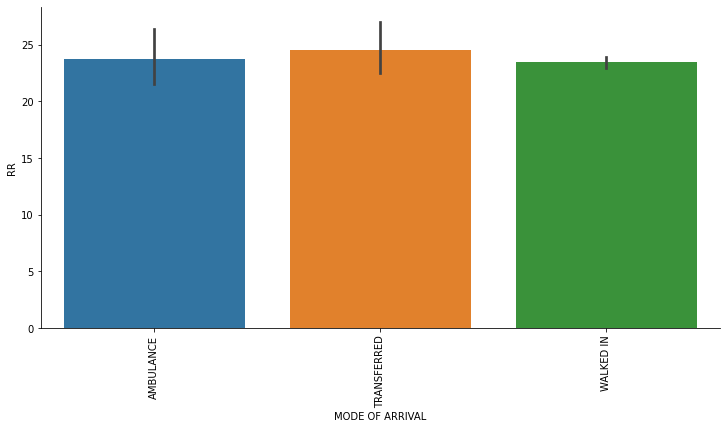

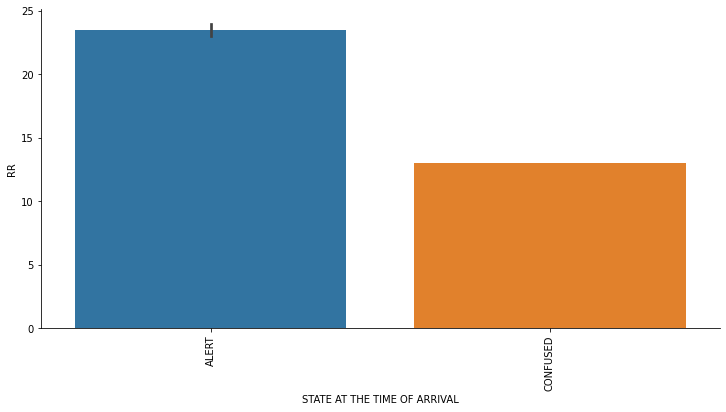

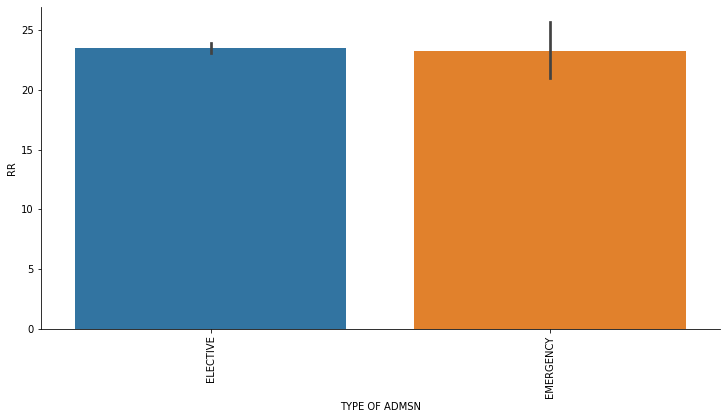

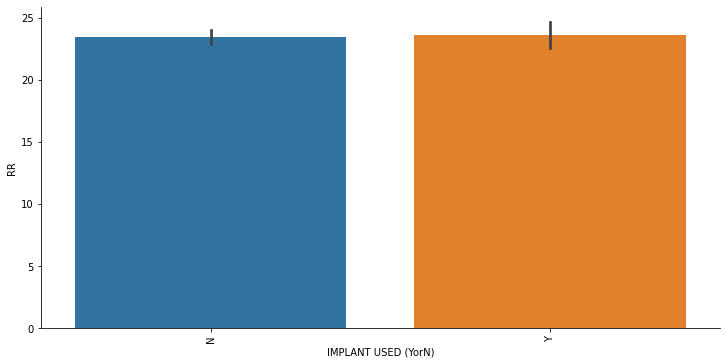

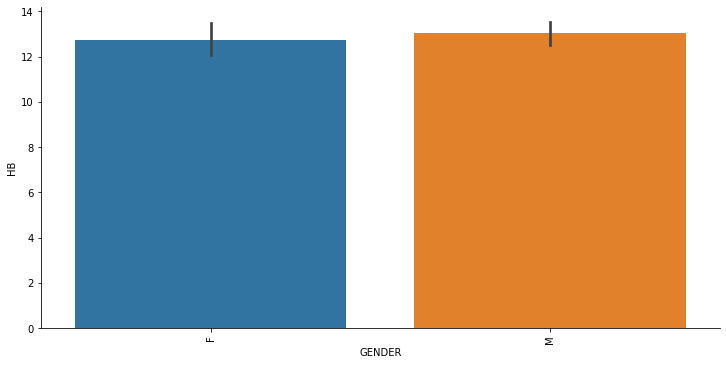

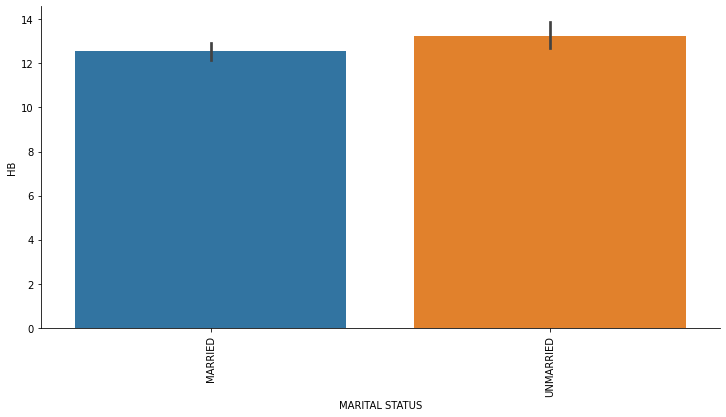

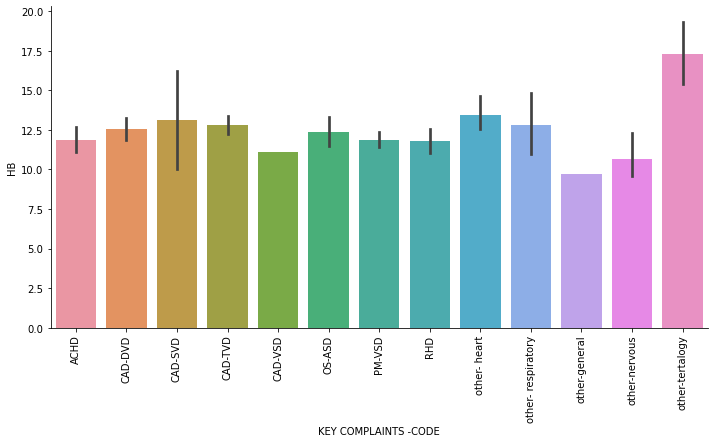

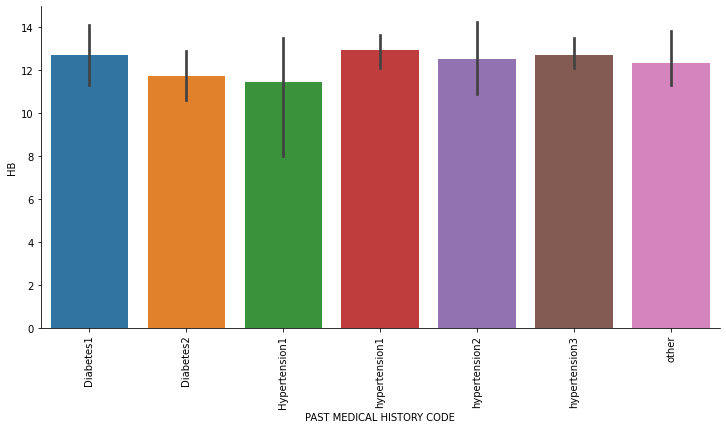

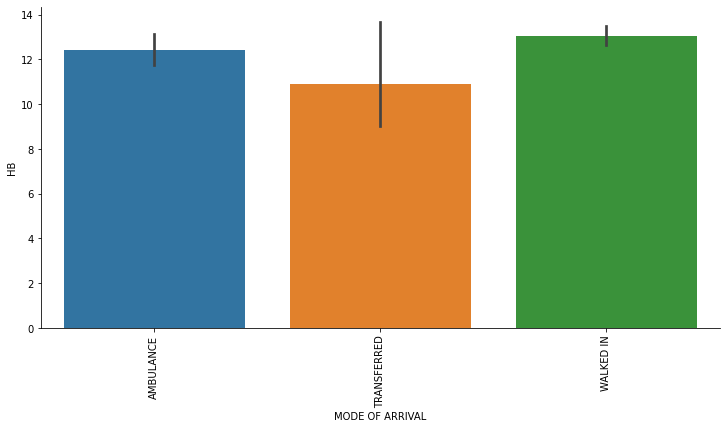

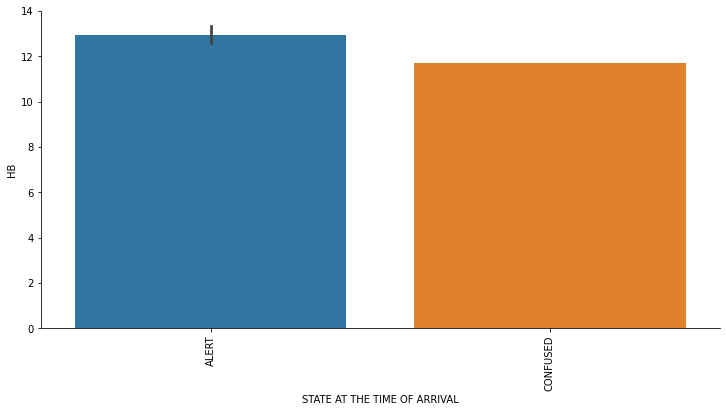

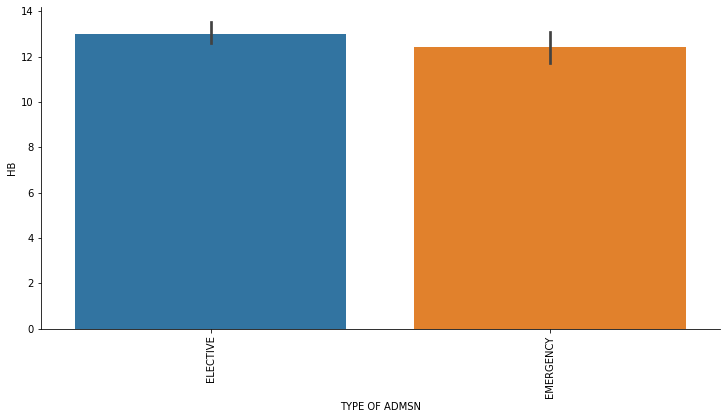

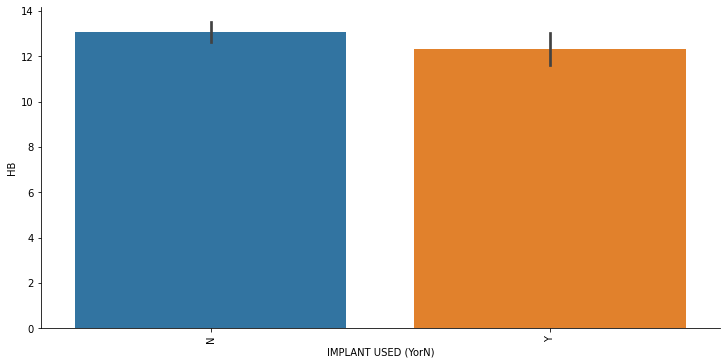

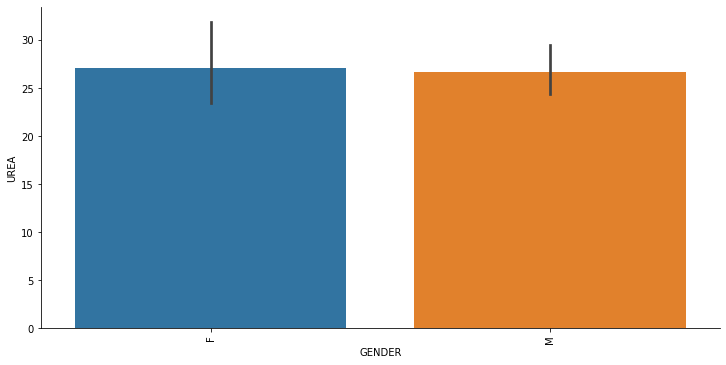

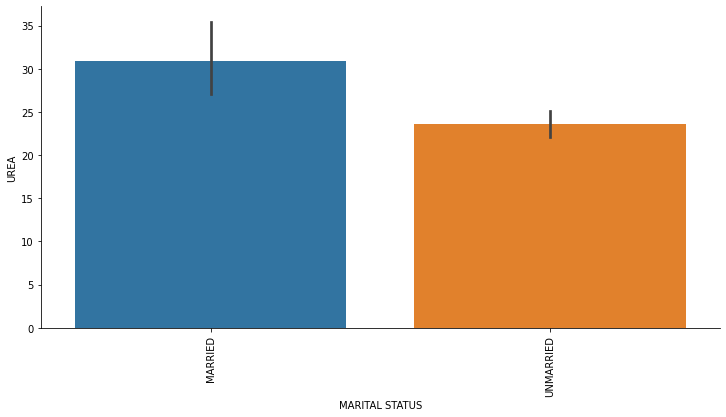

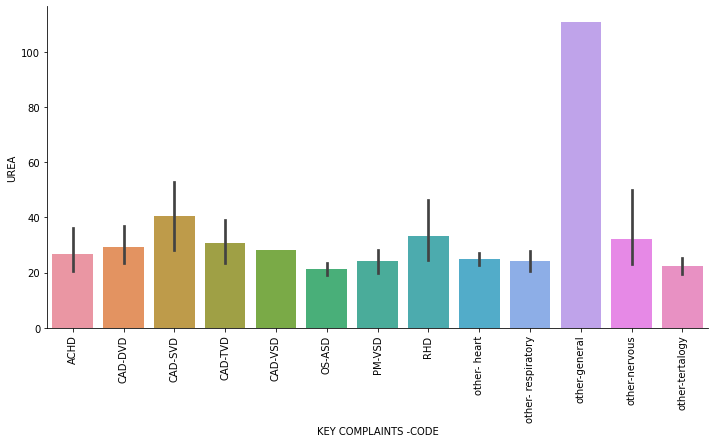

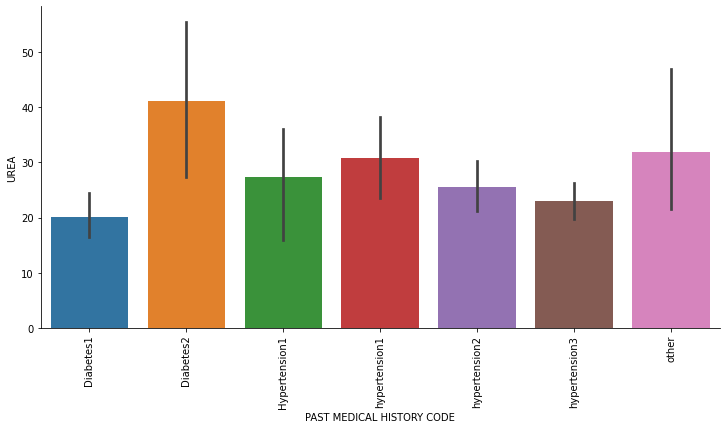

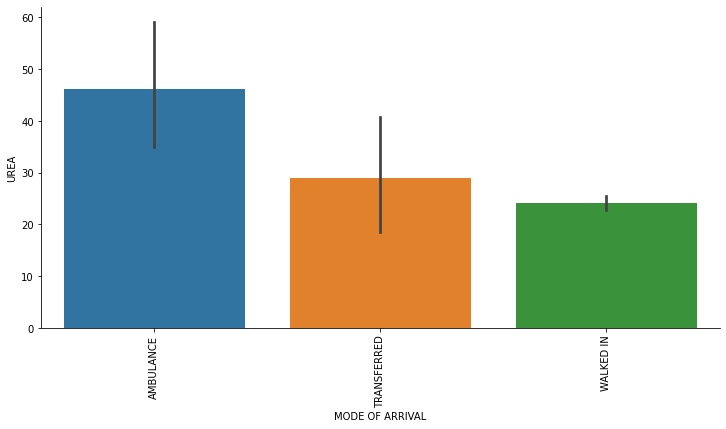

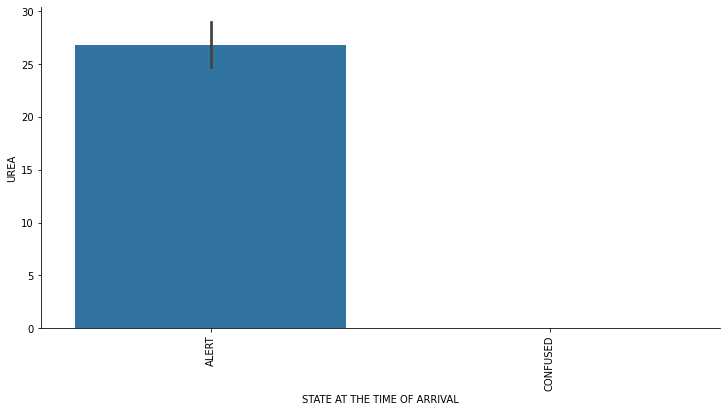

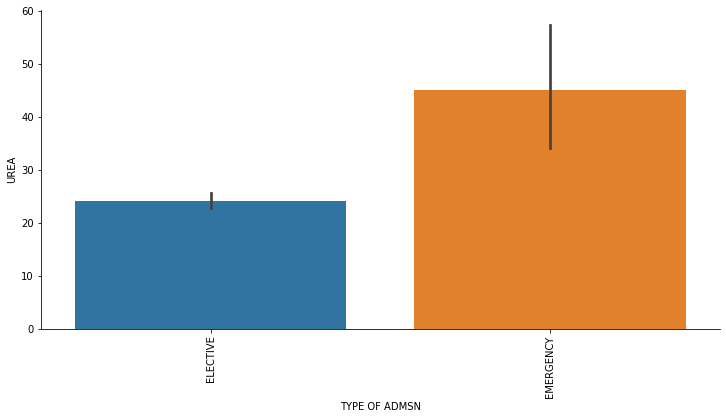

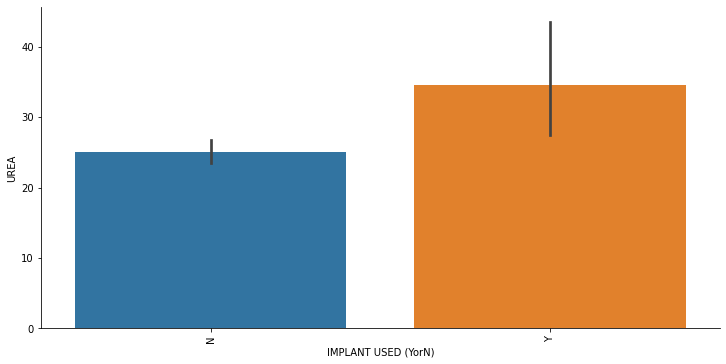

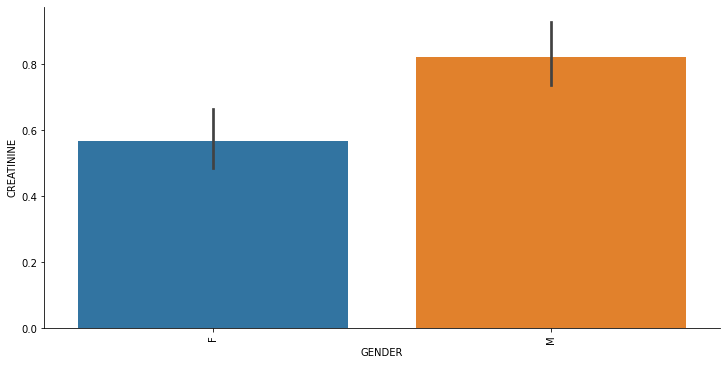

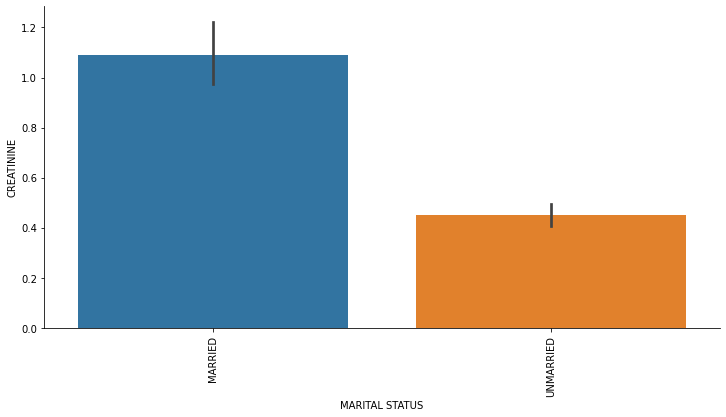

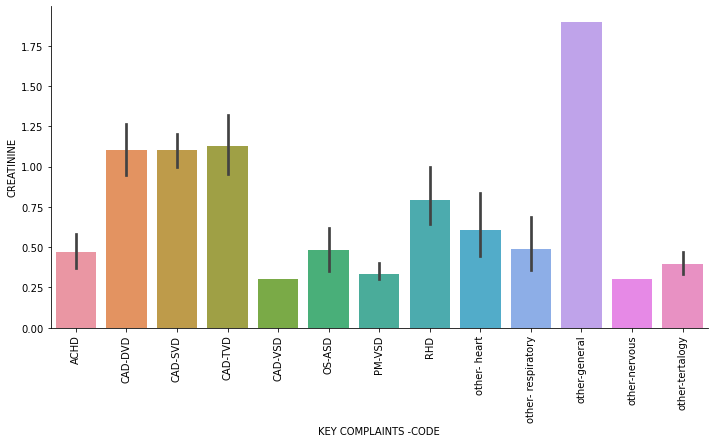

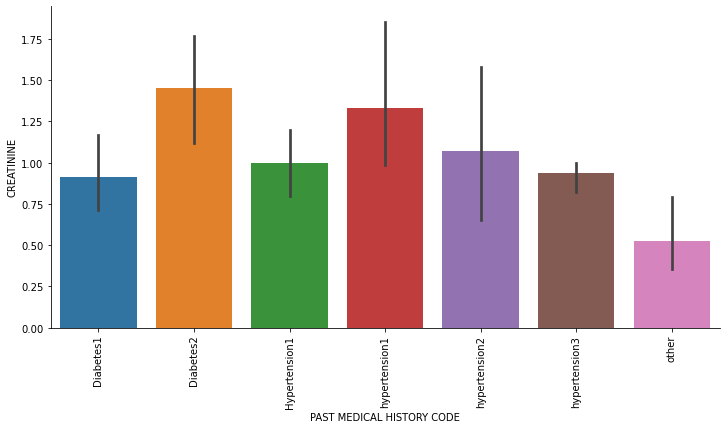

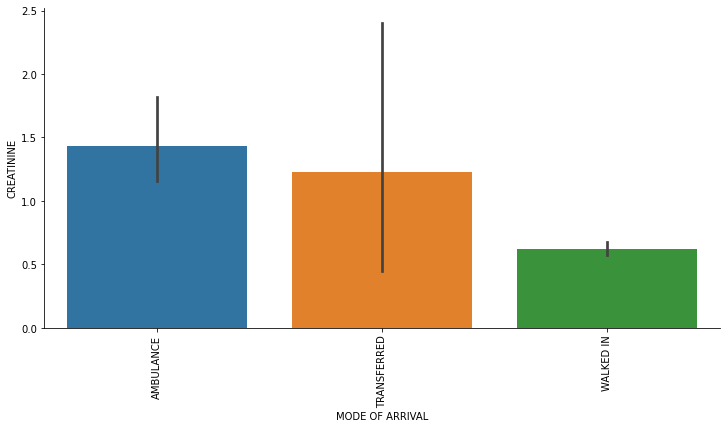

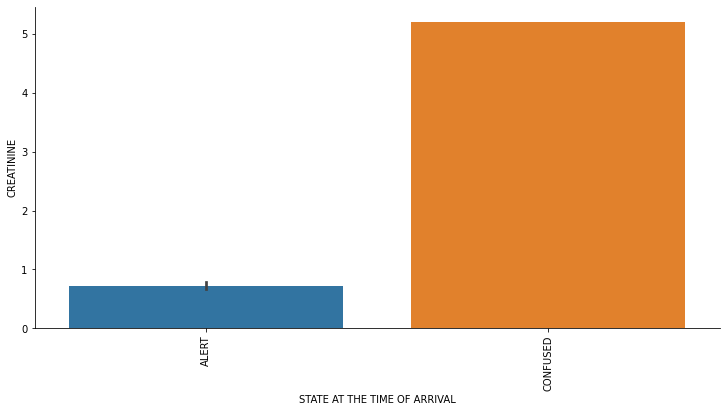

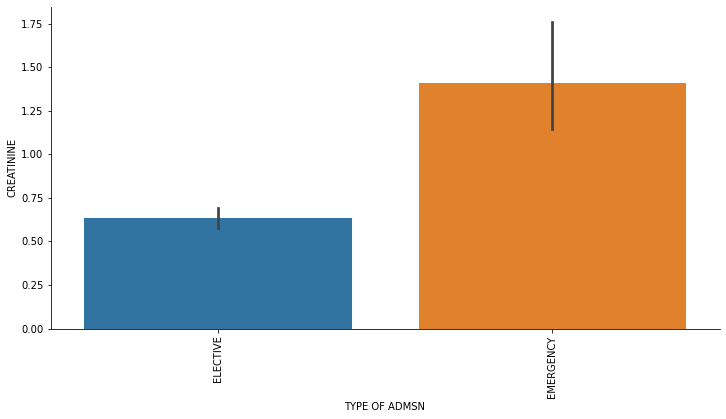

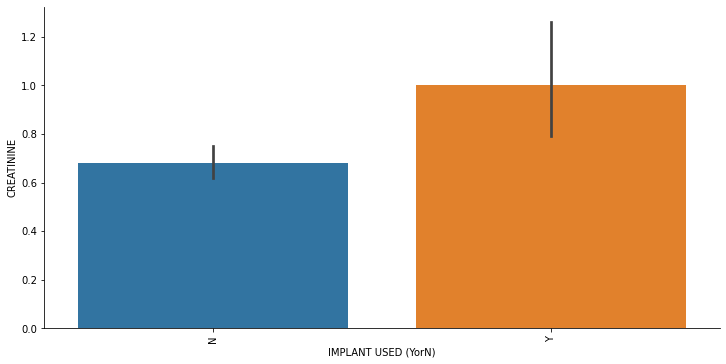

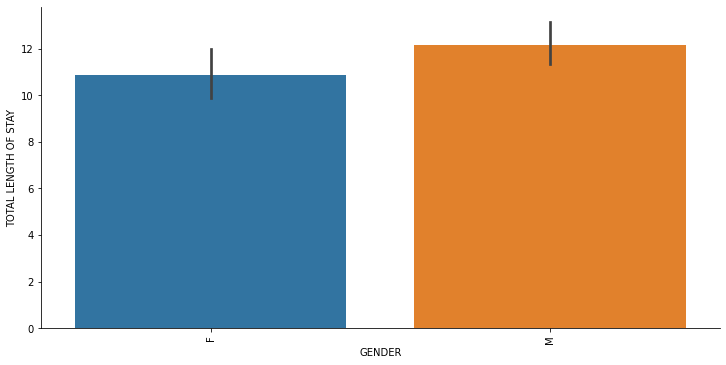

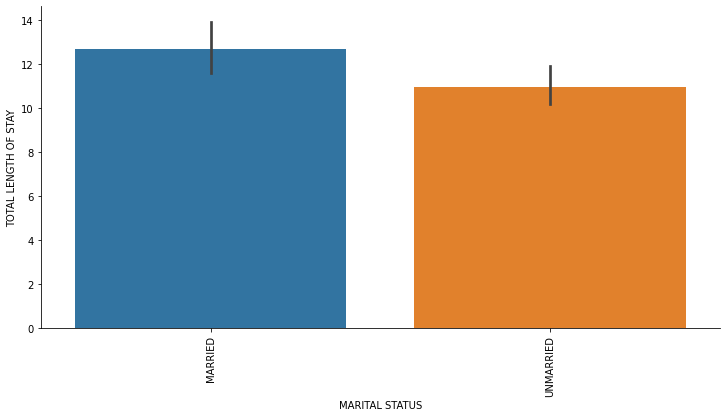

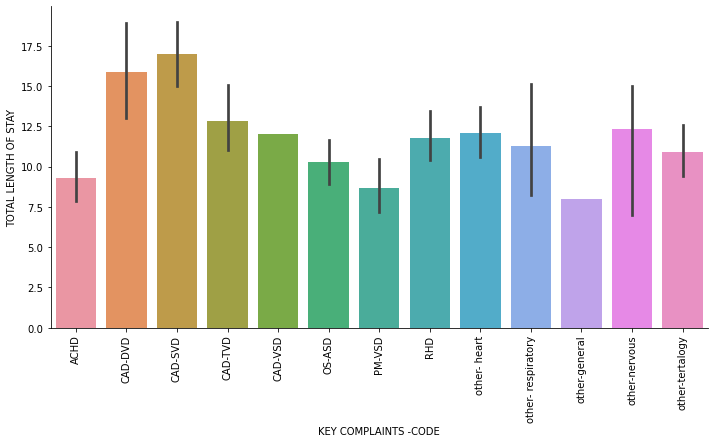

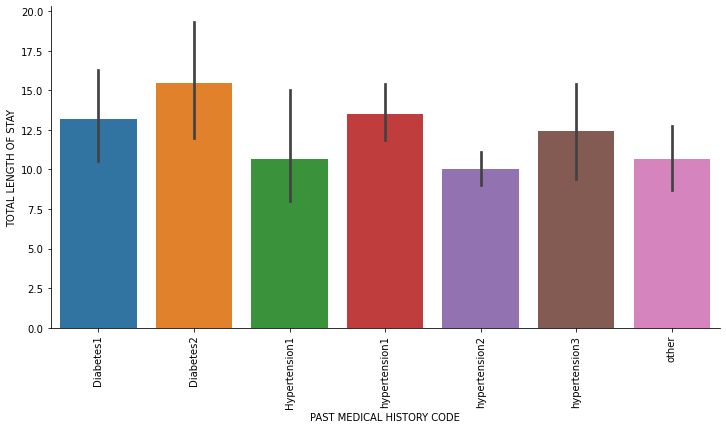

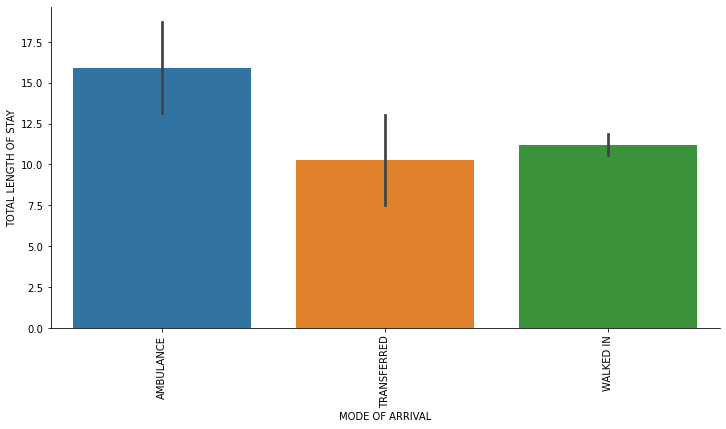

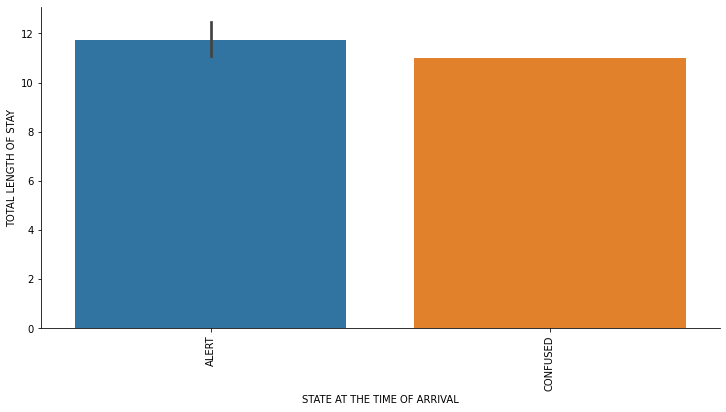

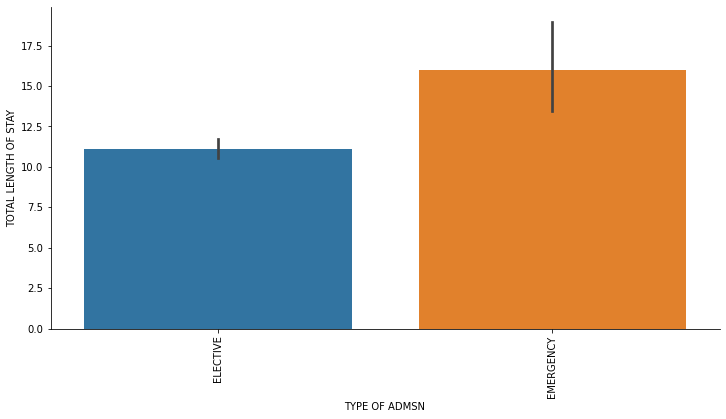

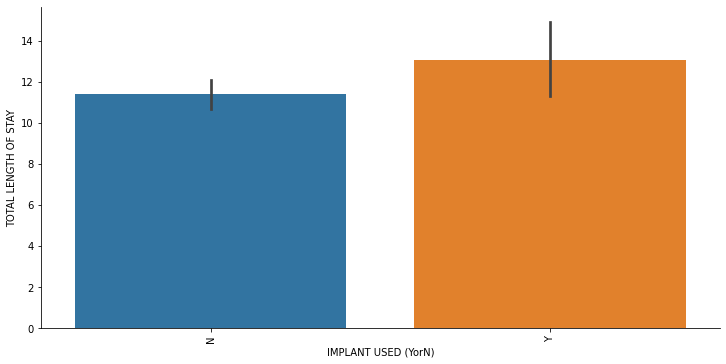

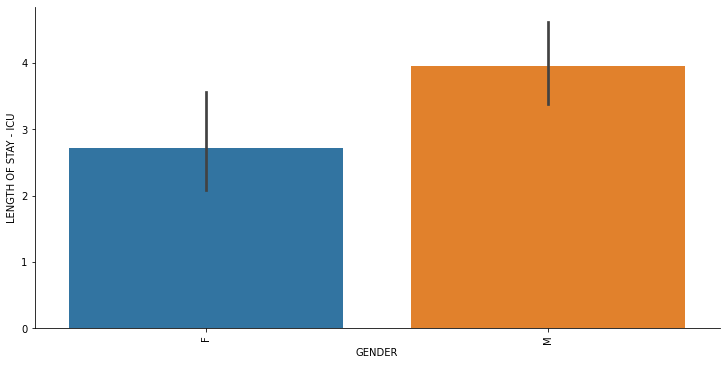

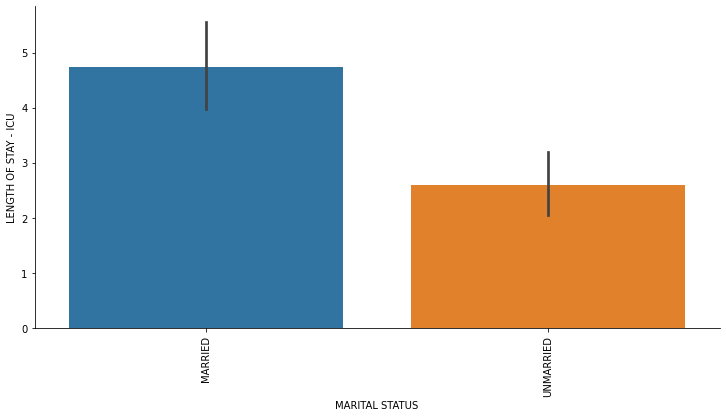

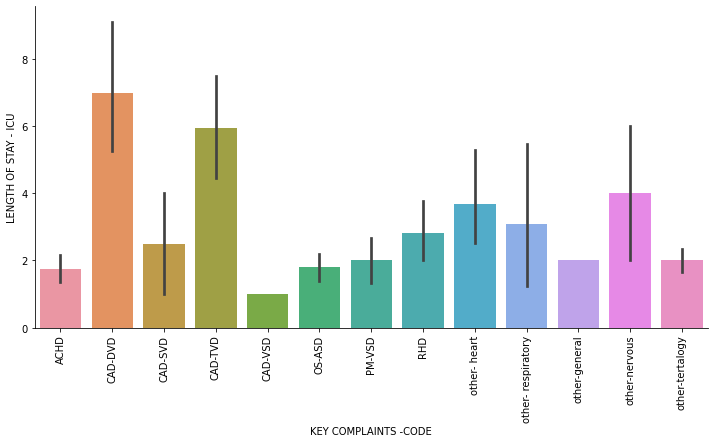

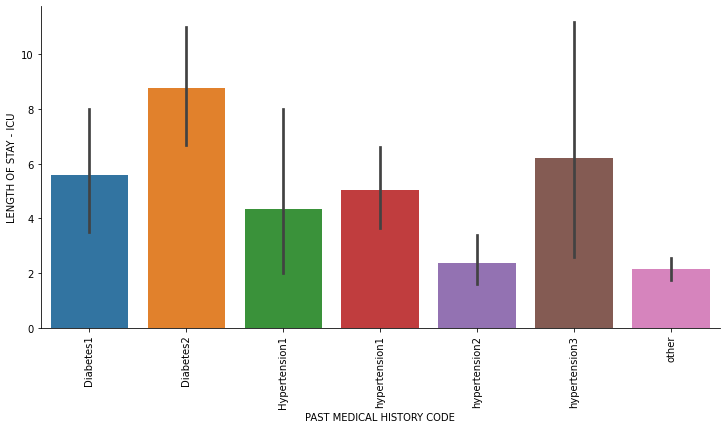

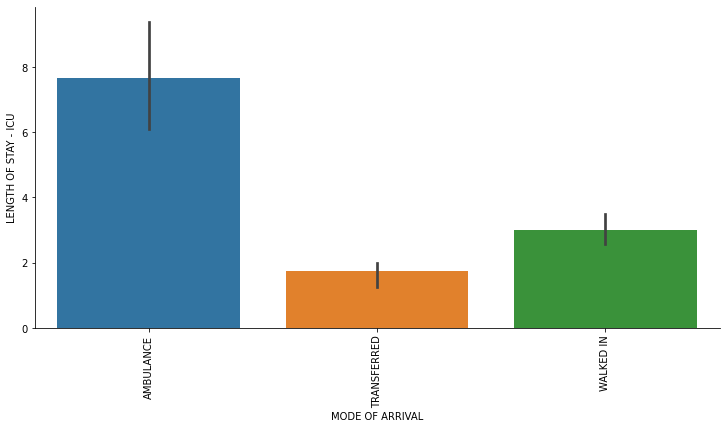

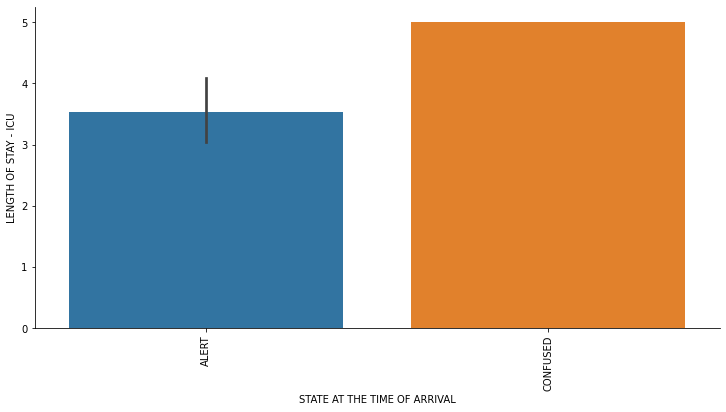

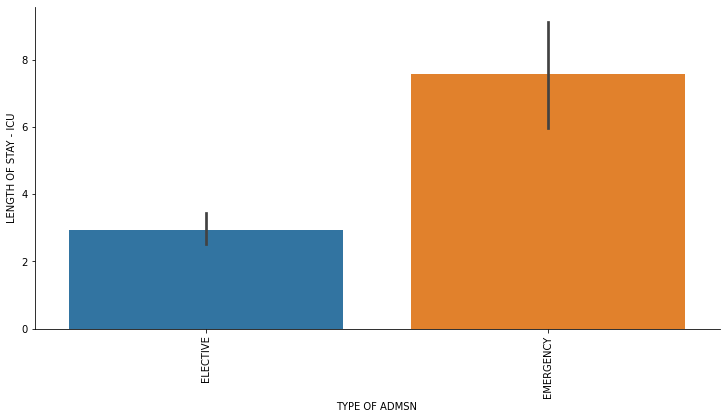

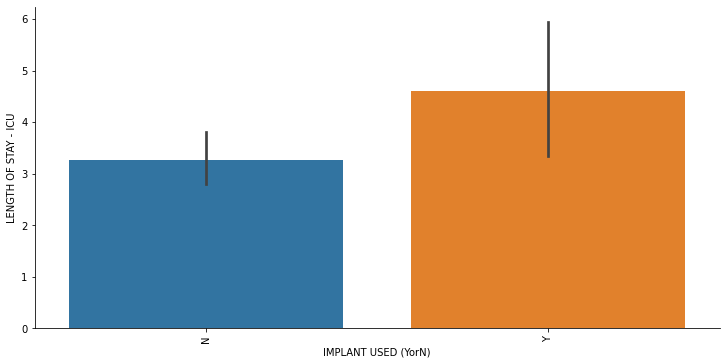

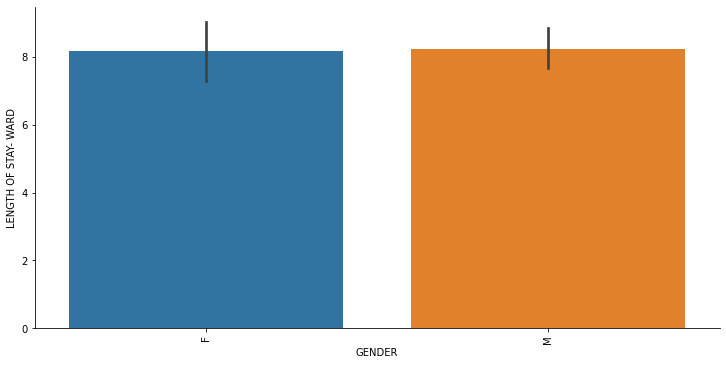

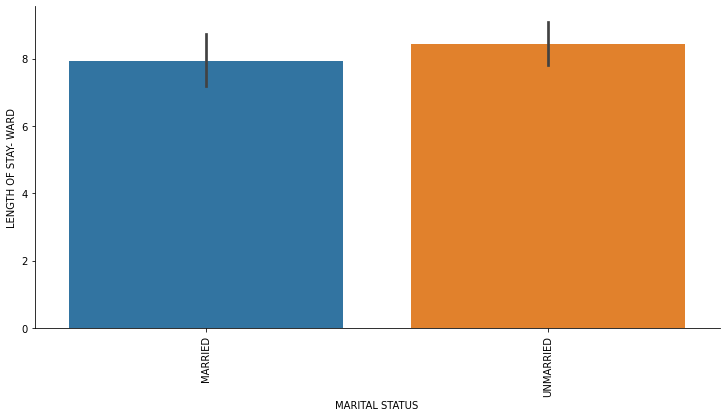

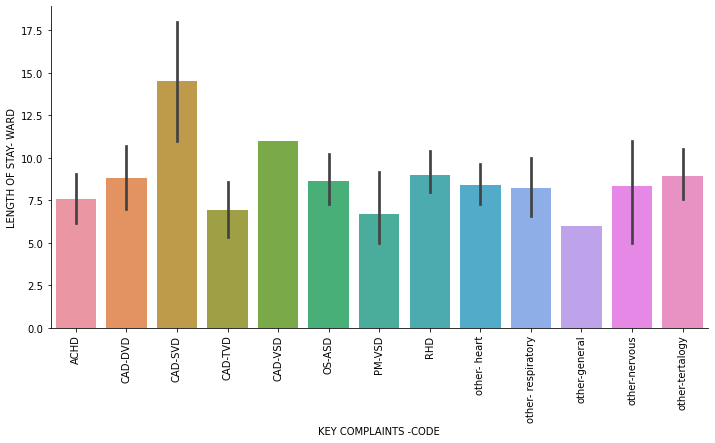

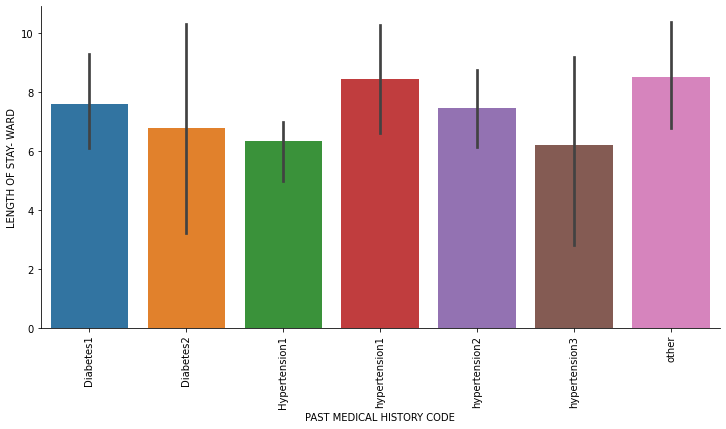

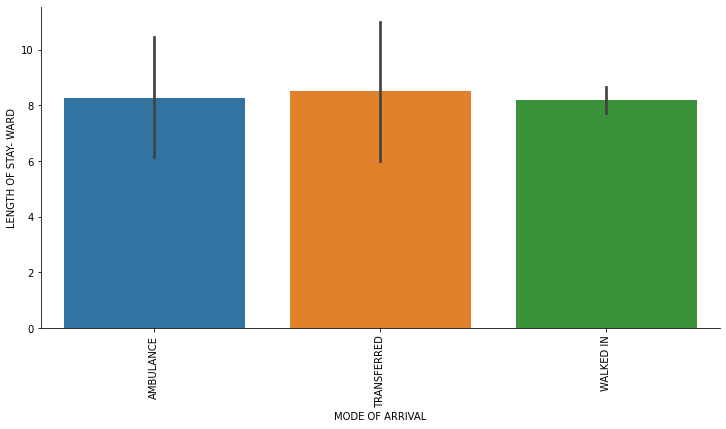

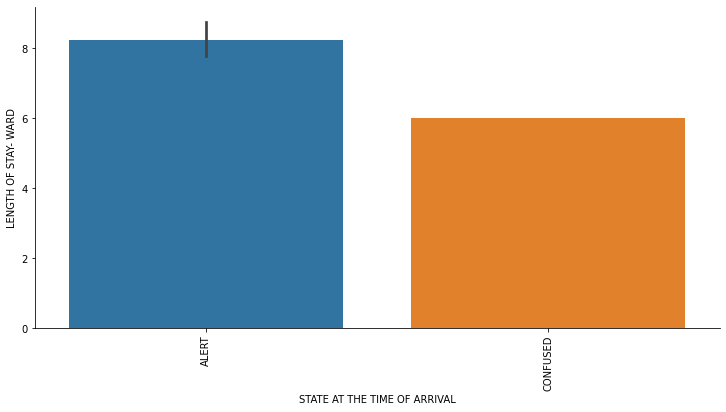

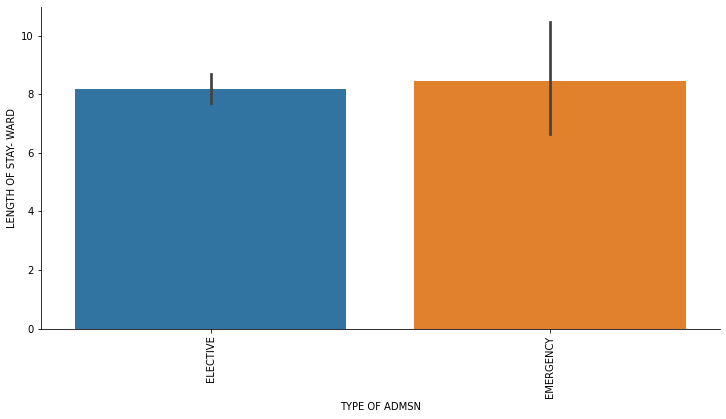

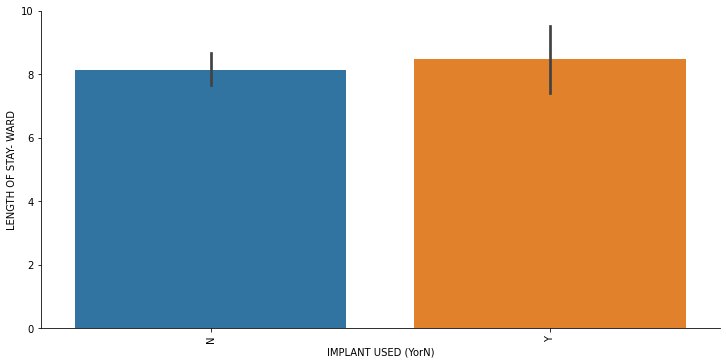

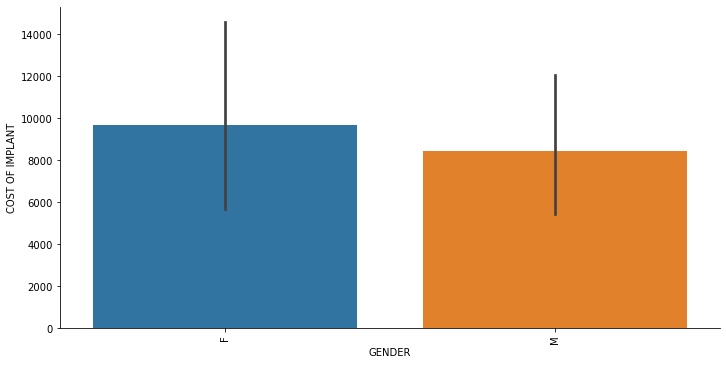

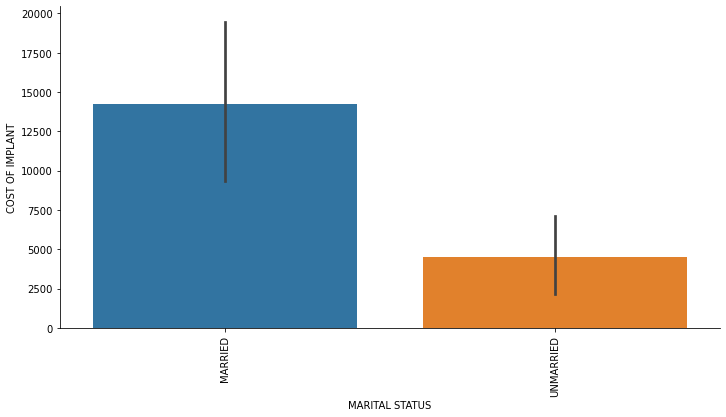

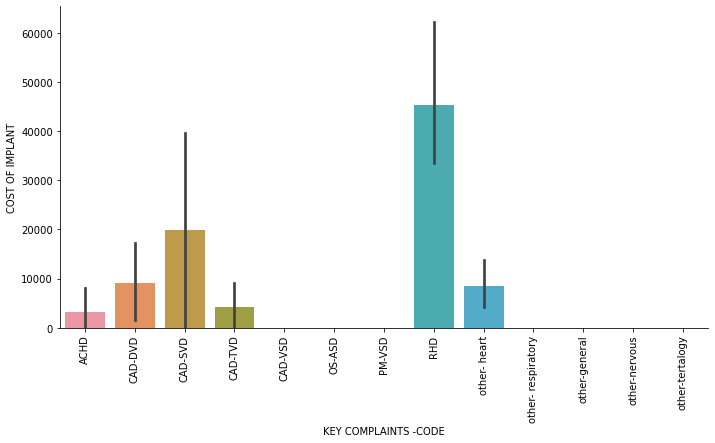

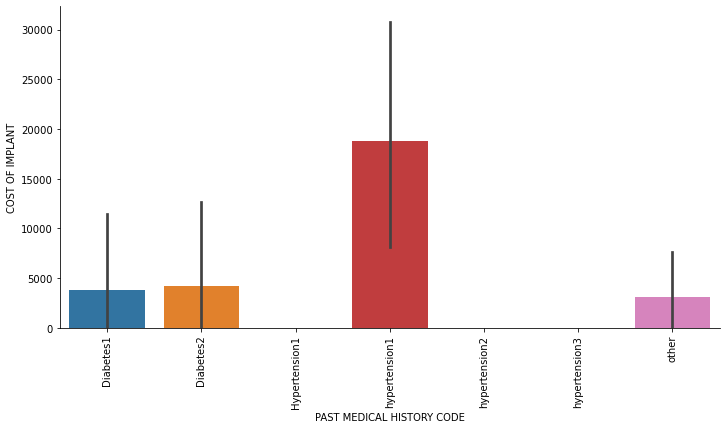

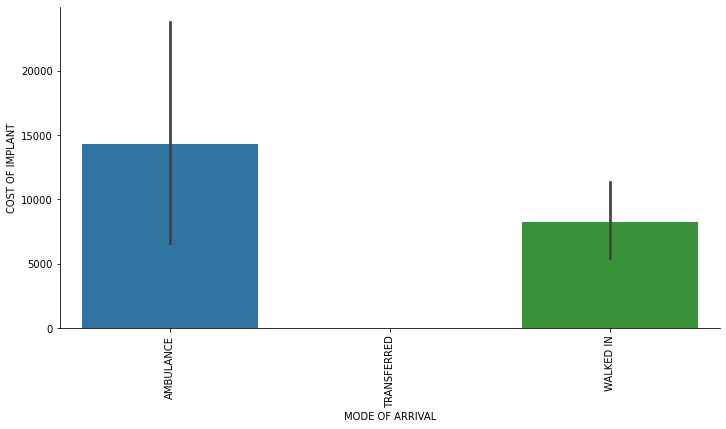

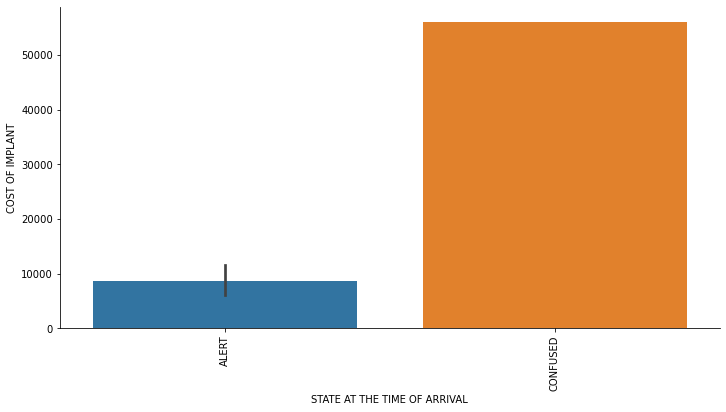

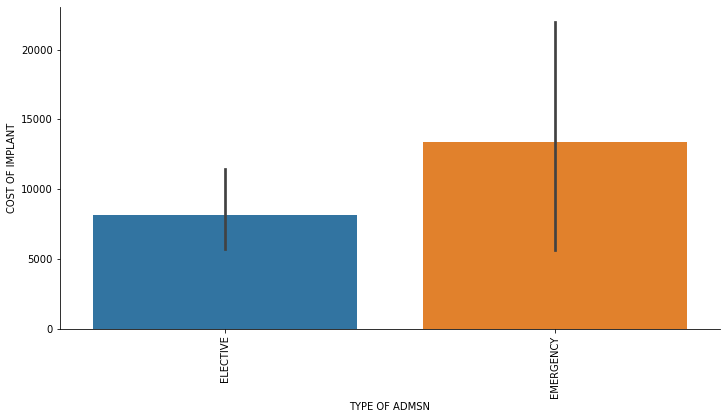

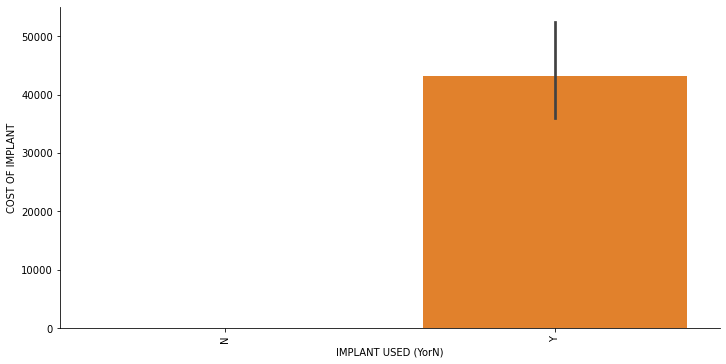

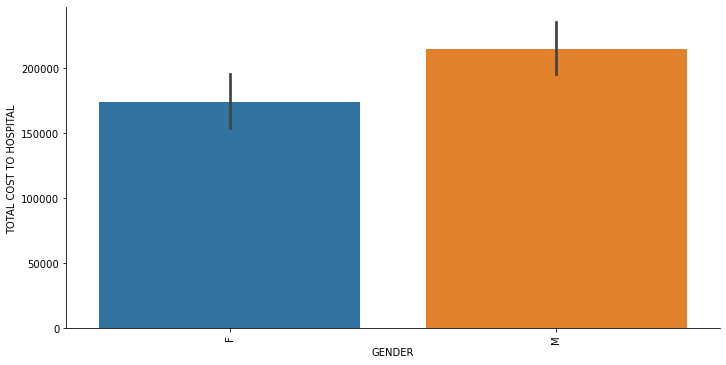

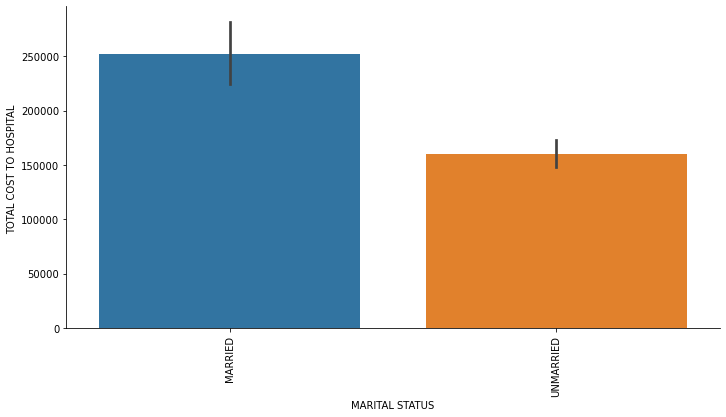

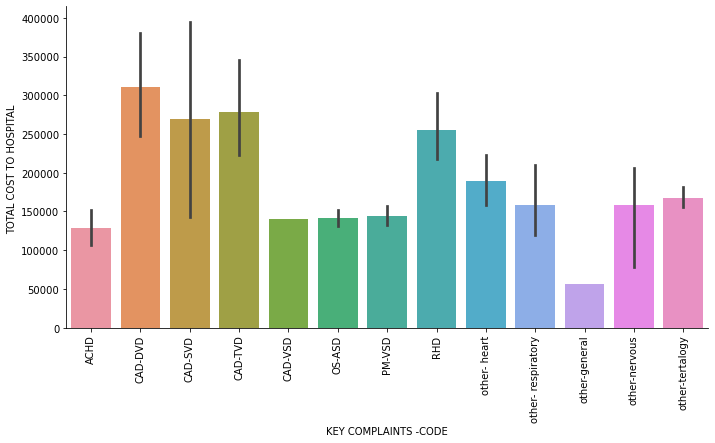

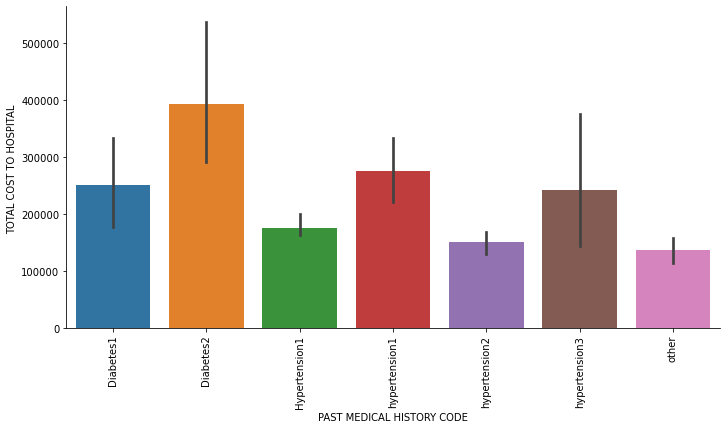

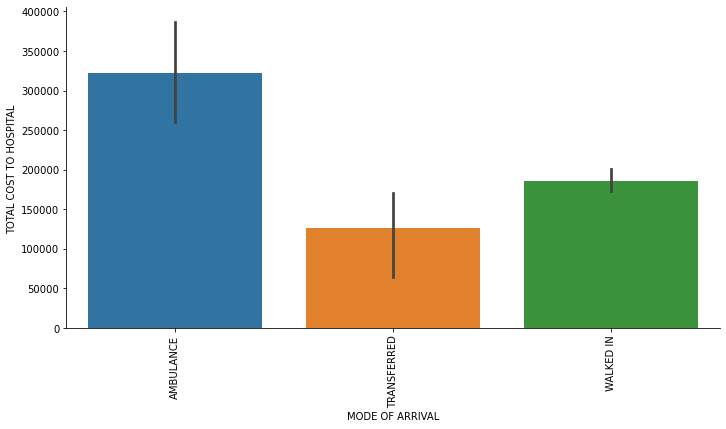

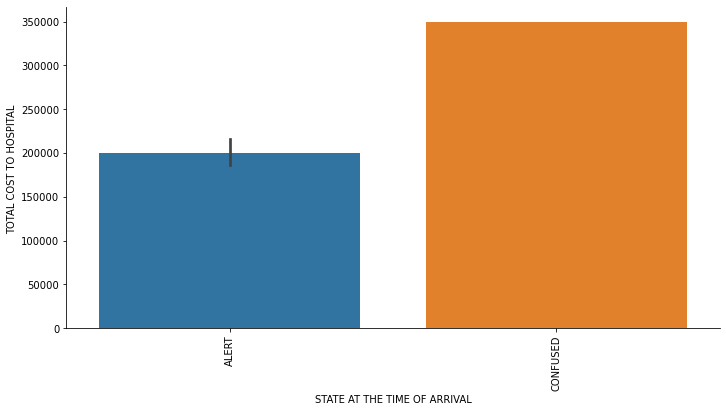

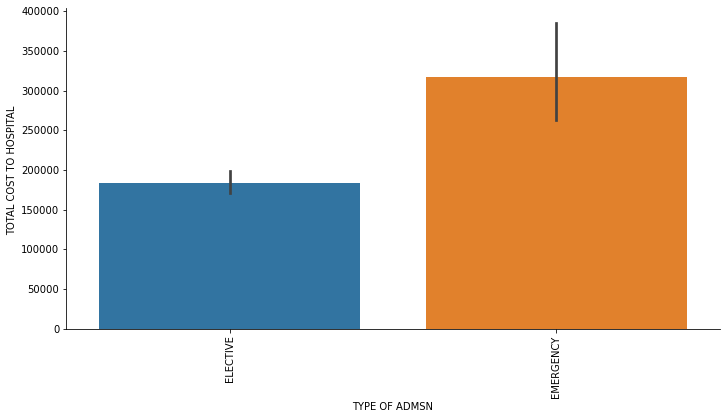

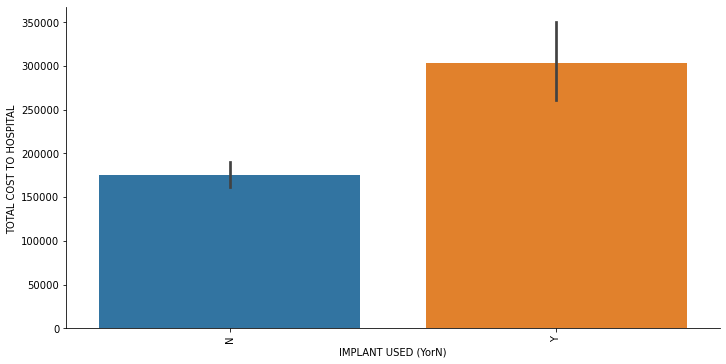

In [38]:
numeric_eda(df_reset)